# Project Objective

In [422]:
# Identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan,
# lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants 
# using EDA is the aim of this case study.
# In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
# The company can utilise this knowledge for its portfolio and risk assessment.

# Import Necessary Modules

In [423]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max.columns',150)
pd.set_option('display.max.rows',150)

# Load Dataset

In [424]:
df_application_data=pd.read_csv("application_data.csv")

In [425]:
df_application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# Check Basic Details

In [426]:
df_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [427]:
# Unable to see all details.Lets change pandas display options
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)

In [428]:
df_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [429]:
df_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# Check Variable type Distribution

In [430]:
# Categorical Variables
list(df_application_data.select_dtypes("object").columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [431]:
list_categorical=list(df_application_data.select_dtypes("object").columns)

In [432]:
list(df_application_data.select_dtypes(["int64","float64"]).columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [433]:
list_numerical=list(df_application_data.select_dtypes(["int64","float64"]).columns)

In [434]:
# Check if data values have been registered as incorrect data types(Like numbers registered  as strings)
# Check above object dataset and also general inspection on below
df_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Missing Value Check

In [435]:
(df_application_data.isna().sum()/df_application_data.shape[0]*100).sort_values(ascending=False).head(40)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

<Axes: ylabel='Frequency'>

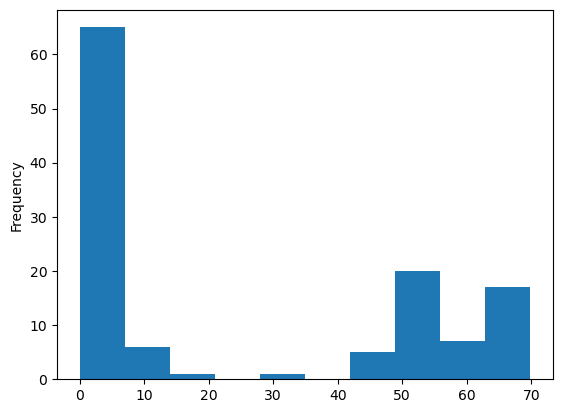

In [436]:
(df_application_data.isna().sum()/df_application_data.shape[0]*100).sort_values(ascending=False).plot.hist()

In [437]:
# Based on above distribution of no of missing values lets check threshold of no. of columns with missing values more than 35 and 35 or less
(df_application_data.isna().sum()/df_application_data.shape[0]*100)>35

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool

In [438]:
len(pd.Series(df_application_data.isna().sum()/df_application_data.shape[0]*100)[pd.Series(df_application_data.isna().sum()/df_application_data.shape[0]*100)>35])

49

In [439]:
# Lets drop thses columns as it is not appropriate to imputed with so many missing values in play

In [440]:
((df_application_data.isna().sum()/df_application_data.shape[0]*100)>35)[(df_application_data.isna().sum()/df_application_data.shape[0]*100)>35].index.to_list()

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [441]:
list_missing=((df_application_data.isna().sum()/df_application_data.shape[0]*100)>35)[(df_application_data.isna().sum()/df_application_data.shape[0]*100)>35].index.to_list()

In [442]:
type(list_missing)

list

In [443]:
len(list_missing)

49

In [444]:
df_application_data.drop(list_missing,axis=1,inplace=True)

In [445]:
df_application_data.isnull().values.any()

True

In [446]:
df_application_data.isnull().values.sum()

412799

In [447]:
(df_application_data.isnull().sum()/len(df_application_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [448]:
lst_missing_2=list(((df_application_data.isnull().sum()/len(df_application_data)*100)>0)[(df_application_data.isnull().sum()/len(df_application_data)*100)>0].index)
lst_missing_2

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [449]:
# We will do imputations based on type of variable

In [450]:
list_categorical_updated=[]
list_numerical_updated=[]

for i in lst_missing_2:
    if i in list_categorical:
        list_categorical_updated.append(i)
    else:
        list_numerical_updated.append(i)

In [451]:
list_categorical_updated

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']

In [452]:
list_numerical_updated

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [453]:
df_application_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [454]:
df_application_data.OCCUPATION_TYPE.value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [455]:
# For categorical variables we will impute missing since not apt to replace with other missing due to high amount of nan values which may bias the dataset
df_application_data.NAME_TYPE_SUITE=df_application_data.NAME_TYPE_SUITE.fillna("Missing")
df_application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Missing              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [456]:
# For categorical variables we will impute missing since not apt to replace with other missing due to high amount of nan values which may bias the dataset
df_application_data.OCCUPATION_TYPE=df_application_data.OCCUPATION_TYPE.fillna("Missing")
df_application_data.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [457]:
# for numericcal values we are imputing my median values which in general is a better indicator of central tendency.
for i in list_numerical_updated:
    df_application_data[i]=df_application_data[i].fillna(df_application_data[i].median())

In [458]:
df_application_data.isna().sum()
# We see now we have no missing values

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

# Check Invalid Values

In [459]:
for i in df_application_data.select_dtypes("object").columns:
    print(df_application_data[i].value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Missing              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree              

In [460]:
# Checking above we find organization type and gender has entries XNA with is non conforming.
# In organization type count of XNA is huge so we cant impute this .In gender its negligible with 4 occurences.So we will impute with mode

df_application_data.CODE_GENDER=df_application_data.CODE_GENDER.apply(lambda x:df_application_data.CODE_GENDER.mode().values[0] if x=='XNA' else x)
df_application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [461]:
df_application_data.select_dtypes(["int64","float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [462]:
for i in df_application_data.select_dtypes(["int64","float64"]).columns:
    print(df_application_data[i].value_counts())

100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
0    282686
1     24825
Name: TARGET, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64
9000.0      6385
13500.0     5514
6750.0      2279

In [463]:
# By visual inspection we dint find anomalies in the numerical columns except the days since columns which show negativce values 
# but we assume that is the format inthich data was recorded so no issue there.

In [464]:
# Also we notice in Days Employed there is positive values but they are very high at 365243 days. This is 1000+ years .So most likely a mistake 
# or a codified format in data entry for indicating certain characteristicvs.Lets check

In [465]:
df_inspect=df_application_data[df_application_data.DAYS_EMPLOYED==365243]
df_inspect

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
38          100045       0         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307469      456209       0         Cash loans           F            N   
307483      456227       0         Cash loans           F            N   
307487      456231       0         Cash loans           M            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112500.000   1019610.0   
11                   Y             0         38419.155    148365.0   
23                   Y             0         83250.000    239850.0   
38                   Y             0         99000.000    247275.0   
43                   Y             0        108000.000    746280.0   
...                ...           ...               ...         ...   
307469               Y             0        202500.000    703728.0   
307483               Y             0         99000.000    247275.0   
307487               Y             0        117000.000   1071909.0   
307505               Y             0        112500.000    225000.0   
307507               Y             0         72000.000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children        Pensioner   
11          10678.5         135000.0        Children        Pensioner   
23          23850.0         225000.0   Unaccompanied        Pensioner   
38          17338.5         225000.0   Unaccompanied        Pensioner   
43          42970.5         675000.0   Unaccompanied        Pensioner   
...             ...              ...             ...              ...   
307469      29943.0         607500.0   Unaccompanied        Pensioner   
307483      16479.0         225000.0   Unaccompanied        Pensioner   
307487      31473.0         936000.0   Unaccompanied        Pensioner   
307505      22050.0         225000.0   Unaccompanied        Pensioner   
307507      12001.5         225000.0   Unaccompanied        Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
38      Secondary / secondary special               Married   
43                   Higher education  Single / not married   
...                               ...                   ...   
307469  Secondary / secondary special  Single / not married   
307483  Secondary / secondary special             Separated   
307487  Secondary / secondary special               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
8       House / apartment                    0.018634      -20099   
11      House / apartment                    0.015221      -20417   
23      House / apartment                    0.006296      -24827   
38      House / apartment                    0.006207      -23920   
43      House / apartment                    0.010966      -23548   
...                   ...                         ...         ...   
307469  House / apartment                    0.031329      -22414   
307483  House / apartment                    0.007330      -24911   
307487  House / apartme

In [466]:
df_inspect.OCCUPATION_TYPE.value_counts()

Missing           55372
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64

In [467]:
df_inspect.NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [468]:
# The above 365243 code for days employed possibly indicates Pensioner or Unemployed people as per the above analysis 

In [469]:
# The other columns since okay at glance

# Feature Engineering

In [470]:
# Lets Create new features to make better sense of the datasets

In [471]:
# Convert the Days Columns to years for better reference and create new columns

In [472]:
df_application_data['YEARS_BIRTH']=df_application_data['DAYS_BIRTH'].apply(lambda x:round(x/365))
df_application_data['YEARS_EMPLOYED']=df_application_data['DAYS_EMPLOYED'].apply(lambda x:round(x/365))
df_application_data['YEARS_REGISTRATION']=df_application_data['DAYS_REGISTRATION'].apply(lambda x:round(x/365))
df_application_data['YEARS_ID_PUBLISH']=df_application_data['DAYS_ID_PUBLISH'].apply(lambda x:round(x/365))

In [473]:
# Lets create 2 dataframes.One for Target 0 and one for target 1.

In [474]:
df_noprob=df_application_data[df_application_data.TARGET==0]
df_prob=df_application_data[df_application_data.TARGET==1]

In [475]:
df_noprob

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1           35698.5        1129500.0           Family         State servant   
2            6750.0         135000.0    Unaccompanied               Working   
3           29686.5         297000.0    Unaccompanied               Working   
4           21865.5         513000.0    Unaccompanied               Working   
5           27517.5         454500.0  Spouse, partner         State servant   
...             ...              ...              ...                   ...   
307505      22050.0         225000.0    Unaccompanied             Pensioner   
307506      27558.0         225000.0    Unaccompanied               Working   
307507      12001.5         225000.0    Unaccompanied             Pensioner   
307508      29979.0         585000.0    Unaccompanied               Working   
307510      49117.5         675000.0    Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
5       House / apartment                    0.035792      -16941   
...                   ...                         ...         ...   
307505  House / apartment                    0.022800      -24384   
307506       With pa

# Univariate Analysis

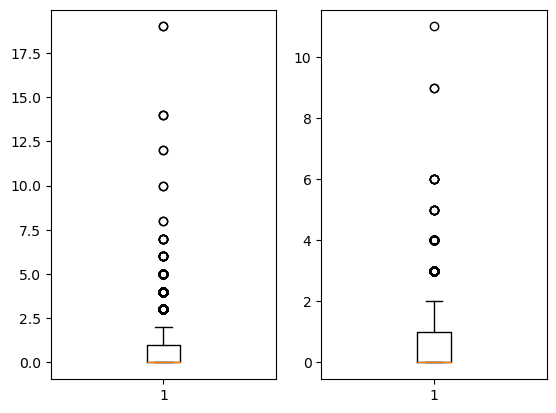

In [476]:
plt.subplot(1,2,1)
plt.boxplot(df_noprob.CNT_CHILDREN)

plt.subplot(1,2,2)
plt.boxplot(df_prob.CNT_CHILDREN)
plt.show()

In [477]:
# Lets create functions to do univariate analysis in a better way since otherwise we have to repeat many times

In [478]:
def box_dist(Variable):
    plt.subplot(1,2,1)
    plt.boxplot(df_application_data[Variable])

    # plt.subplot(2,2,2)
    # plt.boxplot(df_prob[Variable])
    # plt.show()
    
    plt.subplot(1,2,2)
    sns.distplot(df_application_data[Variable])

    # plt.subplot(2,2,4)
    # sns.distplot(df_prob[Variable])
    plt.show()

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


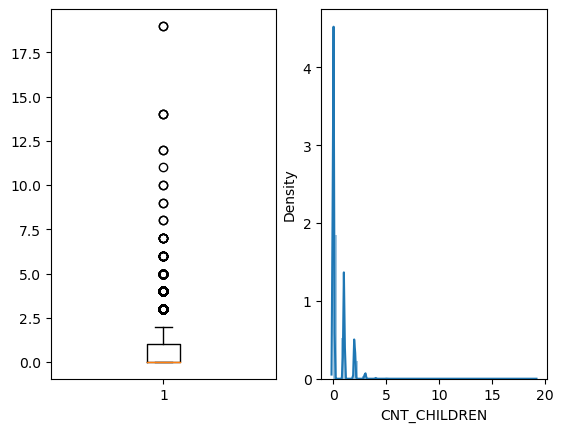

In [479]:
box_dist("CNT_CHILDREN")

In [480]:
# Most Loan Applicant have no children.Through descriptive also confirmed that average children count 0.41 and children count shows decreasing trends with increasing children number.

In [481]:
def descriptive(Variable):
    print(df_application_data[Variable].describe())
    # print(df_prob[Variable].describe())

In [482]:
descriptive('CNT_CHILDREN')

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


In [483]:
def value_counts(Variable):
    print(df_application_data[Variable].value_counts(normalize=True)*100)
    # print(df_prob[Variable].value_counts(normalize=True)*100)

In [484]:
value_counts('CNT_CHILDREN')

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64


In [485]:
# 70 percent people have no chiildren of their own

In [486]:
# From descriptive statistics abovewe get that children count above 
q1=0
q3=1

iqr=q3-q1

print((q1-(1.5*iqr)),(q3+(1.5*iqr)))

-1.5 2.5


In [487]:
# So children counts above 2.5 are rare.So rounding off ABOVE 3 CHILDREN COUNT APPLOICANTS ARE RARE.

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


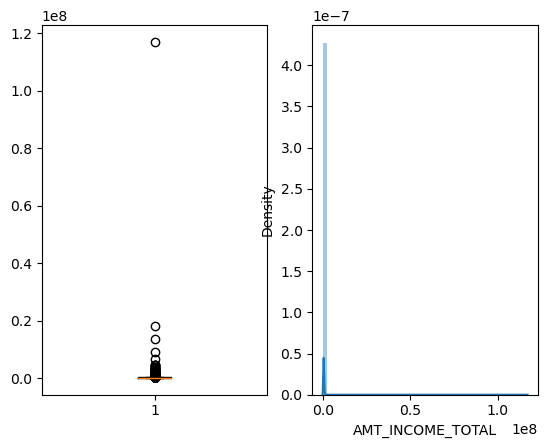

In [488]:
box_dist("AMT_INCOME_TOTAL")

In [489]:
descriptive("AMT_INCOME_TOTAL")

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [490]:
# Incomes are heavily skewed to the right with most people earning around 147000

In [491]:
def outlier_detect(data,Variable):
    q1=np.quantile(data[Variable],0.25)
    q3=np.quantile(data[Variable],0.75)
    iqr=q3-q1
    print((q1-(1.5*iqr)),(q3+(1.5*iqr)))

In [492]:
outlier_detect(df_application_data,"AMT_INCOME_TOTAL")

-22500.0 337500.0


In [493]:
# We found loan applicants that amount above 337500 are outliers

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


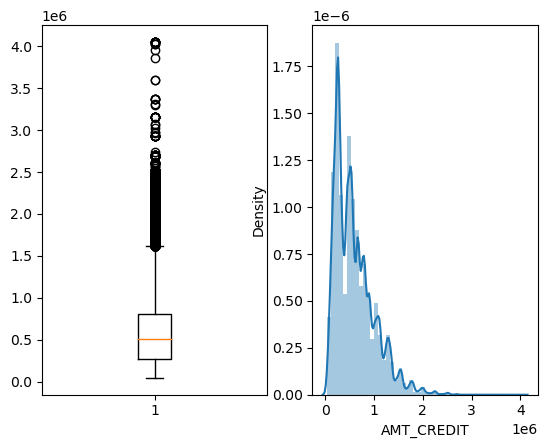

None
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
None
-537975.0 1616625.0
None


In [494]:
print(box_dist("AMT_CREDIT"))
print(descriptive("AMT_CREDIT"))
print(outlier_detect(df_application_data,"AMT_CREDIT"))

In [495]:
# Loan amounts beyond 1.6 Million is rare with most common values being around 500000

In [496]:
df_application_data.select_dtypes(["int64","float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [497]:
df_application_data.select_dtypes(["object"]).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


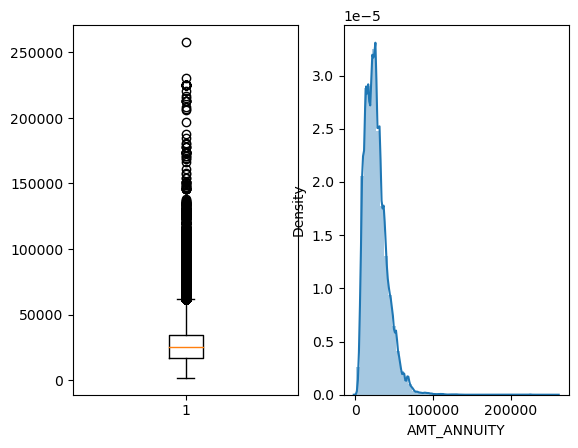

None
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
None
-10584.0 61704.0
None


In [498]:
print(box_dist("AMT_ANNUITY"))
print(descriptive("AMT_ANNUITY"))
print(outlier_detect(df_application_data,"AMT_ANNUITY"))

In [499]:
# Right skewed graph with annuity above 61704 are outliers

In [500]:
def outlier_check(Variable):
    print(box_dist(Variable))
    print(descriptive(Variable))
    print(outlier_detect(df_application_data,Variable))

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


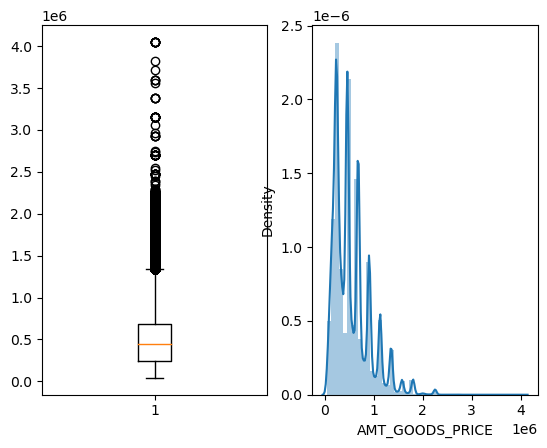

None
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
None
-423000.0 1341000.0
None


In [501]:
outlier_check("AMT_GOODS_PRICE")

In [502]:
# Goods price above 1.34 Millions are rare|

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


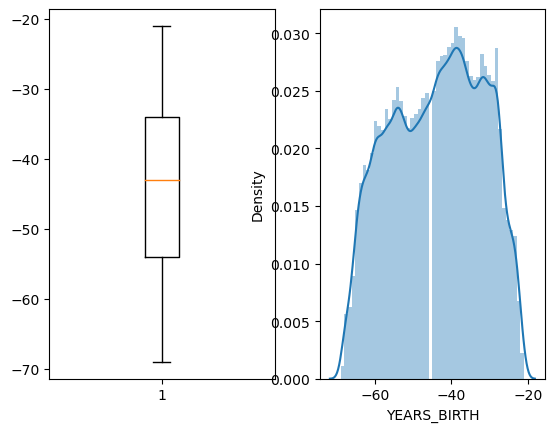

None
count    307511.000000
mean        -43.938646
std          11.964047
min         -69.000000
25%         -54.000000
50%         -43.000000
75%         -34.000000
max         -21.000000
Name: YEARS_BIRTH, dtype: float64
None
-84.0 -4.0
None


In [503]:
outlier_check("YEARS_BIRTH")

In [504]:
# Almost no outlier .All age people are applying for loans

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


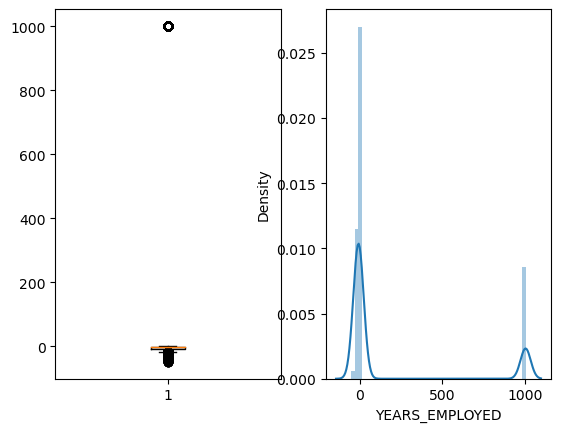

None
count    307511.000000
mean        174.895337
std         387.185661
min         -49.000000
25%          -8.000000
50%          -3.000000
75%          -1.000000
max        1001.000000
Name: YEARS_EMPLOYED, dtype: float64
None
-18.5 9.5
None


In [505]:
outlier_check("YEARS_EMPLOYED")

In [506]:
# We see 2 peaks one for normal people and one for the codified unemployed or pensioned people.It become more are for people who had been employed for 18+ plus years to apply for loans

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\4139461060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_application_data[Variable])


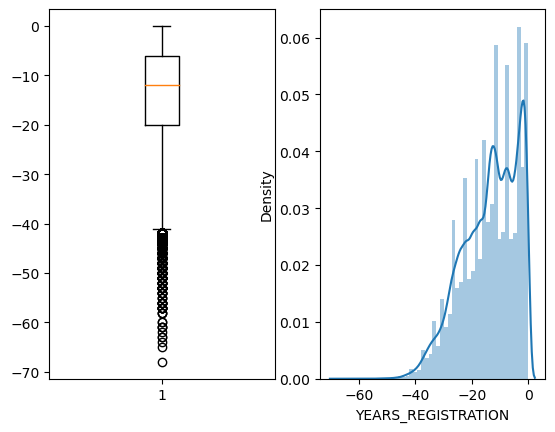

None
count    307511.000000
mean        -13.659440
std           9.659369
min         -68.000000
25%         -20.000000
50%         -12.000000
75%          -6.000000
max           0.000000
Name: YEARS_REGISTRATION, dtype: float64
None
-41.0 15.0
None


In [507]:
outlier_check("YEARS_REGISTRATION")

In [508]:
# 41 plus years of registration are outtlers

In [509]:
# Categorical Variables Check

In [510]:
df_application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

<Axes: >

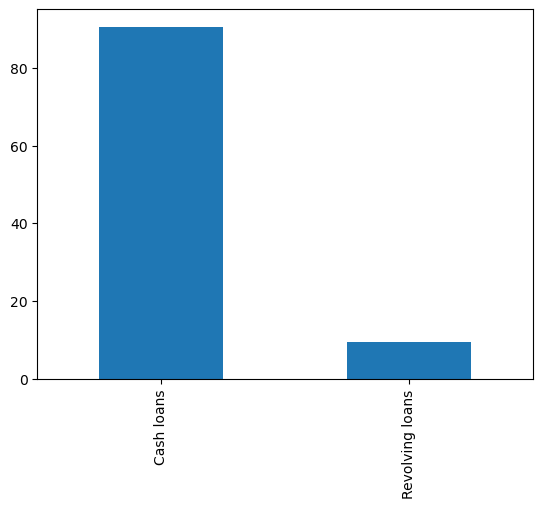

In [511]:
(df_application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.bar()

In [512]:
# Cash Loans mush mnore prevalent than Revolving Loans

In [513]:
# Lets drill down to individual loan problematic or non problematic sectors

<Axes: >

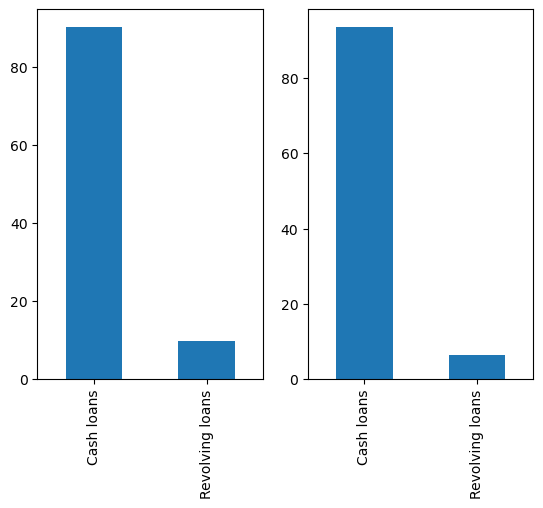

In [514]:
plt.subplot(1,2,1)
(df_noprob['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.bar()

plt.subplot(122)
(df_prob['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.bar()

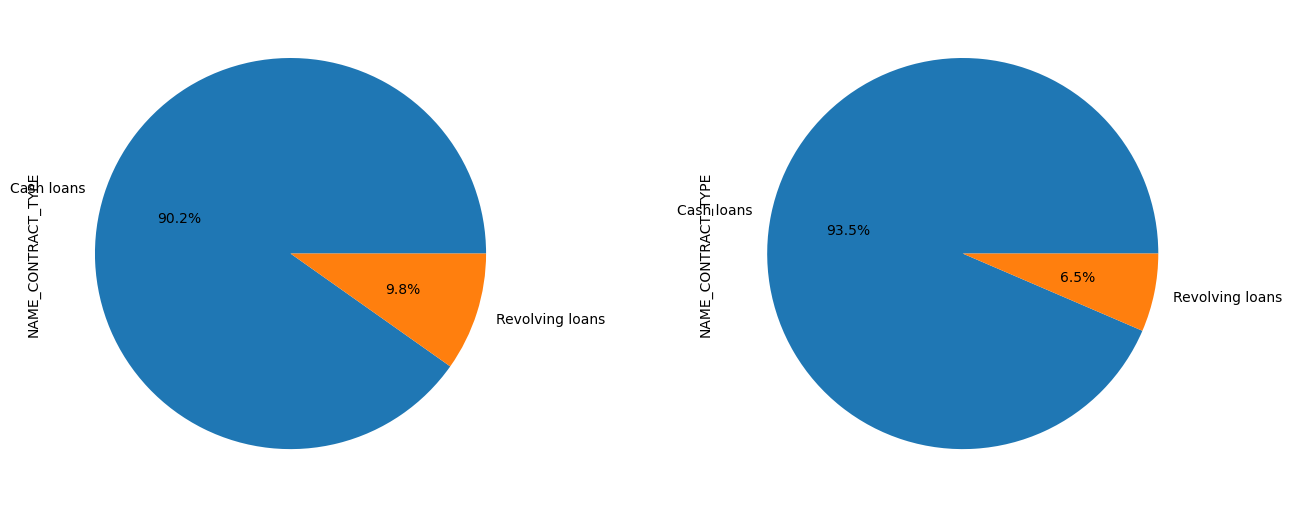

In [515]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()

In [516]:
# Revolving loans are present in greater no. in No loan problems sector

In [517]:
df_application_data['CODE_GENDER'].value_counts(normalize=True)*100

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

In [518]:
# Much more Female Applicants compared to Male Applicants

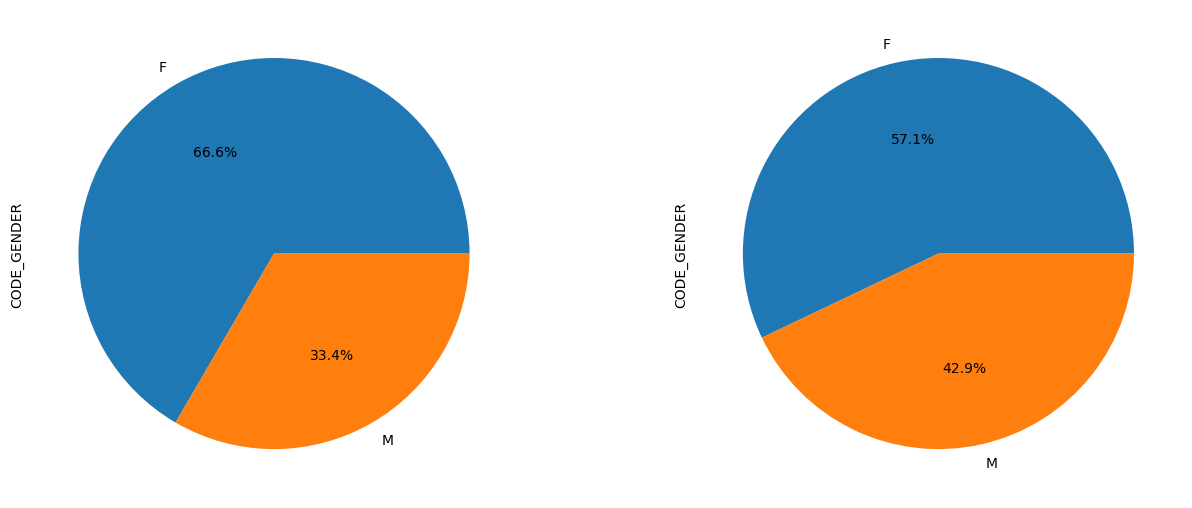

In [519]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['CODE_GENDER'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['CODE_GENDER'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()

In [520]:
# We see a proportion shift between no problem and problem sectors

In [521]:
df_application_data['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

In [522]:
# No car owned by most Loan Applicants

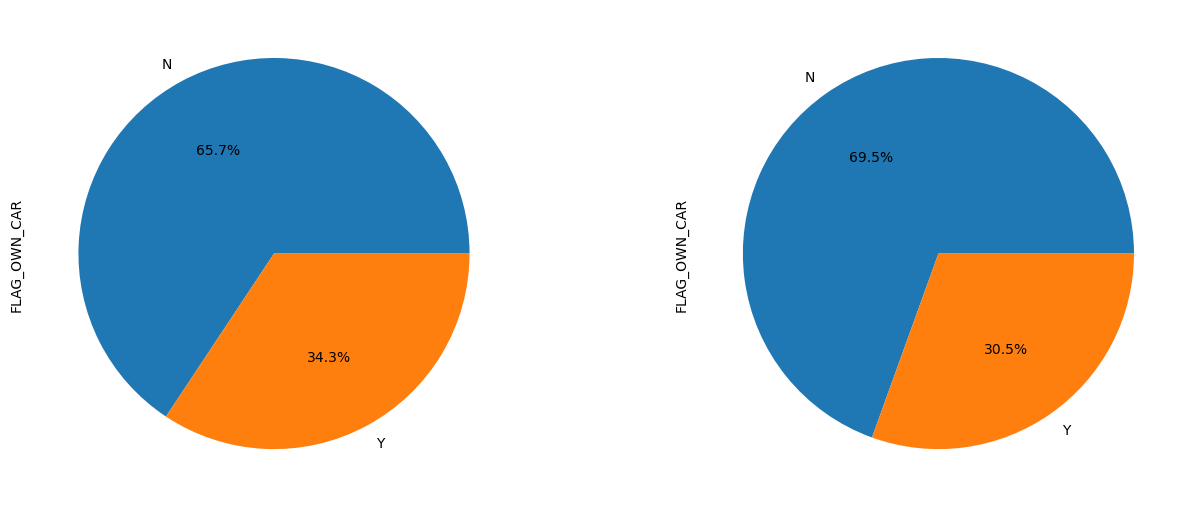

In [523]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['FLAG_OWN_CAR'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['FLAG_OWN_CAR'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()

In [524]:
# Not much difference found in difference across Car Ownership of Loan Applicants across the problem and non problem groups

In [525]:
df_application_data['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

In [526]:
# Realty owned by most people

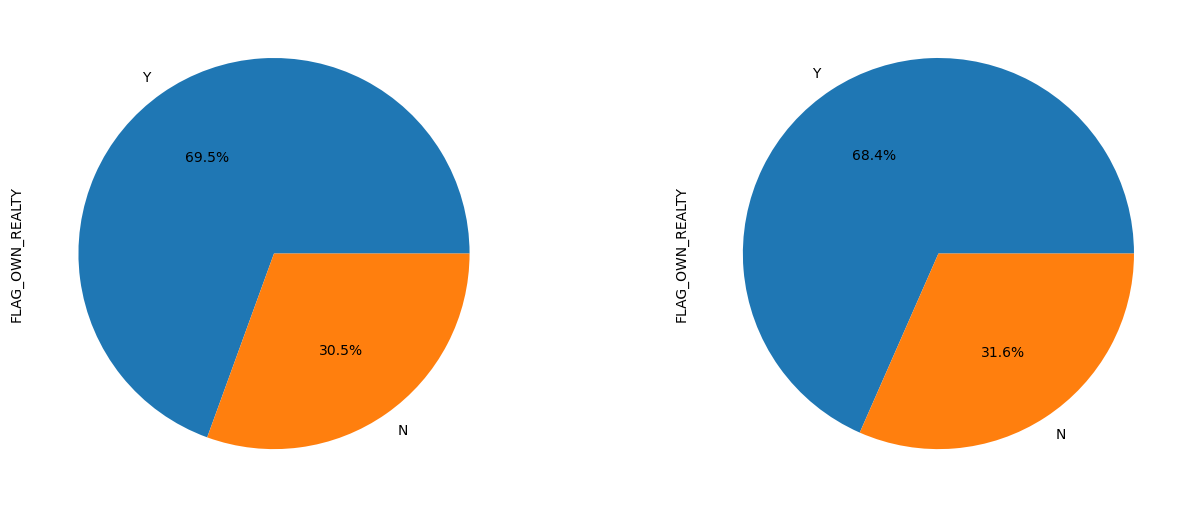

In [527]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['FLAG_OWN_REALTY'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['FLAG_OWN_REALTY'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()

In [528]:
# Not much difference across groups

In [529]:
df_application_data['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      80.818572
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Missing             0.420148
Other_A             0.281616
Group of people     0.088127
Name: NAME_TYPE_SUITE, dtype: float64

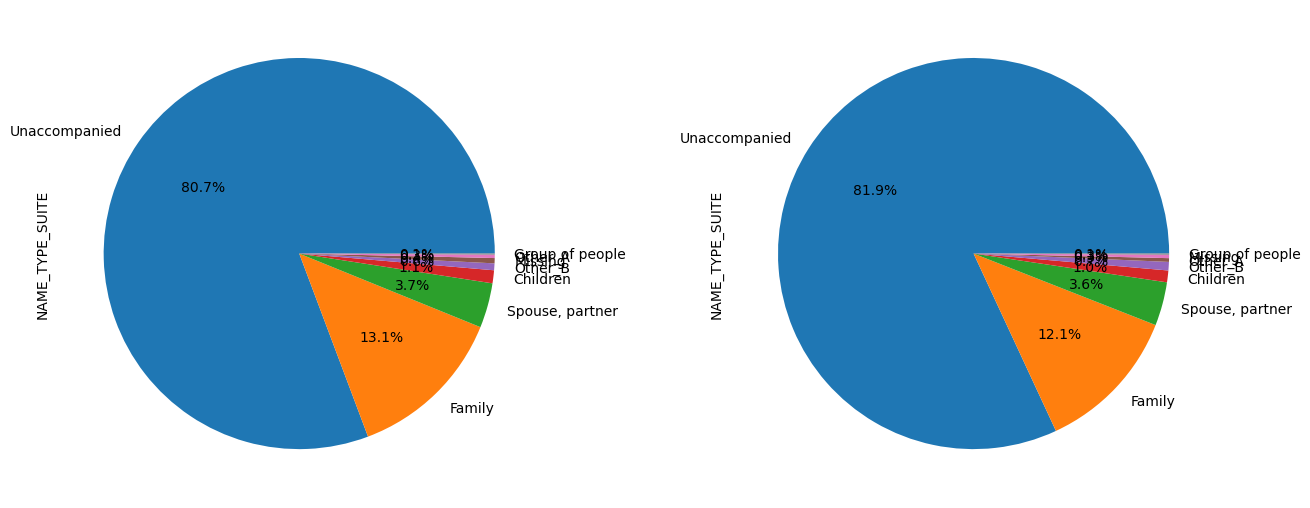

In [530]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['NAME_TYPE_SUITE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['NAME_TYPE_SUITE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()

In [531]:
# Most people unaccompanied while applying loans and also not much difference across problematic and no problematic sectors

In [532]:
df_application_data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

In [533]:
# Working Peoiple take ths highest loans

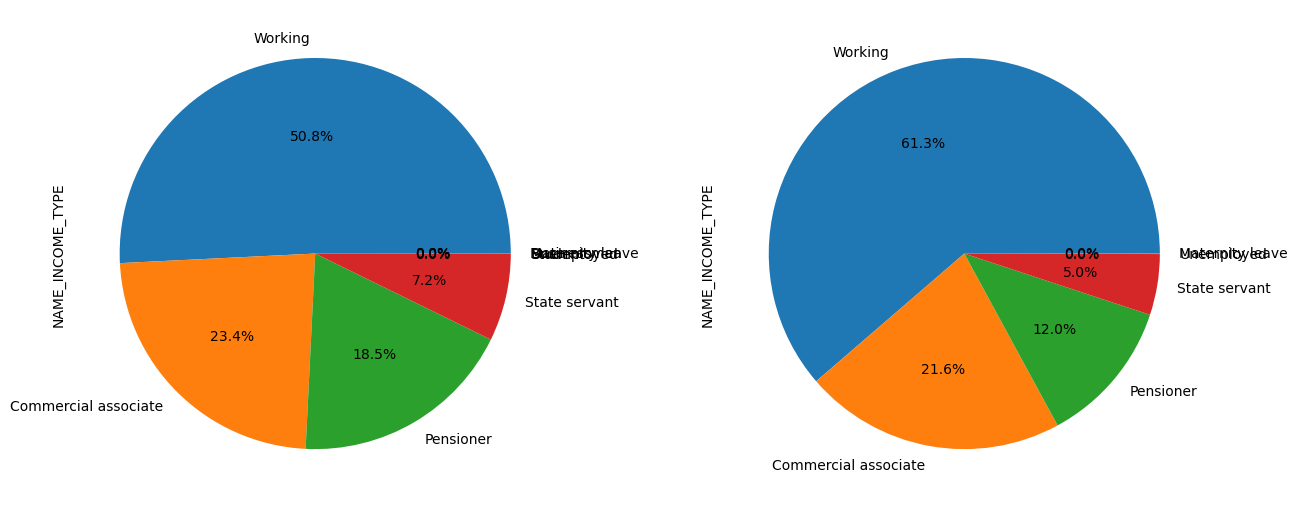

In [534]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()

In [535]:
print(df_noprob['NAME_INCOME_TYPE'].value_counts(normalize=True)*100)
print(df_prob['NAME_INCOME_TYPE'].value_counts(normalize=True)*100)

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64
Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64


In [536]:
# Proportion of Working People in Loan Defaulting group is more than what it is in non defaulting group.Students and Businessman Not present in Loand Default Groups.

In [537]:
df_application_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

In [538]:
# People With Secondary / secondary special take the most Loans

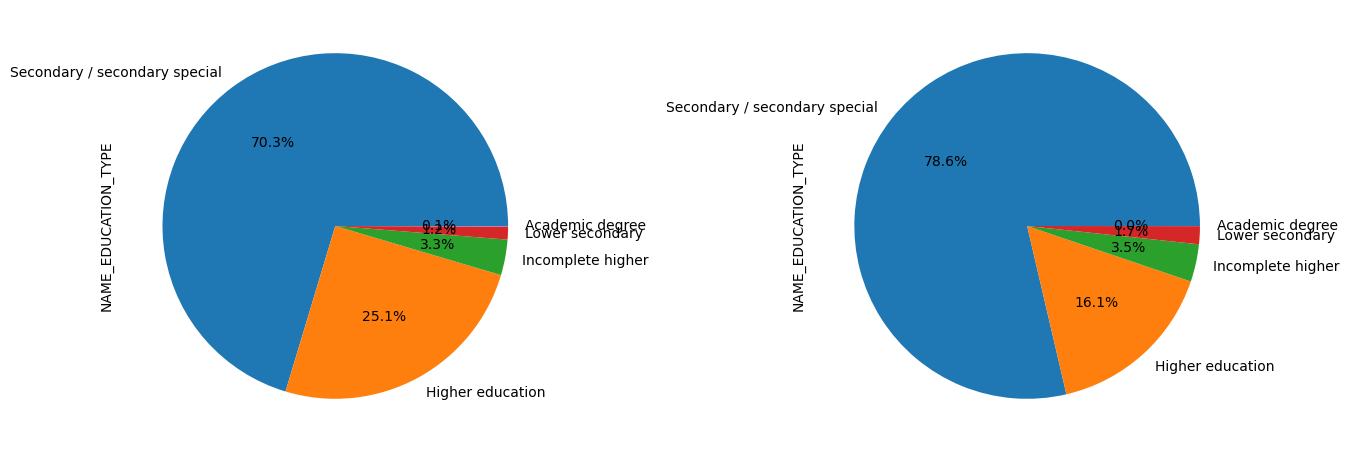

In [539]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()

In [540]:
print(df_noprob['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100)
print(df_prob['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100)

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64
Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64


In [541]:
# Secondary /secondary people are defaulting more as more proportionate presence compared to non problematoic group
# Higher education people are defaulting less as less proportionate presence compared to non problematoic group

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64


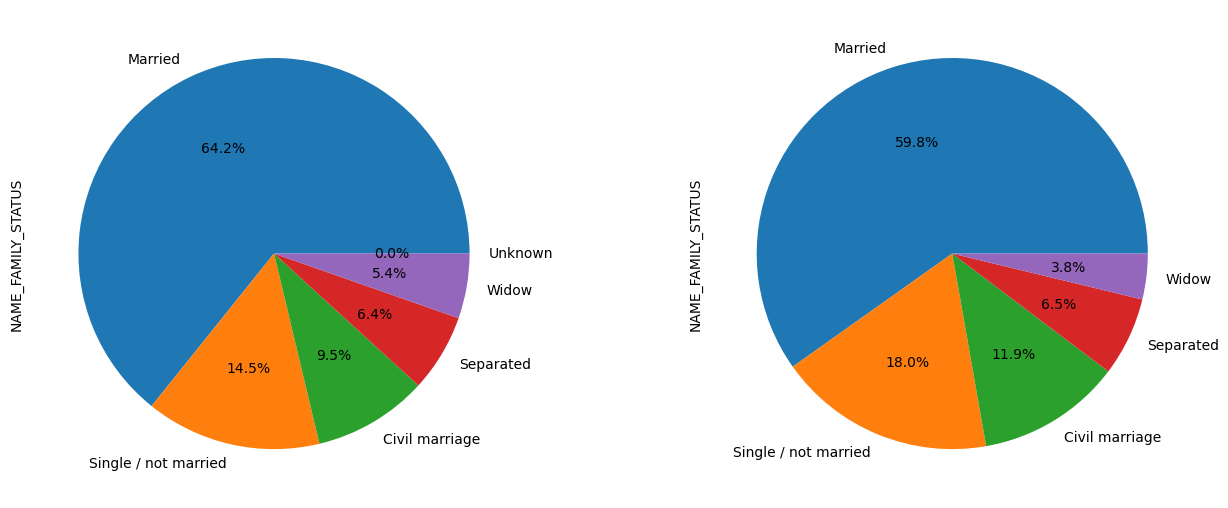

Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64
Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64


In [542]:
print(df_application_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()
print(df_noprob['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100)
print(df_prob['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100)

In [543]:
# Married People Applying for the most no. of Loans
# Single people are defaulting more as more proportionate presence compared to non problematoic group
# MArried people are defaulting less as less proportionate presence compared to non problematoic group

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64


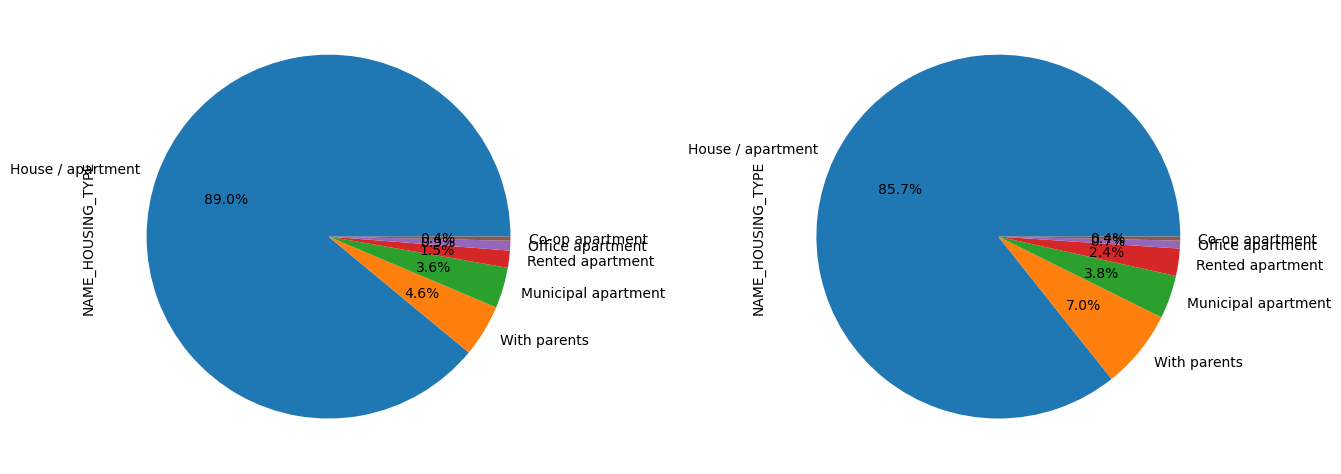

House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64
House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64


In [544]:
print(df_application_data['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()
print(df_noprob['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100)
print(df_prob['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100)

In [545]:
# People Already with House/Apartmernt are applying for loans more

Missing                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64


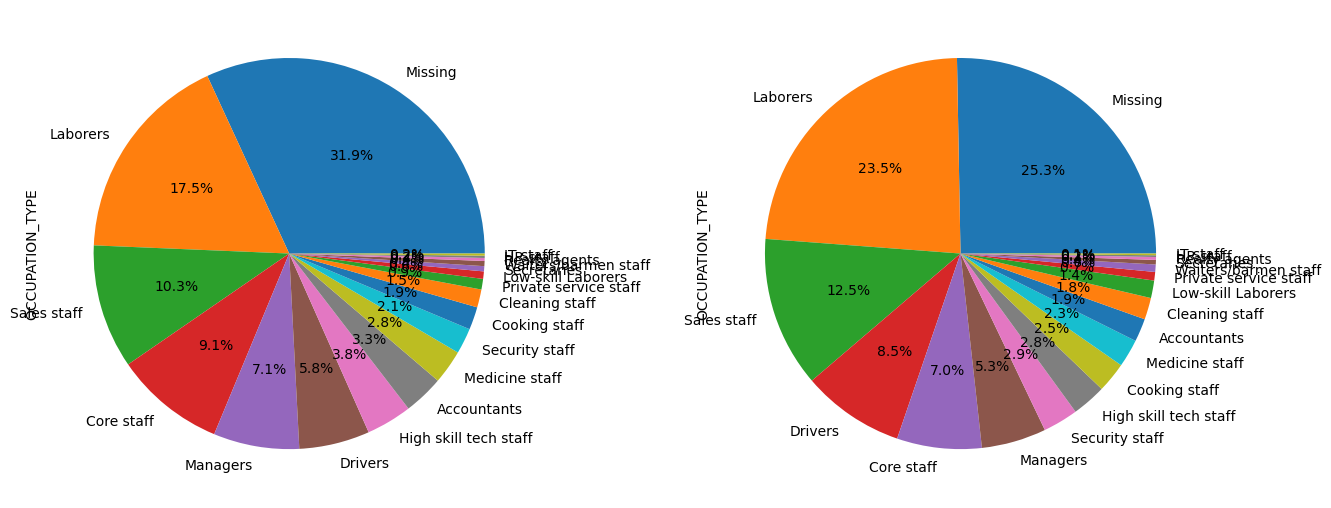

Missing                  31.877419
Laborers                 17.456825
Sales staff              10.262270
Core staff                9.138054
Managers                  7.090199
Drivers                   5.835450
High skill tech staff     3.777690
Accountants               3.303666
Medicine staff            2.817614
Security staff            2.122143
Cooking staff             1.883716
Cleaning staff            1.487870
Private service staff     0.876237
Low-skill Laborers        0.613401
Secretaries               0.429098
Waiters/barmen staff      0.423084
Realty agents             0.244795
HR staff                  0.186426
IT staff                  0.174045
Name: OCCUPATION_TYPE, dtype: float64
Missing                  25.289023
Laborers                 23.516616
Sales staff              12.455186
Drivers                   8.487412
Core staff                7.001007
Managers                  5.349446
Security staff            2.908359
High skill tech staff     2.823766
Cooking staff    

In [546]:
print(df_application_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['OCCUPATION_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['OCCUPATION_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()
print(df_noprob['OCCUPATION_TYPE'].value_counts(normalize=True)*100)
print(df_prob['OCCUPATION_TYPE'].value_counts(normalize=True)*100)

In [547]:
# Labourers and Sales Staff are applying for loans more

TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


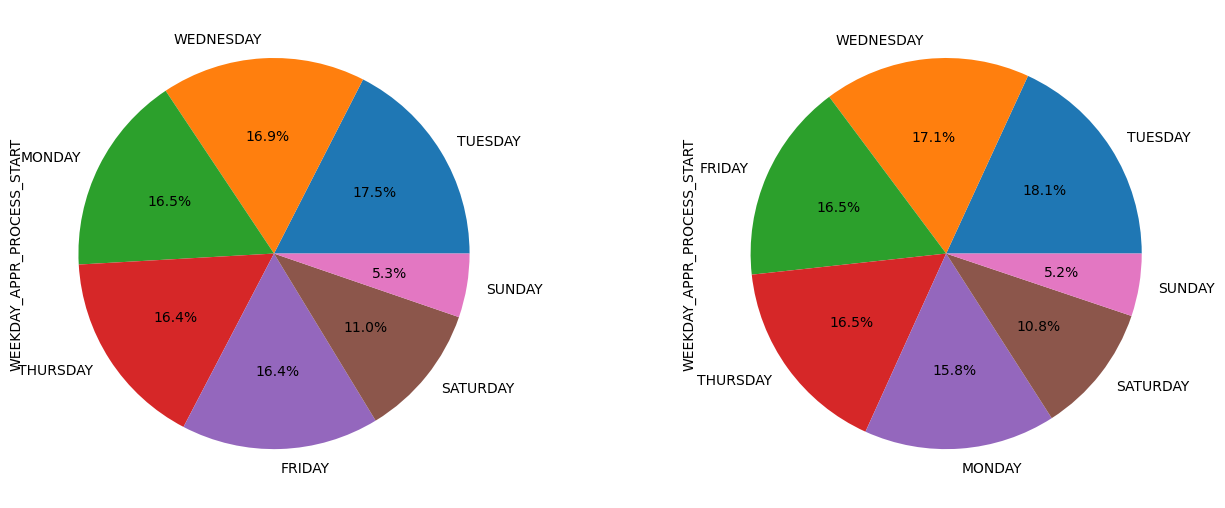

TUESDAY      17.475220
WEDNESDAY    16.872431
MONDAY       16.548396
THURSDAY     16.446870
FRIDAY       16.356311
SATURDAY     11.030613
SUNDAY        5.270158
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
TUESDAY      18.130916
WEDNESDAY    17.071501
FRIDAY       16.519637
THURSDAY     16.507553
MONDAY       15.846928
SATURDAY     10.755287
SUNDAY        5.168177
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


In [548]:
print(df_application_data['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)*100)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()
print(df_noprob['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)*100)
print(df_prob['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)*100)

In [549]:
# Saturday and Sunday are lowest in terms of loan applications whereas tuesdays are highest

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

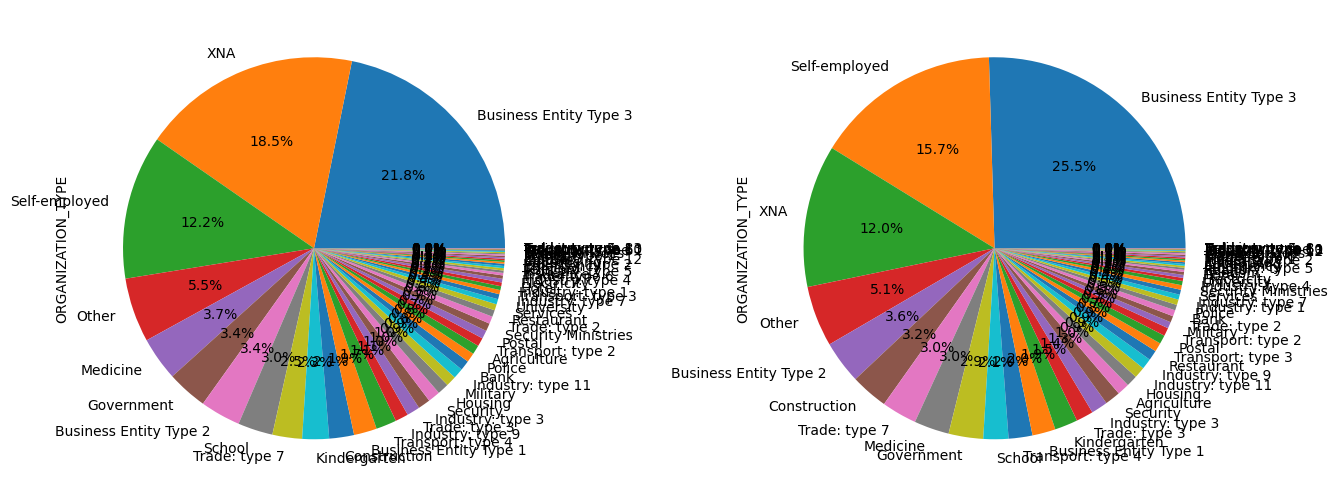

Business Entity Type 3    21.815371
XNA                       18.530808
Self-employed             12.205769
Other                      5.450571
Medicine                   3.698804
Government                 3.423587
Business Entity Type 2     3.414743
School                     2.959821
Trade: type 7              2.508437
Kindergarten               2.262581
Construction               2.099856
Business Entity Type 1     1.944560
Transport: type 4          1.732311
Industry: type 9           1.111834
Trade: type 3              1.107589
Industry: type 3           1.036486
Security                   1.034009
Housing                    0.963260
Military                   0.884020
Industry: type 11          0.873761
Bank                       0.840862
Police                     0.786739
Agriculture                0.777187
Transport: type 2          0.718819
Postal                     0.698655
Security Ministries        0.664341
Trade: type 2              0.625075
Restaurant                 0

In [550]:
print(df_application_data['ORGANIZATION_TYPE'].value_counts(normalize=True)*100)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(df_noprob['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
(df_prob['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

plt.tight_layout(pad = 4)
plt.show()
print(df_noprob['ORGANIZATION_TYPE'].value_counts(normalize=True)*100)
print(df_prob['ORGANIZATION_TYPE'].value_counts(normalize=True)*100)

In [551]:
# Business Entity,Unknown and Self Employed Organization Types Individuals are the highest Loan Applicants.

# Data Balance Check

In [552]:
df_application_data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [553]:
# 92 percent people have no loan repayment problems while around 8 percent do.
# There is data imbalance here thus

(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

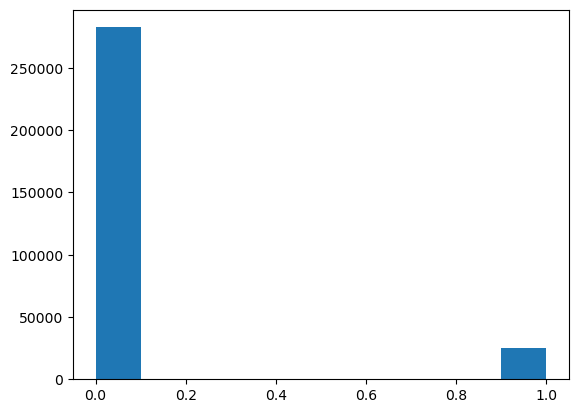

In [554]:
plt.hist(df_application_data.TARGET)

<Axes: >

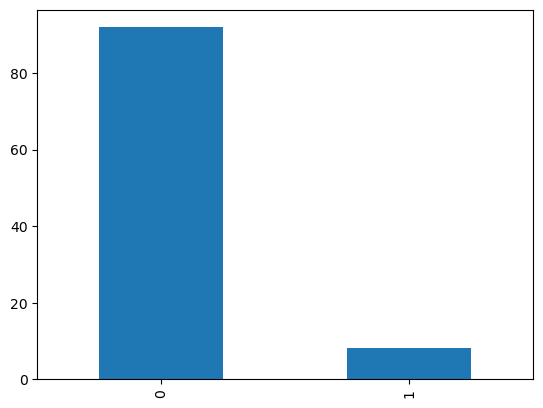

In [555]:
(df_application_data.TARGET.value_counts(normalize=True)*100).plot.bar()

In [556]:
# If we build some ML or Statistical Modelling on this data later we need to balancve these 2 groups else the underrepresenation of defaulting group will pose a challenge in
# identifying defaulting individual characteristics

# Bivariate Analysis

In [557]:
# Let us a plota  correlation matrix of the numerical variables

In [558]:
df_application_data.select_dtypes(include=["int64","float64"]).corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000343 -0.030369      0.002145   
AMT_ANNUITY                   -0.000431 -0.012815      0.021377   
AMT_GOODS_PRICE               -0.000258 -0.039623     -0.001856   
REGION_POPULATION_RELATIVE     0.000849 -0.037227     -0.025573   
DAYS_BIRTH                    -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION             -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE               -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE               0.002815  0.000370     -0.000794   
FLAG_PHONE                     0.002753 -0.023806     -0.029906   
FLAG_EMAIL                     0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS               -0.002895  0.009308      0.879160   
REGION_RATING_CLIENT          -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY   -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION    -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION     0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION    0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY        -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY        -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY        0.000067  0.032518      0.069957   
EXT_SOURCE_2                   0.002319 -0.160295     -0.017990   
EXT_SOURCE_3                   0.000184 -0.155892     -0.039543   
OBS_30_CNT_SOCIAL_CIRCLE      -0.001413  0.009447      0.015662   
DEF_30_CNT_SOCIAL_CIRCLE      -0.000085  0.032394     -0.001205   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001427  0.009337      0.015302   
DEF_60_CNT_SOCIAL_CIRCLE       0.001182  0.031401     -0.001811   
DAYS_LAST_PHONE_CHANGE        -0.000859  0.055218     -0.005866   
FLAG_DOCUMENT_2                0.000700  0.005417      0.001786   
FLAG_DOCUMENT_3               -0.003411  0.044346      0.056837   
FLAG_DOCUMENT_4               -0.004139 -0.002672     -0.003709   
FLAG_DOCUMENT_5               -0.001097 -0.000316     -0.016737   
FLAG_DOCUMENT_6                0.002121 -0.028602     -0.157024   
FLAG_DOCUMENT_7               -0.002694 -0.001520     -0.001498   
FLAG_DOCUMENT_8                0.001809 -0.008040      0.051697   
FLAG_DOCUMENT_9                0.001505 -0.004352     -0.001997   
FLAG_DOCUMENT_10              -0.000815 -0.001414     -0.002756   
FLAG_DOCUMENT_11              -0.002012 -0.004229     -0.005318   
FLAG_DOCUMENT_12              -0.001045 -0.000756      0.000293   
FLAG_DOCUMENT_13               0.000896 -0.011583      0.003945   
FLAG_DOCUMENT_14              -0.001077 -0.009464     -0.005459   
FLAG_DOCUMENT_15               0.002604 -0.006536      0.003609   
FLAG_DOCUMENT_16              -0.000724 -0.011615      0.010662   
FLAG_DOCUMENT_17               0.001450 -0.003378      0.000773   
FLAG_DOCUMENT_18               0.000509 -0.007952      0.004031   
FLAG_DOCUMENT_19               0.000167 -0.001358      0.000864   
FLAG_DOCUMENT_20               0.001073  0.000215      0.000988   
FLAG_DOCUMENT_21               0.000282  0.003709     -0.002450   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.002517 -0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_DAY     -0.002066  0.001701      0.000107   
AMT_REQ_CREDIT_BUREAU_WEEK     0.001879 -0.001306     -0.001083   
AMT_REQ_CREDIT_BUREAU_MON      0.000328 -0.014794     -0.007983   
AMT_REQ_C

In [559]:
df_corr=df_application_data.select_dtypes(include=["int64","float64"]).corr()

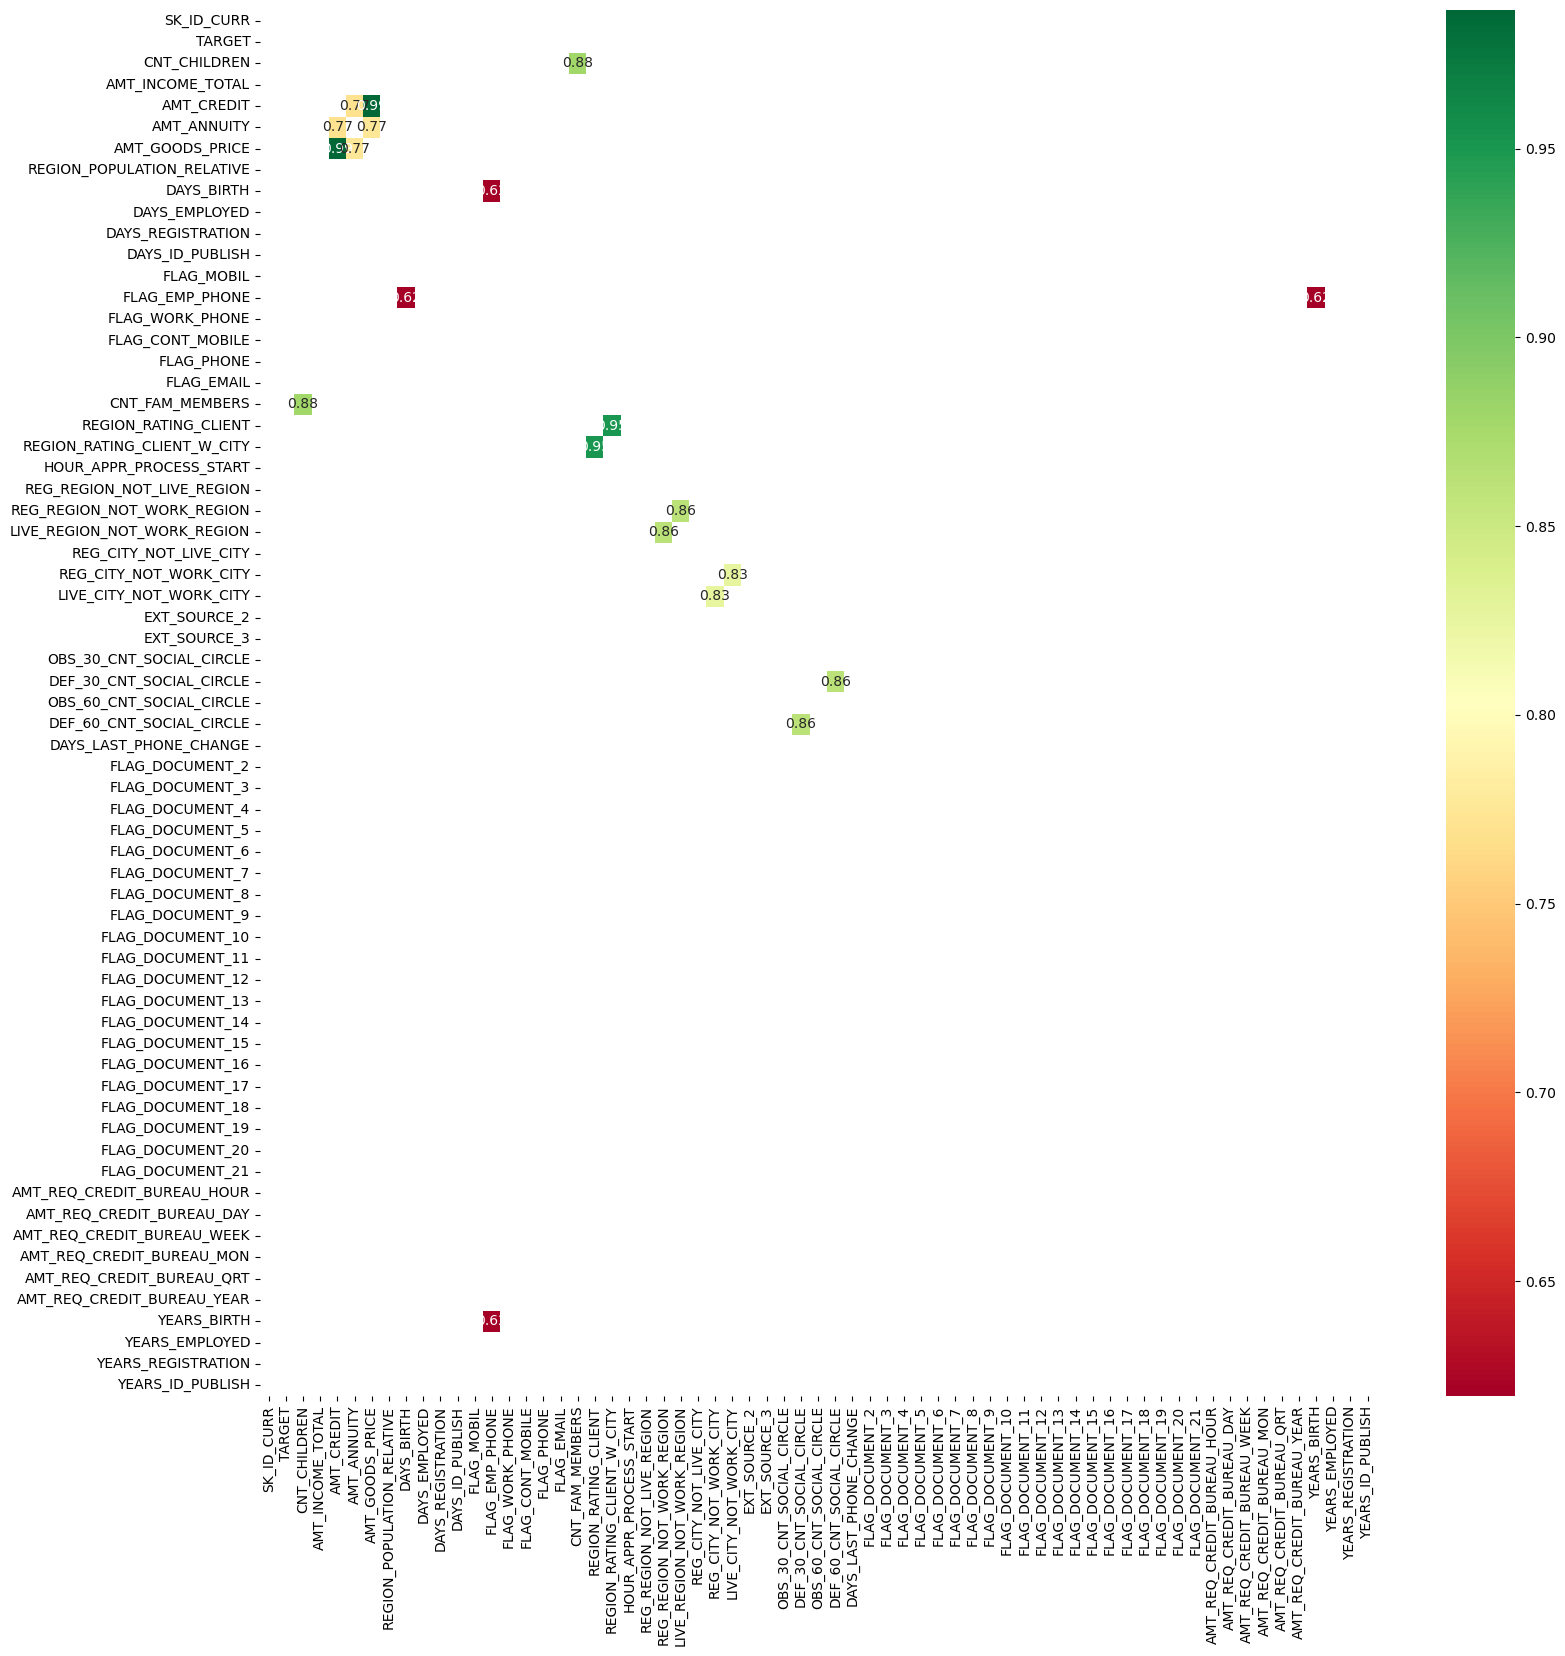

In [560]:
# Lets plot it
plt.figure(figsize=(18,18))
sns.heatmap(df_corr[(df_corr>0.6) & (df_corr<0.99)],annot=True,cmap = "RdYlGn", cbar = True,)
plt.show()

In [561]:
df_corr[(df_corr>0.6) & (df_corr<0.99)]

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                          NaN     NaN           NaN   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                        NaN     NaN           NaN   
AMT_INCOME_TOTAL                    NaN     NaN           NaN   
AMT_CREDIT                          NaN     NaN           NaN   
AMT_ANNUITY                         NaN     NaN           NaN   
AMT_GOODS_PRICE                     NaN     NaN           NaN   
REGION_POPULATION_RELATIVE          NaN     NaN           NaN   
DAYS_BIRTH                          NaN     NaN           NaN   
DAYS_EMPLOYED                       NaN     NaN           NaN   
DAYS_REGISTRATION                   NaN     NaN           NaN   
DAYS_ID_PUBLISH                     NaN     NaN           NaN   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                      NaN     NaN           NaN   
FLAG_WORK_PHONE                     NaN     NaN           NaN   
FLAG_CONT_MOBILE                    NaN     NaN           NaN   
FLAG_PHONE                          NaN     NaN           NaN   
FLAG_EMAIL                          NaN     NaN           NaN   
CNT_FAM_MEMBERS                     NaN     NaN       0.87916   
REGION_RATING_CLIENT                NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY         NaN     NaN           NaN   
HOUR_APPR_PROCESS_START             NaN     NaN           NaN   
REG_REGION_NOT_LIVE_REGION          NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION          NaN     NaN           NaN   
LIVE_REGION_NOT_WORK_REGION         NaN     NaN           NaN   
REG_CITY_NOT_LIVE_CITY              NaN     NaN           NaN   
REG_CITY_NOT_WORK_CITY              NaN     NaN           NaN   
LIVE_CITY_NOT_WORK_CITY             NaN     NaN           NaN   
EXT_SOURCE_2                        NaN     NaN           NaN   
EXT_SOURCE_3                        NaN     NaN           NaN   
OBS_30_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DEF_30_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
OBS_60_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DEF_60_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DAYS_LAST_PHONE_CHANGE              NaN     NaN           NaN   
FLAG_DOCUMENT_2                     NaN     NaN           NaN   
FLAG_DOCUMENT_3                     NaN     NaN           NaN   
FLAG_DOCUMENT_4                     NaN     NaN           NaN   
FLAG_DOCUMENT_5                     NaN     NaN           NaN   
FLAG_DOCUMENT_6                     NaN     NaN           NaN   
FLAG_DOCUMENT_7                     NaN     NaN           NaN   
FLAG_DOCUMENT_8                     NaN     NaN           NaN   
FLAG_DOCUMENT_9                     NaN     NaN           NaN   
FLAG_DOCUMENT_10                    NaN     NaN           NaN   
FLAG_DOCUMENT_11                    NaN     NaN           NaN   
FLAG_DOCUMENT_12                    NaN     NaN           NaN   
FLAG_DOCUMENT_13                    NaN     NaN           NaN   
FLAG_DOCUMENT_14                    NaN     NaN           NaN   
FLAG_DOCUMENT_15                    NaN     NaN           NaN   
FLAG_DOCUMENT_16                    NaN     NaN           NaN   
FLAG_DOCUMENT_17                    NaN     NaN           NaN   
FLAG_DOCUMENT_18                    NaN     NaN           NaN   
FLAG_DOCUMENT_19                    NaN     NaN           NaN   
FLAG_DOCUMENT_20                    NaN     NaN           NaN   
FLAG_DOCUMENT_21                    NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_HOUR          NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_DAY           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_WEEK          NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_MON           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_QRT           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_YEAR          NaN     NaN           NaN   

In [562]:
df_corr[(df_corr>0.6) & (df_corr<=0.99)].unstack().sort_values(ascending=False).head(20)

AMT_GOODS_PRICE              AMT_CREDIT                     0.986734
AMT_CREDIT                   AMT_GOODS_PRICE                0.986734
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879160
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879160
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860627
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.860556
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.860556
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825575
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.825575
AMT_GOODS_PRICE              AMT_ANNUITY                    0.774837
AMT_ANNUITY                  AMT_GOODS_PRICE                0.774837
AMT_CREDIT                   AMT_A

# Continous vs Continous Analysis

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

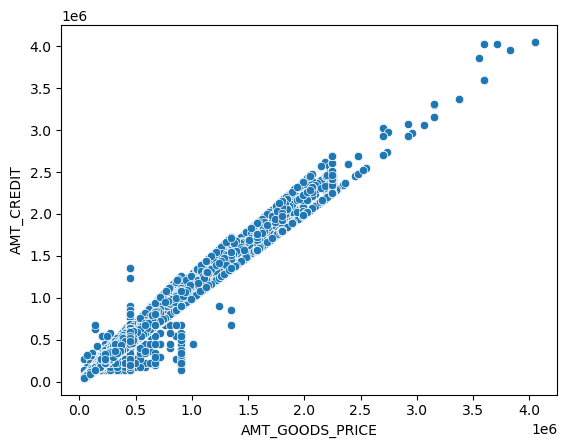

In [563]:
sns.scatterplot(df_application_data,x="AMT_GOODS_PRICE",y="AMT_CREDIT")

In [564]:
# We find good relationship between the amount of goods loan has been applied for and loan amount

<Axes: xlabel='YEARS_BIRTH', ylabel='AMT_INCOME_TOTAL'>

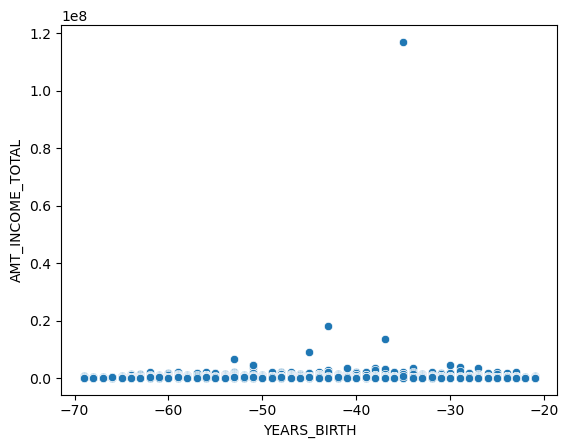

In [565]:
sns.scatterplot(df_application_data,x="YEARS_BIRTH",y="AMT_INCOME_TOTAL")

In [566]:
df_application_data[["YEARS_BIRTH","AMT_INCOME_TOTAL"]].corr()

YEARS_BIRTH  AMT_INCOME_TOTAL
YEARS_BIRTH          1.000000          0.027201
AMT_INCOME_TOTAL     0.027201          1.000000

In [567]:
# No relation almost between age and income

<Axes: xlabel='YEARS_BIRTH', ylabel='CNT_CHILDREN'>

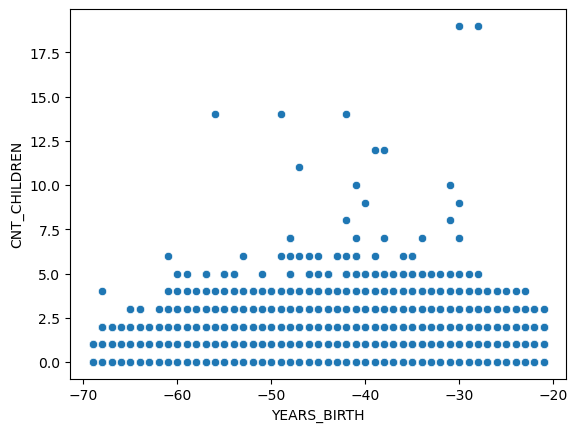

In [568]:
sns.scatterplot(df_application_data,x="YEARS_BIRTH",y="CNT_CHILDREN")

In [569]:
df_application_data[["YEARS_BIRTH","CNT_CHILDREN"]].corr()

YEARS_BIRTH  CNT_CHILDREN
YEARS_BIRTH      1.000000      0.330812
CNT_CHILDREN     0.330812      1.000000

In [570]:
# Not much relation between age and children.We notice a pattern thant somehwat more no. of children and outliers for people born around 45 years ago with the no of children low on both ends

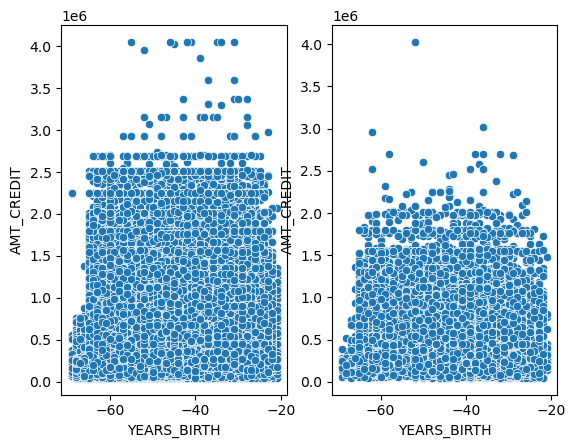

In [571]:
plt.subplot(121)
sns.scatterplot(df_noprob,x="YEARS_BIRTH",y="AMT_CREDIT")

plt.subplot(122)
sns.scatterplot(df_prob,x="YEARS_BIRTH",y="AMT_CREDIT")

plt.show()

In [572]:
# Weak relation between age and amount credit

In [573]:
# Continous vs Categorical Analysis

<Axes: xlabel='CODE_GENDER', ylabel='AMT_INCOME_TOTAL'>

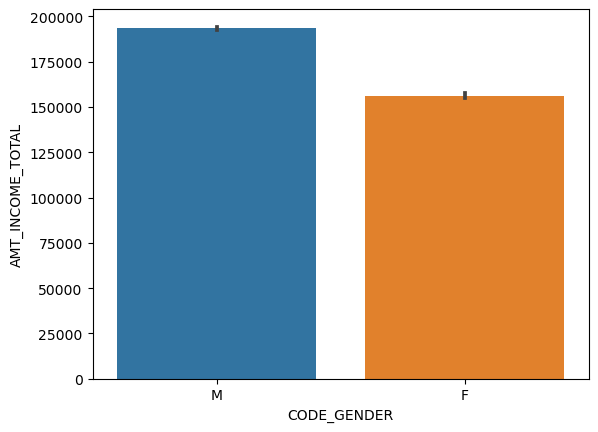

In [574]:
sns.barplot(df_application_data,x="CODE_GENDER",y="AMT_INCOME_TOTAL")

In [575]:
# There is income dispatrity between Males and Females

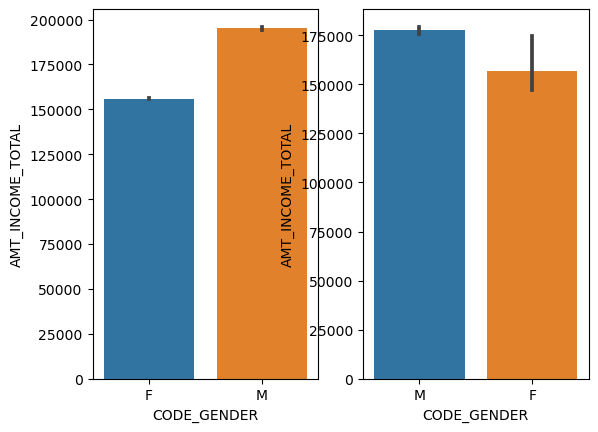

In [576]:
plt.subplot(121)
sns.barplot(df_noprob,x="CODE_GENDER",y="AMT_INCOME_TOTAL")

plt.subplot(122)
sns.barplot(df_prob,x="CODE_GENDER",y="AMT_INCOME_TOTAL")

plt.show()

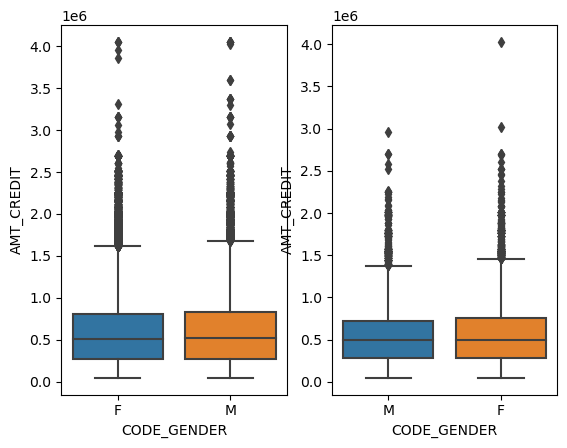

In [577]:
plt.subplot(121)
sns.boxplot(df_noprob,x="CODE_GENDER",y="AMT_CREDIT")

plt.subplot(122)
sns.boxplot(df_prob,x="CODE_GENDER",y="AMT_CREDIT")

plt.show()

<Axes: xlabel='CODE_GENDER', ylabel='YEARS_BIRTH'>

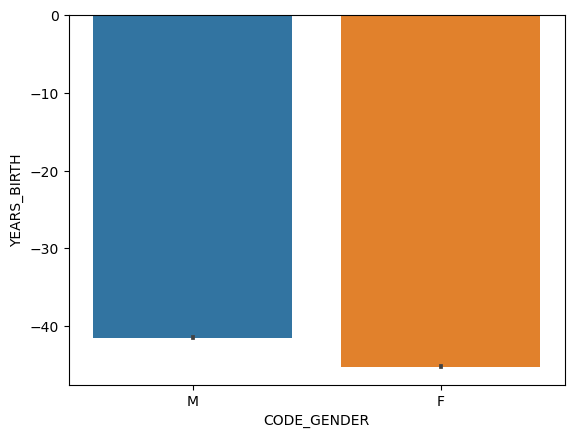

In [578]:
sns.barplot(df_application_data,x="CODE_GENDER",y="YEARS_BIRTH")

In [579]:
# Female Applicants are older on average than Males

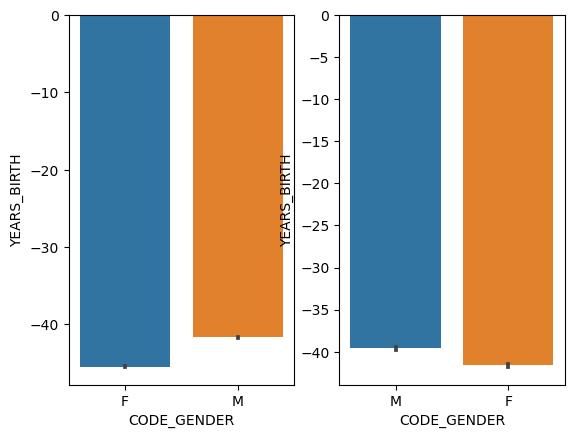

In [580]:
plt.subplot(121)
sns.barplot(df_noprob,x="CODE_GENDER",y="YEARS_BIRTH")

plt.subplot(122)
sns.barplot(df_prob,x="CODE_GENDER",y="YEARS_BIRTH")

plt.show()

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='YEARS_BIRTH'>

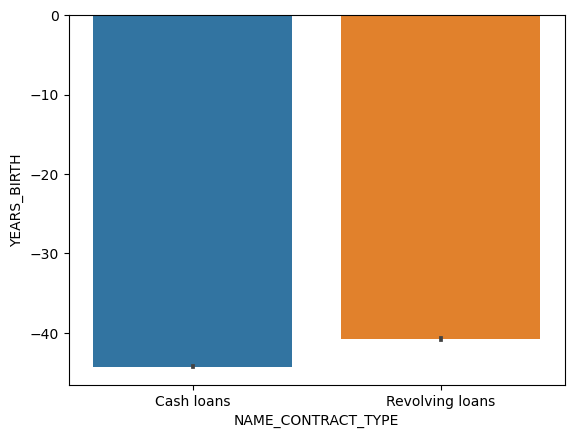

In [581]:
sns.barplot(df_application_data,x="NAME_CONTRACT_TYPE",y="YEARS_BIRTH")

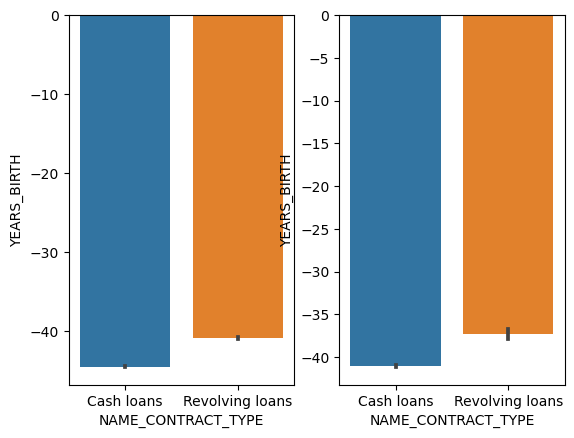

In [582]:
plt.subplot(121)
sns.barplot(df_noprob,x="NAME_CONTRACT_TYPE",y="YEARS_BIRTH")

plt.subplot(122)
sns.barplot(df_prob,x="NAME_CONTRACT_TYPE",y="YEARS_BIRTH")

plt.show()

In [583]:
# Chash Loan Applicants are older than revolving loan Applicants

In [585]:
df_application_data.YEARS_BIRTH.describe()

count    307511.000000
mean        -43.938646
std          11.964047
min         -69.000000
25%         -54.000000
50%         -43.000000
75%         -34.000000
max         -21.000000
Name: YEARS_BIRTH, dtype: float64

In [592]:
df_application_data["Age_Category"]=df_application_data.YEARS_BIRTH.apply(lambda x:'Old' if (x>=-70 and x<=-54) else 'Medium' if (x>-54 and x<=-38) else 'Young')

In [594]:
df_application_data["Age_Category"].value_counts()

Medium    122208
Young     105221
Old        80082
Name: Age_Category, dtype: int64

<Axes: xlabel='Age_Category', ylabel='TARGET'>

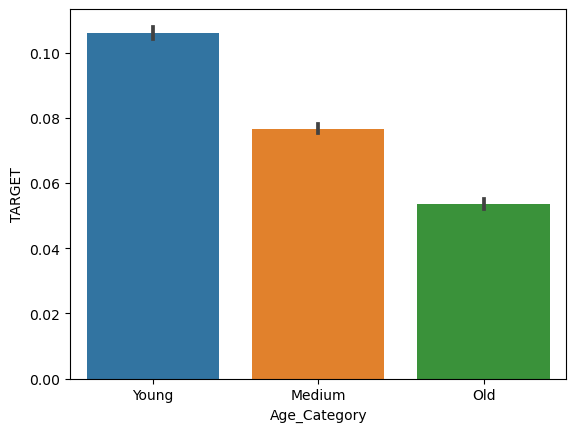

In [595]:
sns.barplot(df_application_data,x="Age_Category",y="TARGET")

In [596]:
# We see that younger people are more likely to default

In [597]:
df_application_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [611]:
df_application_data["Credit_Amount_Category"]=df_application_data.AMT_CREDIT.apply(lambda x:'Low' if (x>=44000 and x<=350000) else 'Medium' if (x>350000 and x<=700000) else 'High')

In [612]:
df_application_data["Credit_Amount_Category"].value_counts()

Low       107162
Medium    100452
High       99897
Name: Credit_Amount_Category, dtype: int64

<Axes: xlabel='Credit_Amount_Category', ylabel='TARGET'>

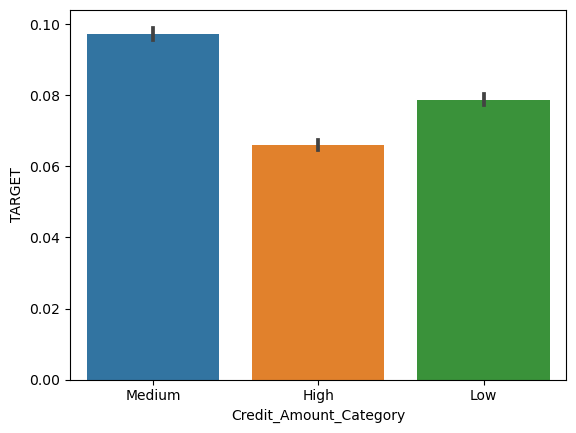

In [613]:
sns.barplot(df_application_data,x="Credit_Amount_Category",y="TARGET")

In [609]:
# We find medium amount loans have the highest chance to default

In [610]:
# In the above 2 cases we converted a continous variable to categorical variable so as to get better insights.

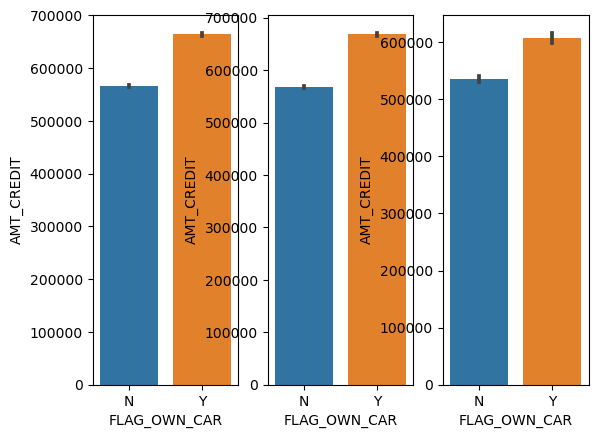

In [164]:
plt.subplot(131)
sns.barplot(df_application_data,x="FLAG_OWN_CAR",y="AMT_CREDIT")
plt.subplot(132)
sns.barplot(df_noprob,x="FLAG_OWN_CAR",y="AMT_CREDIT")

plt.subplot(133)
sns.barplot(df_prob,x="FLAG_OWN_CAR",y="AMT_CREDIT")

plt.show()

In [165]:
# Car OWners Tend to take Bigger Loans

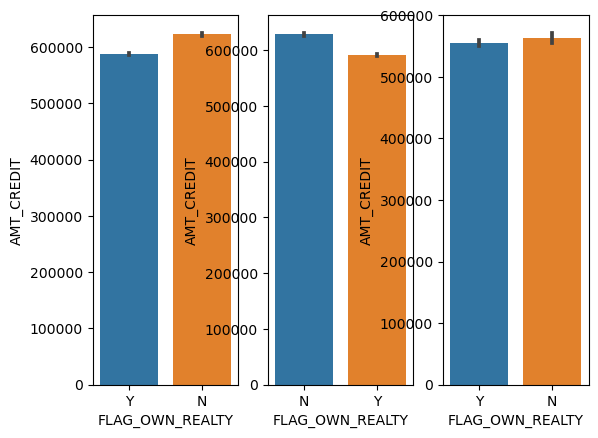

In [166]:
plt.subplot(131)
sns.barplot(df_application_data,x="FLAG_OWN_REALTY",y="AMT_CREDIT")
plt.subplot(132)
sns.barplot(df_noprob,x="FLAG_OWN_REALTY",y="AMT_CREDIT")

plt.subplot(133)
sns.barplot(df_prob,x="FLAG_OWN_REALTY",y="AMT_CREDIT")

plt.show()

In [167]:
# We notice opposing trends here.In no problem group non realty owners take bigger loans while oppposite is true for problem group

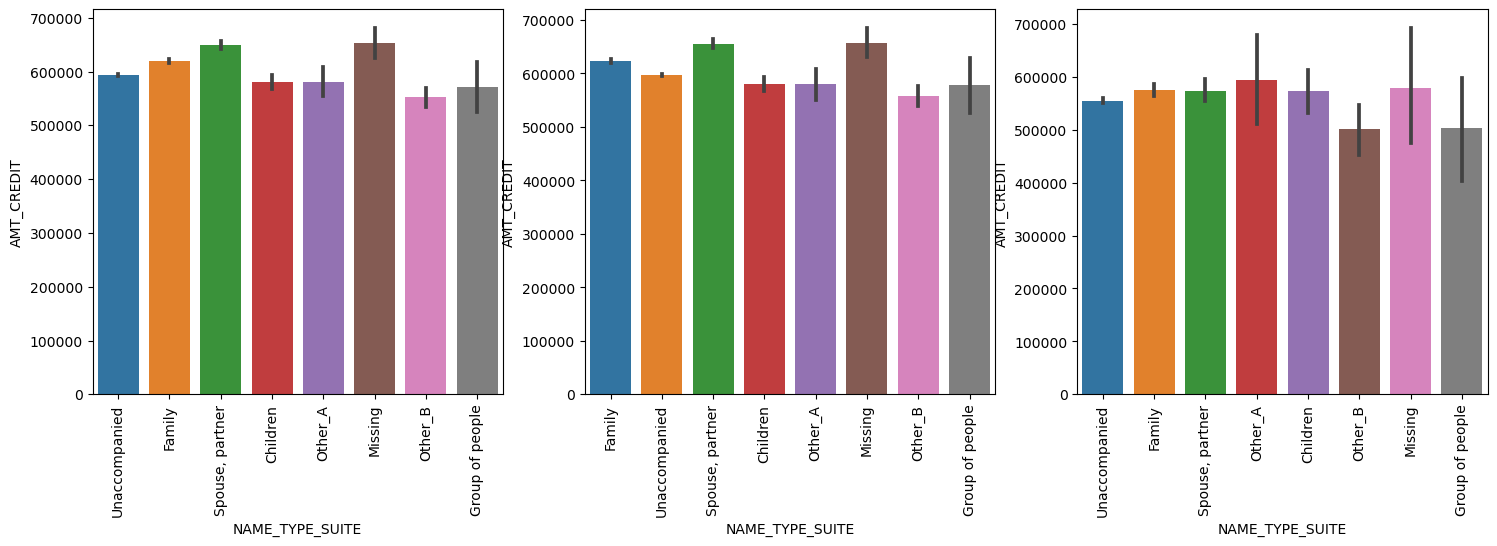

In [168]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.barplot(df_application_data,x="NAME_TYPE_SUITE",y="AMT_CREDIT")
plt.xticks(rotation=90)
plt.subplot(132)
sns.barplot(df_noprob,x="NAME_TYPE_SUITE",y="AMT_CREDIT")
plt.xticks(rotation=90)
plt.subplot(133)
sns.barplot(df_prob,x="NAME_TYPE_SUITE",y="AMT_CREDIT")
plt.xticks(rotation=90)

plt.show()

In [169]:
# No signifact trends observed

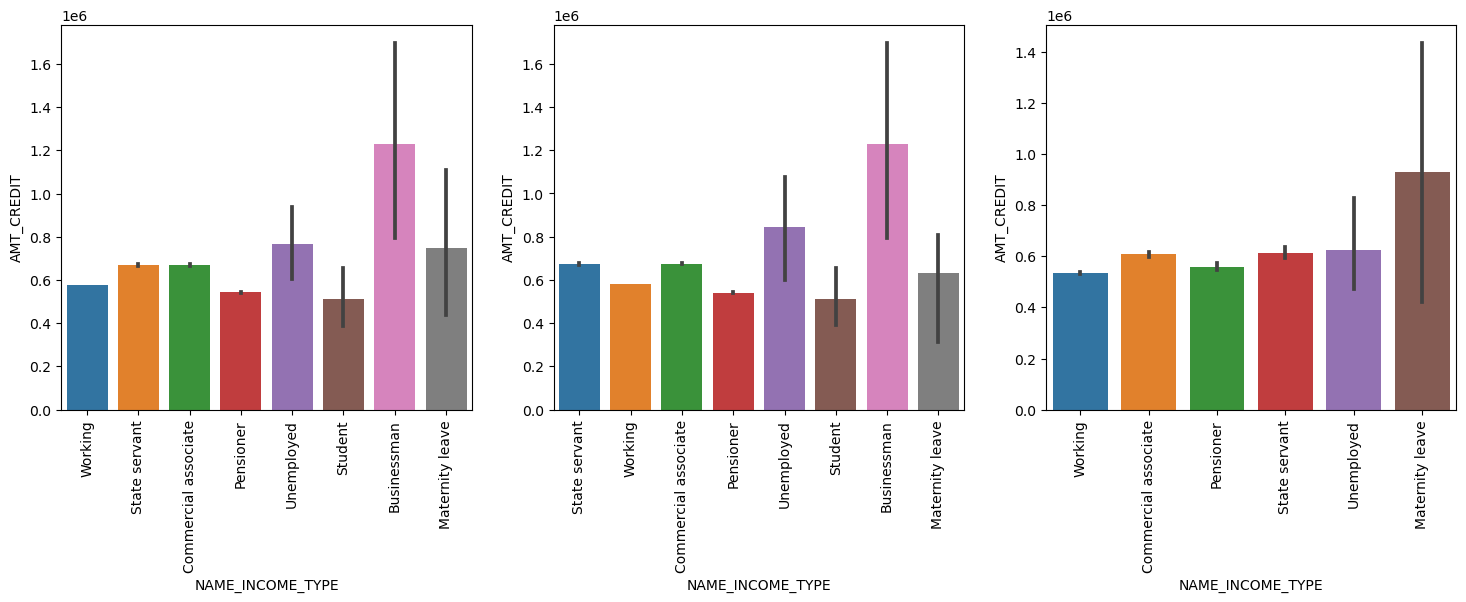

In [170]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.barplot(df_application_data,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.xticks(rotation=90)
plt.subplot(132)
sns.barplot(df_noprob,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.xticks(rotation=90)
plt.subplot(133)
sns.barplot(df_prob,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.xticks(rotation=90)

plt.show()

In [171]:
# Businessmen Apply for the largest loans.Also Businessman and Students have no problem repaying loans.In problematic group maternity leave individuals have the highest loan amount requests

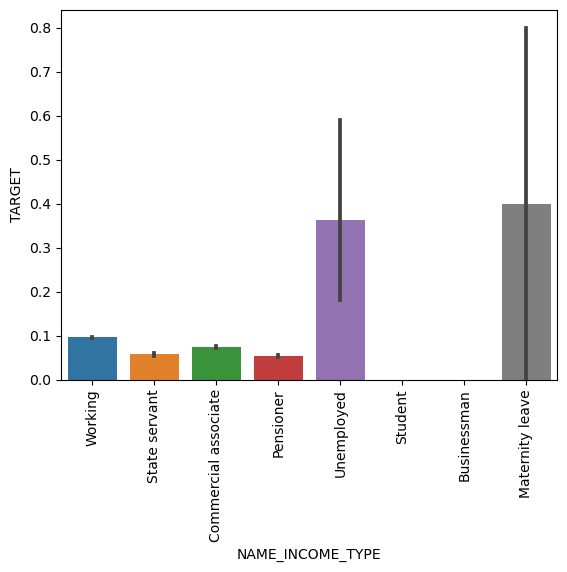

In [172]:
sns.barplot(df_application_data,x="NAME_INCOME_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [173]:
# We see that Maternity LEave and Unemployed People have the highest chanc es of default

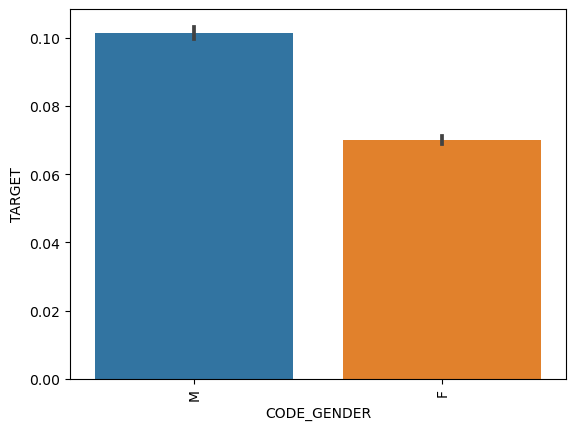

In [174]:
sns.barplot(df_application_data,x="CODE_GENDER",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [175]:
# Males have higher chance to default than females. Even though we found out thagt females identify for loans more.

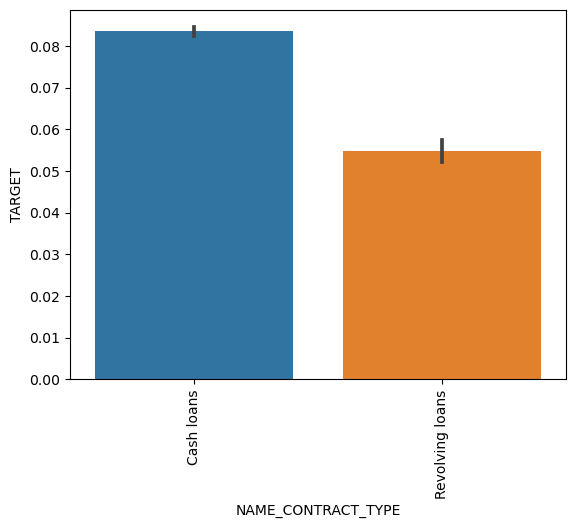

In [176]:
sns.barplot(df_application_data,x="NAME_CONTRACT_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [177]:
# Cash loans more chance to default than revolving loans

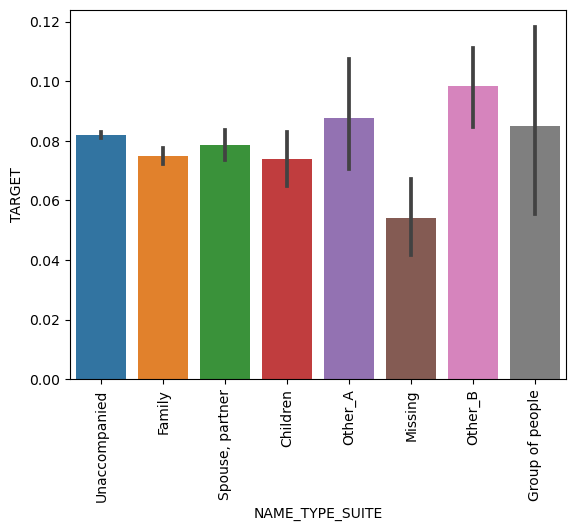

In [178]:
sns.barplot(df_application_data,x="NAME_TYPE_SUITE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [179]:
# Unaccompanied people have less chance to default than Accompanoed people.

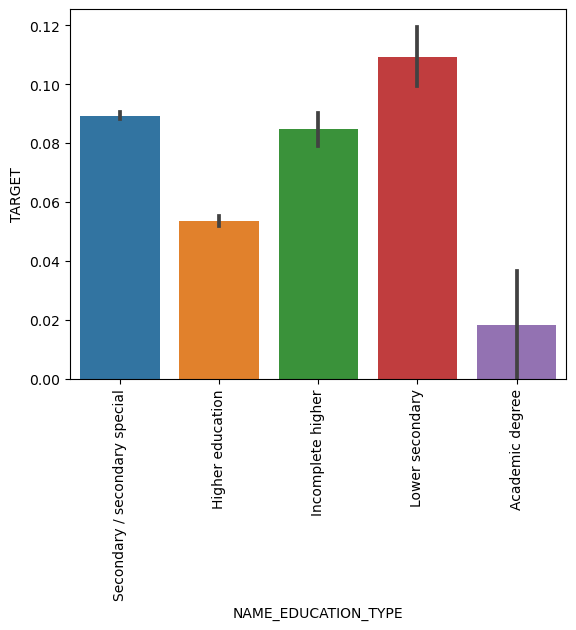

In [180]:
sns.barplot(df_application_data,x="NAME_EDUCATION_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [181]:
# Academic degress have the loest chance of default while lower secondary have the highest chance to default

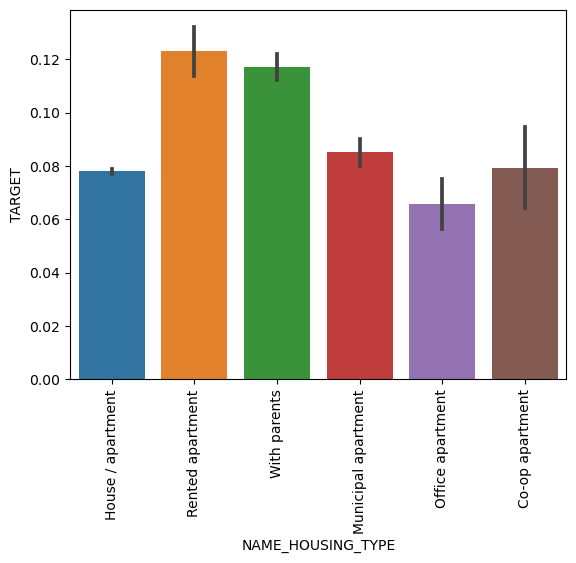

In [182]:
sns.barplot(df_application_data,x="NAME_HOUSING_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [183]:
# People living in Rented Apartments have the highest chance to default whereas Office Apartment has lowest chance

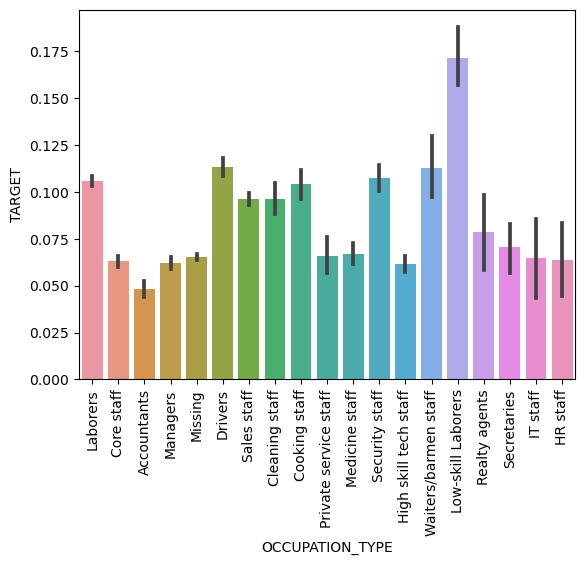

In [184]:
sns.barplot(df_application_data,x="OCCUPATION_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [185]:
# Low Skilled Labourer have highest default chance while Accountants have lowest default chance

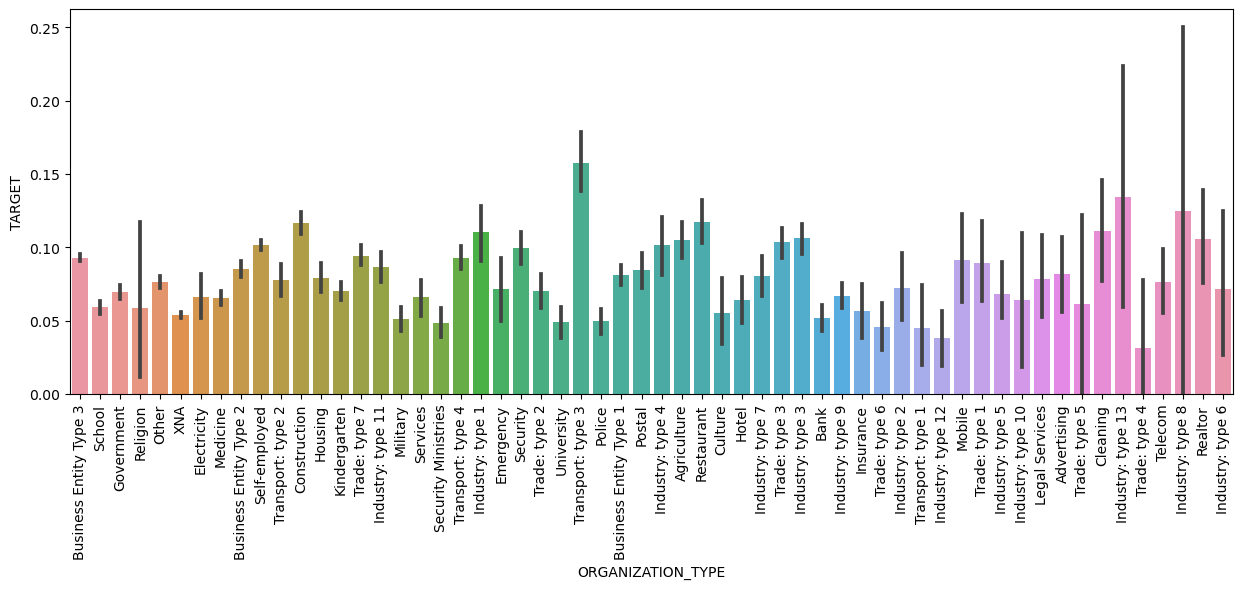

In [186]:
plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="ORGANIZATION_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [187]:
# Transport Type 3 Organization type has the highest chance to default

In [188]:
# Categorical vs Categorical

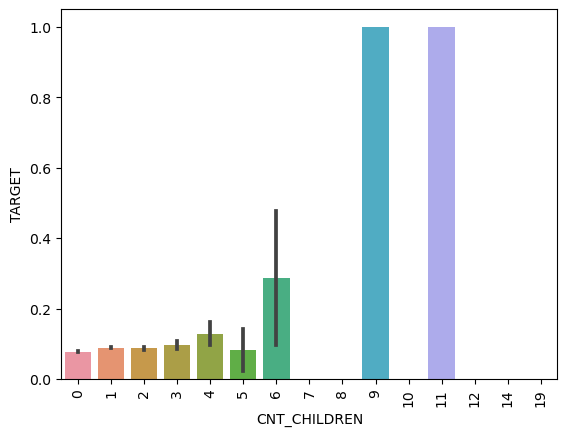

In [189]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="CNT_CHILDREN",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [190]:
# We see increased probability of default with high no. of children

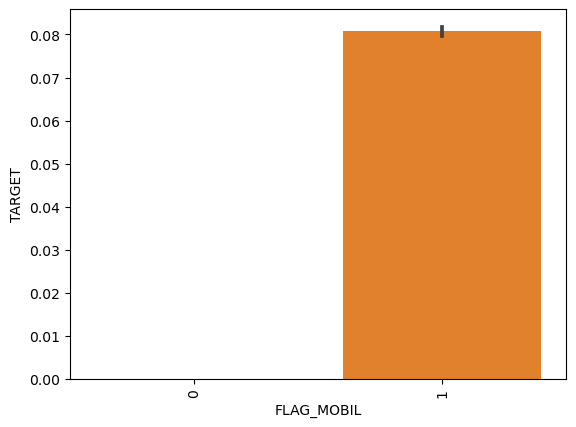

In [191]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="FLAG_MOBIL",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [192]:
df_application_data.FLAG_MOBIL.value_counts(normalize=True)

1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64

In [193]:
# Mobile no. are provided by most people so the above graph inconclusive to say mobile no providers are defaulting more

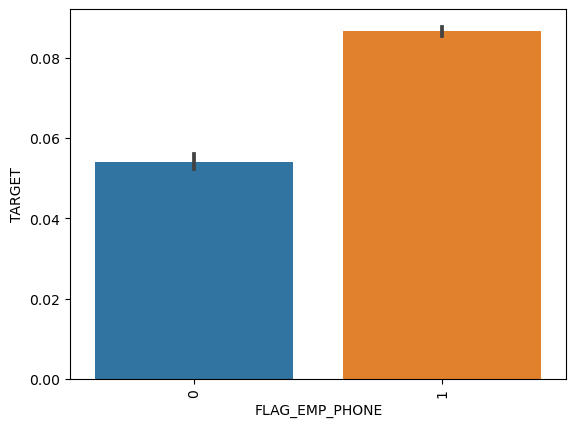

In [194]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="FLAG_EMP_PHONE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [195]:
# People whp are providing work phone no. are defaulting more

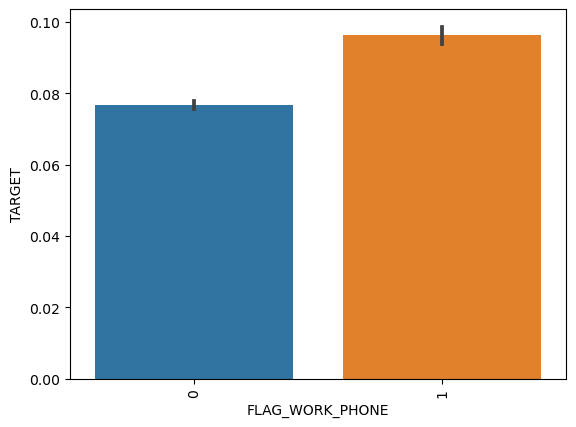

In [196]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="FLAG_WORK_PHONE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [197]:
# Home Phone Owners  have more chance to default 

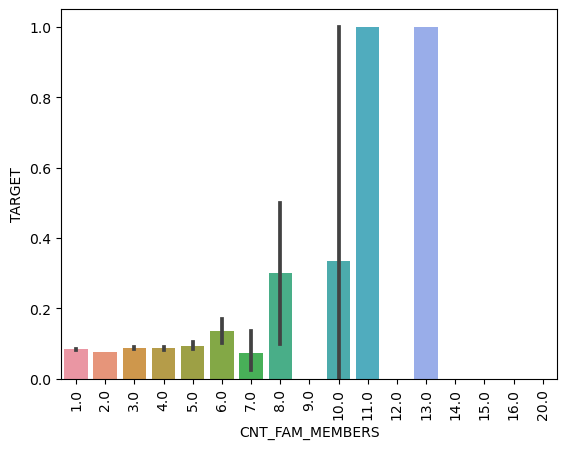

In [198]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="CNT_FAM_MEMBERS",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [199]:
# Similar to children count high family count leads to more loan defaults.

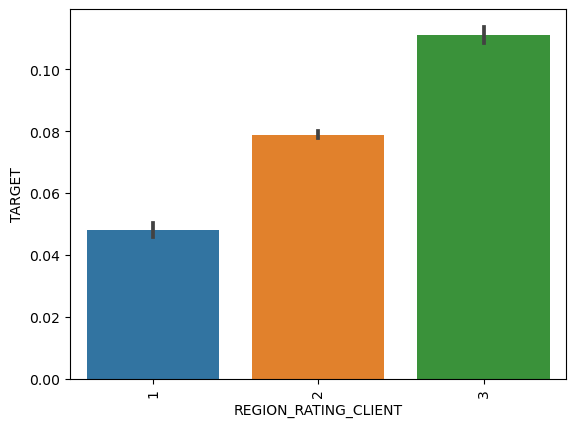

In [200]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="REGION_RATING_CLIENT",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [201]:
# Increasing Defaulting Trend with increase of Region rating 

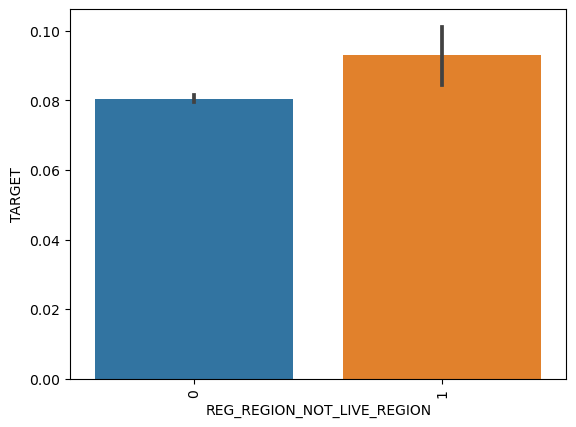

In [202]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="REG_REGION_NOT_LIVE_REGION",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [203]:
# If permanent adress does not match with contact adress there is more chance of default observed

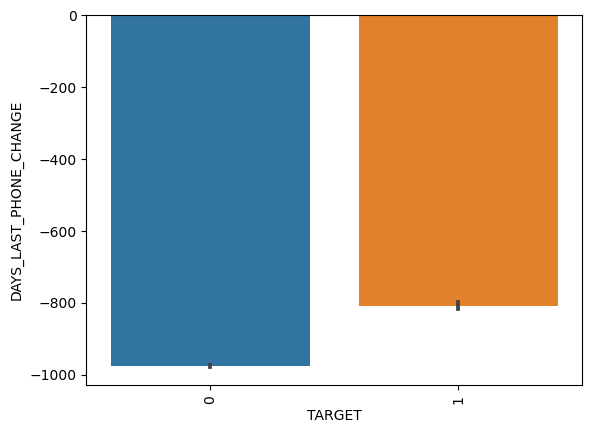

In [204]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="TARGET",y="DAYS_LAST_PHONE_CHANGE")
plt.xticks(rotation=90)
plt.show()

In [205]:
# Defaulters have changed their phones more recently on aveage

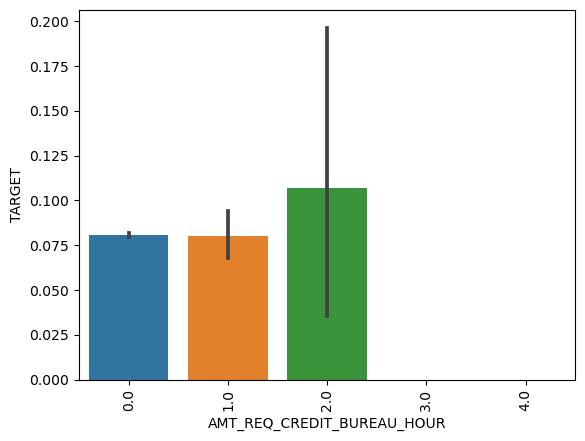

In [206]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="AMT_REQ_CREDIT_BUREAU_HOUR",y="TARGET")
plt.xticks(rotation=90)
plt.show()

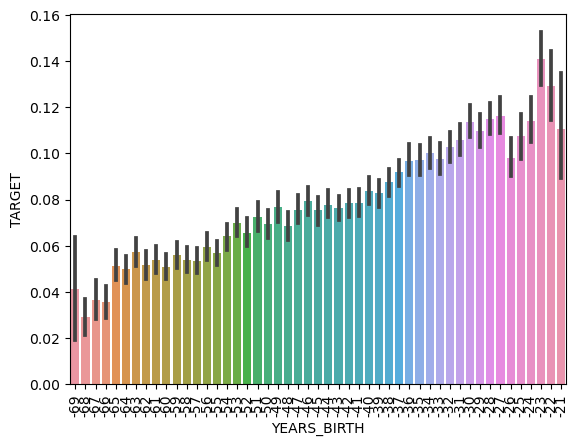

In [207]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="YEARS_BIRTH",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [208]:
# The more age the less is the chance to default

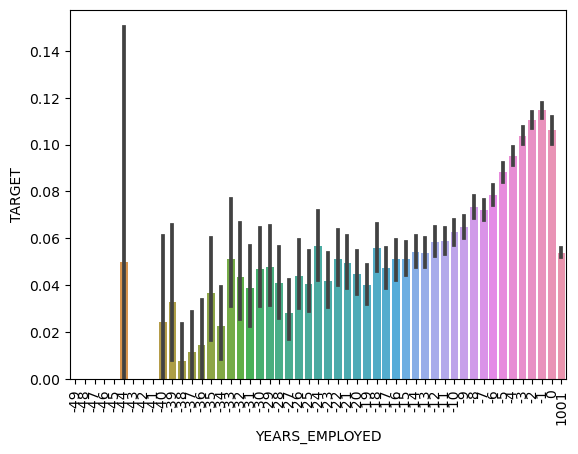

In [209]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="YEARS_EMPLOYED",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [210]:
# We observe that recently employed people have the highest chance to default on loans

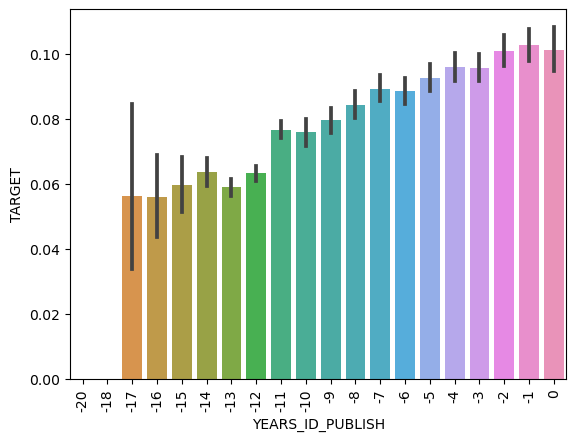

In [211]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="YEARS_ID_PUBLISH",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [212]:
# Recent ID Document change indicates more chance to default on loan

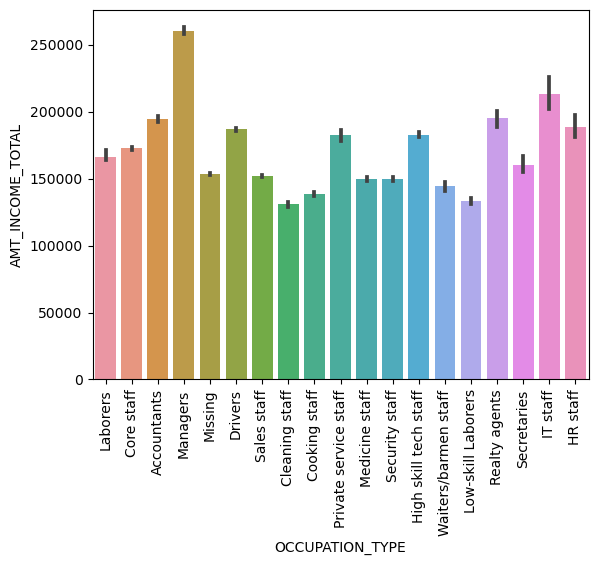

In [213]:
# plt.figure(figsize=(15,5))
sns.barplot(df_application_data,x="OCCUPATION_TYPE",y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.show()

In [214]:
# We see managers and IT Staff are the highest paid ppl

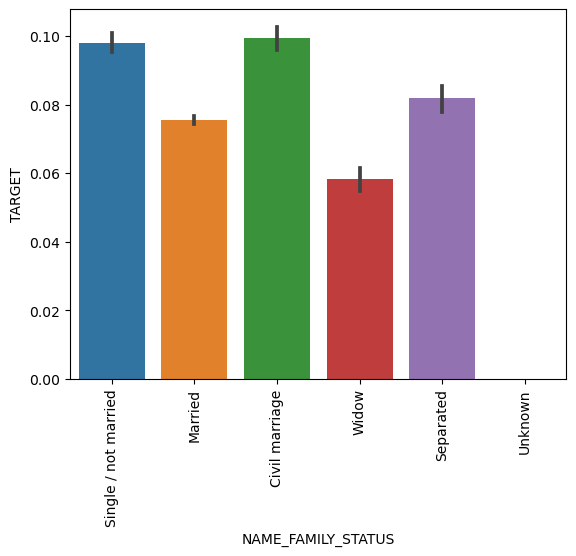

In [614]:
sns.barplot(df_application_data,x="NAME_FAMILY_STATUS",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Civil Marriage and Sigle People show the highest chance to default while widows have lowest chance to default.

# Multivariate Analysis

In [216]:
df_application_data.pivot_table(index="OCCUPATION_TYPE",columns="NAME_FAMILY_STATUS",values="TARGET")

NAME_FAMILY_STATUS     Civil marriage   Married  Separated  \
OCCUPATION_TYPE                                              
Accountants                  0.039370  0.046744   0.053352   
Cleaning staff               0.102612  0.096250   0.078652   
Cooking staff                0.120397  0.097944   0.084135   
Core staff                   0.077809  0.058064   0.057576   
Drivers                      0.146597  0.101009   0.145655   
HR staff                     0.136364  0.046832   0.065217   
High skill tech staff        0.079108  0.057012   0.061252   
IT staff                     0.095238  0.069536   0.000000   
Laborers                     0.129185  0.096642   0.109462   
Low-skill Laborers           0.161094  0.165426   0.164835   
Managers                     0.076744  0.057754   0.068750   
Medicine staff               0.097387  0.063981   0.060514   
Missing                      0.080831  0.061559   0.068443   
Private service staff        0.076159  0.059642   0.105263   
Realty agents                0.025316  0.081498   0.115385   
Sales staff                  0.103650  0.093878   0.097902   
Secretaries                  0.086957  0.078292   0.000000   
Security staff               0.124665  0.096394   0.118834   
Waiters/barmen staff         0.081633  0.122511   0.070000   

NAME_FAMILY_STATUS     Single / not married  Unknown     Widow  
OCCUPATION_TYPE                                                 
Accountants                        0.058704      0.0  0.044521  
Cleaning staff                     0.122066      NaN  0.067265  
Cooking staff                      0.144550      NaN  0.059859  
Core staff                         0.080491      NaN  0.038880  
Drivers                            0.147986      NaN  0.153153  
HR staff                           0.066667      NaN  0.200000  
High skill tech staff              0.072008      NaN  0.048327  
IT staff                           0.060000      NaN  0.000000  
Laborers                           0.132301      NaN  0.069250  
Low-skill Laborers                 0.204545      NaN  0.041667  
Managers                           0.077488      0.0  0.043290  
Medicine staff                     0.073257      NaN  0.038554  
Missing                            0.077041      NaN  0.056668  
Private service staff              0.061896      NaN  0.034483  
Realty agents                      0.093960      NaN  0.000000  
Sales staff                        0.101770      NaN  0.077991  
Secretaries                        0.059633      NaN  0.038462  
Security staff                     0.140472      NaN  0.086486  
Waiters/barmen staff               0.131653      NaN  0.047619

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='OCCUPATION_TYPE'>

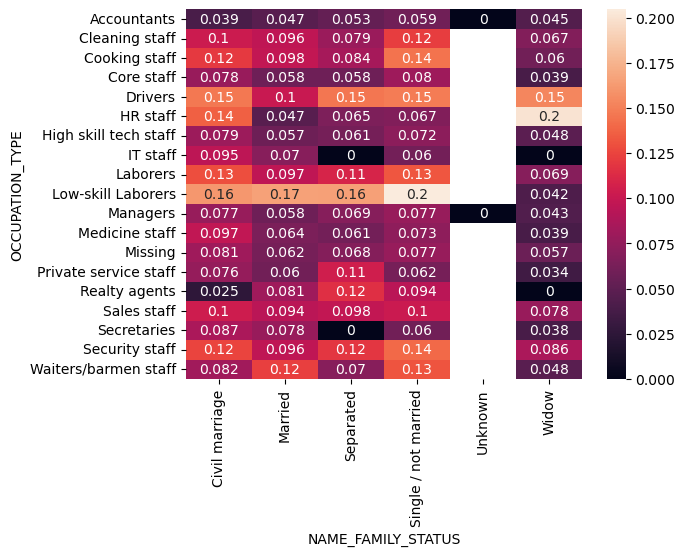

In [217]:
sns.heatmap(df_application_data.pivot_table(index="OCCUPATION_TYPE",columns="NAME_FAMILY_STATUS",values="TARGET"),annot=True)

In [218]:
# Widowed Hrs,Widow Drivers,Single Drivers,Single Security Staff,Single Labourers,Single Cooking and Cleaning Staff,Seperated Labouerers,Seperted Drivers
# Married Low Skilled Labourers,Married Waiters,Civil Marriage Security Staff, Civil Marriage Labourers and  Civil Marriage HR Staff have difficulty in payments

# Accountansts,Core Staff, High Skill tech Staff and IT Staff they have comparatively lower default rates

<Axes: xlabel='CODE_GENDER', ylabel='OCCUPATION_TYPE'>

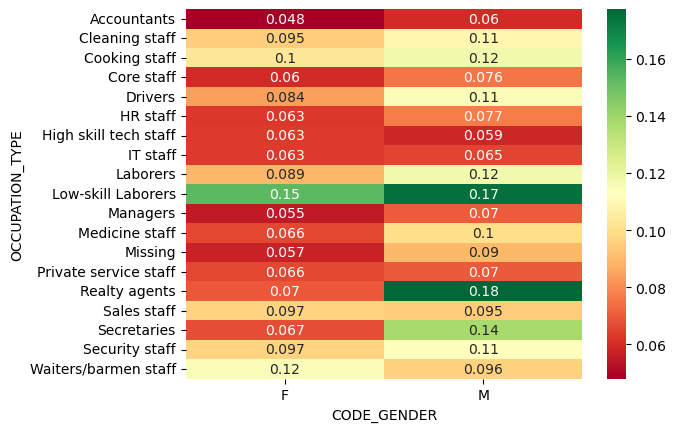

In [219]:
sns.heatmap(df_application_data.pivot_table(index="OCCUPATION_TYPE",columns="CODE_GENDER",values="TARGET"),annot=True,cmap="RdYlGn")

In [220]:
# Low Skilled Male and Female Labourers,Male Reality Agents,Male Secretaries have highets chances of default

# Female and Male Accountats,Female Managers,Female Core Staff groups have lowest chances to default

<Axes: xlabel='ORGANIZATION_TYPE', ylabel='OCCUPATION_TYPE'>

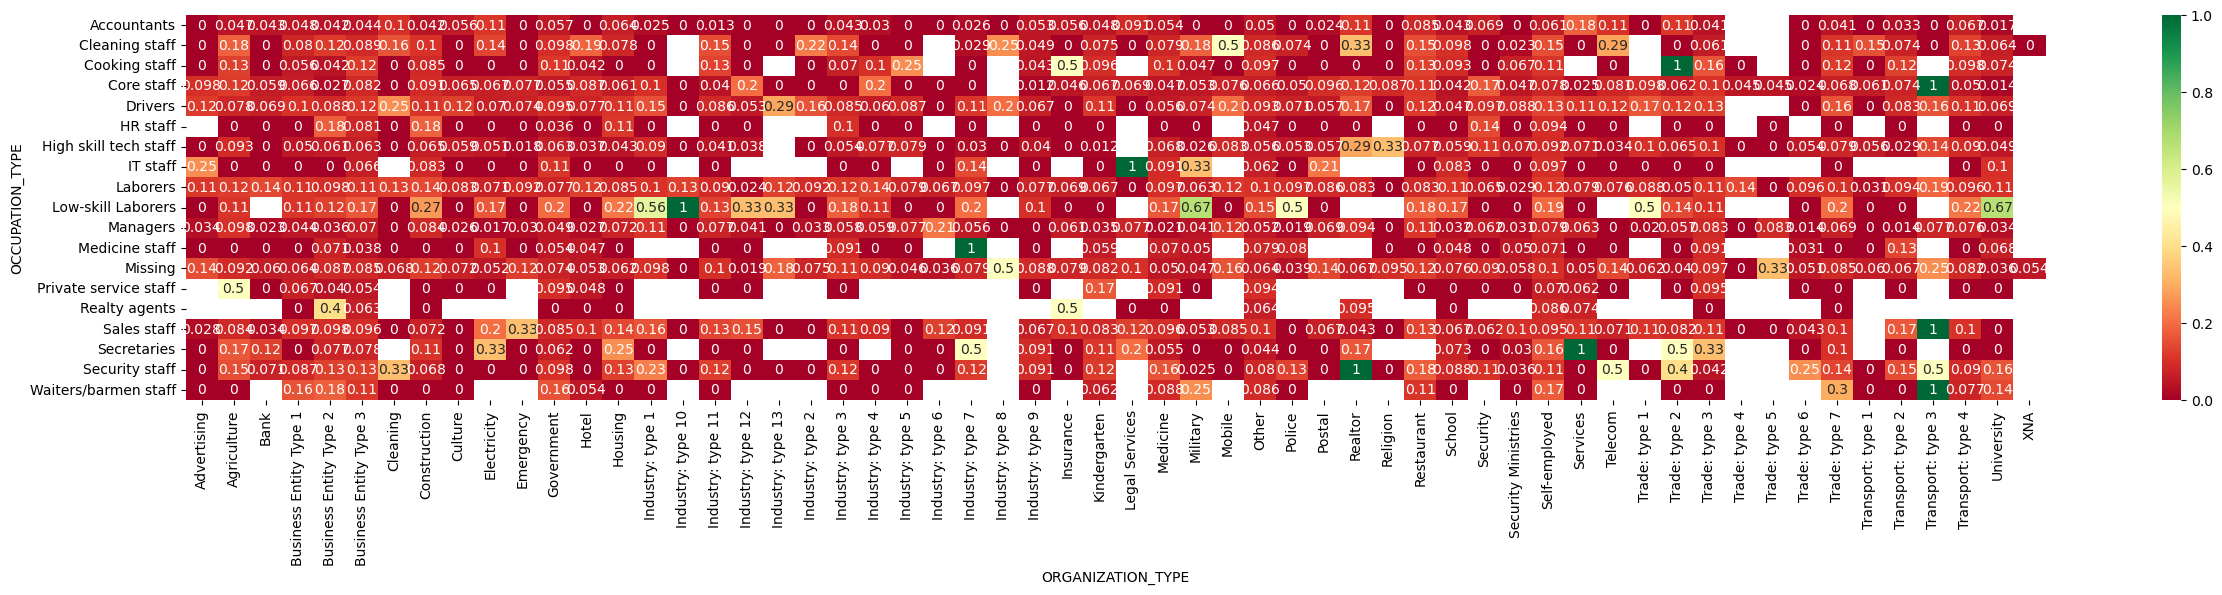

In [221]:
plt.figure(figsize=(30,5))
sns.heatmap(df_application_data.pivot_table(index="OCCUPATION_TYPE",columns="ORGANIZATION_TYPE",values="TARGET"),annot=True,cmap="RdYlGn")

In [222]:
# Low Skilled Labourers in Industry Type 10,Medicine Staff Industry Type 7,It Staff in Legal Services, Security Staff in Realtor, Secretaries in Services,
# Cooking Staff in Trade Type 2,Core Staff,Sales Stuff, and Waiters in Transport Type 3are showing almost a 100percent chance to default.
# Verify with amount of data points available in these cases to check if they are one off cases or substantial data points available.

# Other Subgroups have also shown higher default chances like Private Service Staff in Agriculture,Reality Agents in Business Entity Type 2 etc.

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='NAME_EDUCATION_TYPE'>

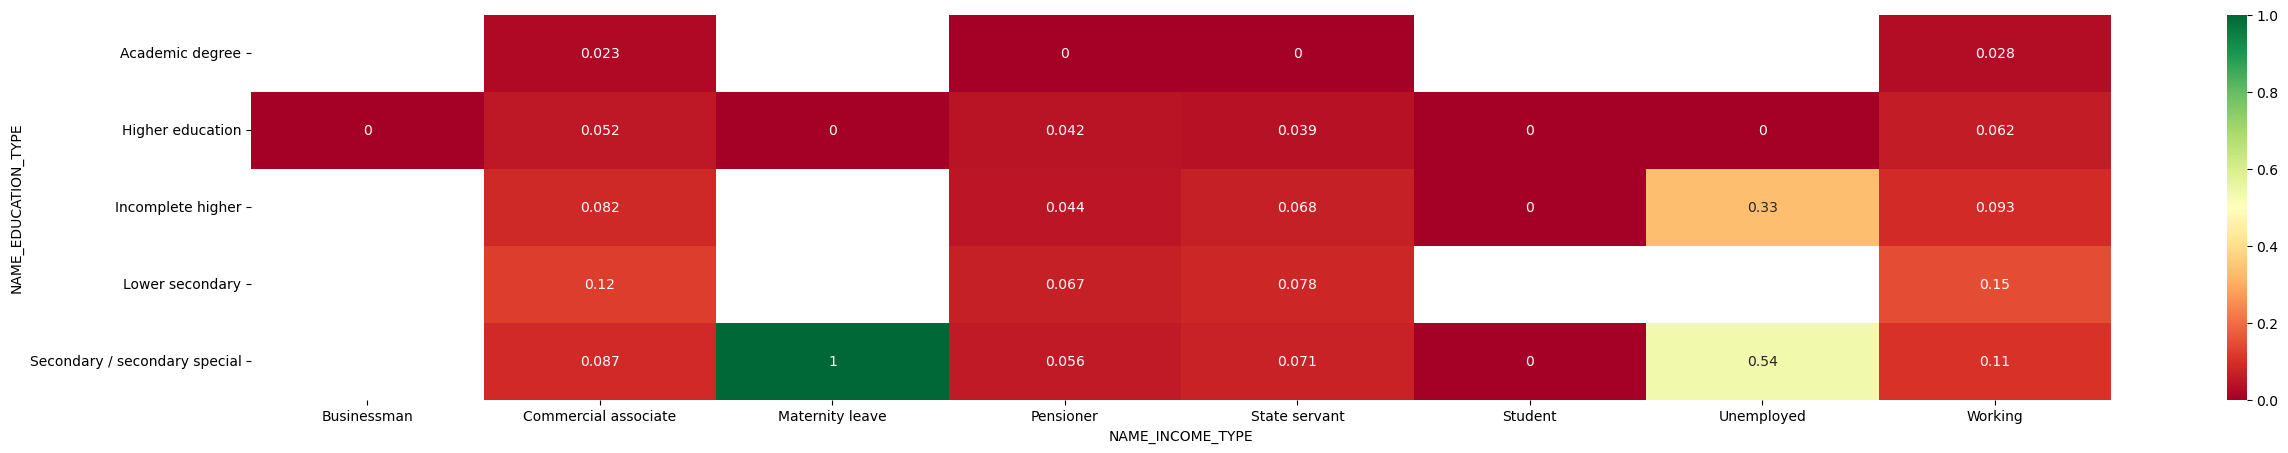

In [223]:
plt.figure(figsize=(30,5))
sns.heatmap(df_application_data.pivot_table(index="NAME_EDUCATION_TYPE",columns="NAME_INCOME_TYPE",values="TARGET"),annot=True,cmap="RdYlGn")

In [224]:
# Unemployed who have secondar or incomplete higher education have a high chance to default.
# Secondary education on maternity leaves have highest chances to default

# Higher Education and Academic Degree groups have shown lower defaults 

# Previous Application Analysis

# Load Dataset

In [225]:
df_prev_application_data=pd.read_csv("previous_application.csv")

In [226]:
df_prev_application_data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1048570     2230795      255000     Consumer loans    50978.475   
1048571     1823303      158245         Cash loans          NaN   
1048572     1730537      429268     Consumer loans     5793.120   
1048573     2100360      389043     Consumer loans     4775.355   
1048574     1283481      250078     Consumer loans     6617.925   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1048570         210960.0    189864.0           21096.0         210960.0   
1048571              0.0         0.0               NaN              NaN   
1048572          38070.0     36526.5            3807.0          38070.0   
1048573          35356.5     30109.5            7110.0          35356.5   
1048574          44986.5     23229.0           22500.0          44986.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1048570                     SUNDAY                       15   
1048571                    TUESDAY                       18   
1048572                     SUNDAY                       12   
1048573                   SATURDAY                       18   
1048574                    TUESDAY                       11   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1048570                           Y                       1   
1048571                           Y                       1   
1048572                           Y                       1   
1048573                           Y                       1   
1048574                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1048570           0.108909                    NaN                       NaN   
1048571                NaN                    NaN                       NaN   
1048572           0.102797                    NaN                       NaN   

# Check Basic Details

In [227]:
df_prev_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [228]:
# Unable to see all details.Lets change pandas display options
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)

In [229]:
df_prev_application_data.describe()

SK_ID_PREV    SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  1.048575e+06  1.048575e+06  815566.000000     1.048575e+06   
mean   1.922775e+06  2.784367e+05   15891.265151     1.742698e+05   
std    5.329366e+05  1.028569e+05   14745.557438     2.910789e+05   
min    1.000001e+06  1.000010e+05       0.000000     0.000000e+00   
25%    1.460642e+06  1.893860e+05    6301.350000     1.890000e+04   
50%    1.923419e+06  2.788100e+05   11250.000000     7.081650e+04   
75%    2.384448e+06  3.677445e+05   20523.003750     1.800000e+05   
max    2.845382e+06  4.562550e+05  418058.145000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.048575e+06      4.891790e+05     8.076100e+05   
mean   1.950000e+05      6.700778e+03     2.262892e+05   
std    3.169407e+05      2.078570e+04     3.134490e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.427750e+04      0.000000e+00     5.058000e+04   
50%    8.025300e+04      1.624500e+03     1.115116e+05   
75%    2.152395e+05      7.749000e+03     2.295000e+05   
max    6.905160e+06      2.150100e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.048575e+06            1.048575e+06      489179.000000   
mean              1.248486e+01            9.964123e-01           0.079619   
std               3.333140e+00            5.979011e-02           0.107882   
min               0.000000e+00            0.000000e+00          -0.000014   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051062   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           0.989740   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            3721.000000               3721.000000   1.048575e+06   
mean                0.187177                  0.774922  -8.820381e+02   
std                 0.083343                  0.099514   7.792649e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.303000e+03   
50%                 0.189122                  0.835095  -5.830000e+02   
75%                 0.193330                  0.852537  -2.810000e+02   
max                 1.000000                  1.000000  -2.000000e+00   

       SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.048575e+06  815569.000000       627867.000000   627867.000000   
mean       3.183904e+02      15.995639       342387.346201    13833.802031   
std        7.996734e+03      14.508109        88595.441587    72460.126454   
min       -1.000000e+00       0.000000        -2921.000000    -2892.000000   
25%       -1.000000e+00       6.000000       365243.000000    -1626.000000   
50%        4.000000e+00      12.000000       365243.000000     -830.000000   
75%        8.500000e+01      24.000000       365243.000000     -410.000000   
max        4.000000e+06      84.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              627867.000000  627867.000000     627867.000000   
mean                33614.930898   76591.061435      81985.701661   
std                106643.960780  149653.053854     153298.887247   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1241.000000   -1313.000000      -1269.000000   
50%                  -361.000000    -537.000000       -498.000000   
75%                   128.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              627867.000000  
mean                    0.331530  
std                     0.470764  
min                     0.000000  
25%         

# Check Variable type Distribution

In [230]:
# Categorical Variables
list(df_prev_application_data.select_dtypes("object").columns)

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [231]:
list_categorical=list(df_prev_application_data.select_dtypes("object").columns)

In [232]:
list(df_prev_application_data.select_dtypes(["int64","float64"]).columns)

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [233]:
list_numerical=list(df_prev_application_data.select_dtypes(["int64","float64"]).columns)

In [234]:
# Check if data values have been registered as incorrect data types(Like numbers registered  as strings)
# Check above object dataset and also general inspection on below
df_prev_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

# Missing Value Check

In [235]:
(df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.645137
RATE_INTEREST_PRIMARY          99.645137
RATE_DOWN_PAYMENT              53.348211
AMT_DOWN_PAYMENT               53.348211
NAME_TYPE_SUITE                49.127626
NFLAG_INSURED_ON_APPROVAL      40.121880
DAYS_FIRST_DRAWING             40.121880
DAYS_FIRST_DUE                 40.121880
DAYS_LAST_DUE_1ST_VERSION      40.121880
DAYS_LAST_DUE                  40.121880
DAYS_TERMINATION               40.121880
AMT_GOODS_PRICE                22.980235
AMT_ANNUITY                    22.221491
CNT_PAYMENT                    22.221205
PRODUCT_COMBINATION             0.021362
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REAS

<Axes: ylabel='Frequency'>

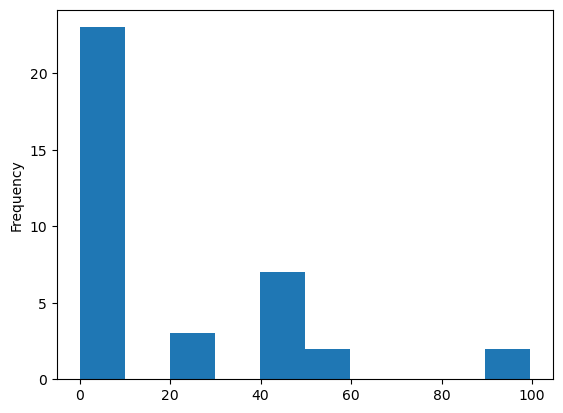

In [236]:
(df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100).sort_values(ascending=False).plot.hist()

In [237]:
# Based on above distribution of no of missing values lets check threshold of no. of columns with missing values more than 35 and 35 or less
(df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100)>35

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    False
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_DOWN_PAYMENT                True
AMT_GOODS_PRICE                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
RATE_DOWN_PAYMENT               True
RATE_INTEREST_PRIMARY           True
RATE_INTEREST_PRIVILEGED        True
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                 True
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
N

In [238]:
len(pd.Series(df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100)[pd.Series(df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100)>35])

11

In [239]:
# Lets drop these columns as it is not appropriate to imputed with so many missing values in play

In [240]:
((df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100)>35)[(df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100)>35].index.to_list()

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [241]:
list_missing=((df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100)>35)[(df_prev_application_data.isna().sum()/df_prev_application_data.shape[0]*100)>35].index.to_list()

In [242]:
type(list_missing)

list

In [243]:
len(list_missing)

11

In [244]:
df_prev_application_data.drop(list_missing,axis=1,inplace=True)

In [245]:
df_prev_application_data.isnull().values.any()

True

In [246]:
df_prev_application_data.isnull().values.sum()

707204

In [247]:
(df_prev_application_data.isnull().sum()/len(df_prev_application_data)*100).sort_values(ascending=False)

AMT_GOODS_PRICE                22.980235
AMT_ANNUITY                    22.221491
CNT_PAYMENT                    22.221205
PRODUCT_COMBINATION             0.021362
NAME_PAYMENT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_CREDIT                      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [248]:
lst_missing_2=list(((df_prev_application_data.isnull().sum()/len(df_prev_application_data)*100)>0)[(df_prev_application_data.isnull().sum()/len(df_prev_application_data)*100)>0].index)
lst_missing_2

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION']

In [249]:
# We will do imputations based on type of variable

In [250]:
list_categorical_updated=[]
list_numerical_updated=[]

for i in lst_missing_2:
    if i in list_categorical:
        list_categorical_updated.append(i)
    else:
        list_numerical_updated.append(i)

In [251]:
 list_categorical_updated

['PRODUCT_COMBINATION']

In [252]:
list_numerical_updated

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

In [253]:
df_prev_application_data.PRODUCT_COMBINATION.value_counts(dropna=False)

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
NaN                                  224
Name: PRODUCT_COMBINATION, dtype: int64

In [254]:
# For categorical variables we will impute missing since not apt to replace with other missing due to high amount of nan values which may bias the dataset
df_prev_application_data.PRODUCT_COMBINATION=df_prev_application_data.PRODUCT_COMBINATION.fillna("Missing")
df_prev_application_data.PRODUCT_COMBINATION.value_counts()

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
Missing                              224
Name: PRODUCT_COMBINATION, dtype: int64

In [255]:
# for numericcal values we are imputing my median values which in general is a better indicator of central tendency.
for i in list_numerical_updated:
    df_prev_application_data[i]=df_prev_application_data[i].fillna(df_prev_application_data[i].median())

In [256]:
df_prev_application_data.isna().sum()
# We see now we have no missing values

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

# Check Invalid Values

In [257]:
for i in df_prev_application_data.select_dtypes("object").columns:
    print(df_prev_application_data[i].value_counts())

Cash loans         465861
Consumer loans     461049
Revolving loans    121441
XNA                   224
Name: NAME_CONTRACT_TYPE, dtype: int64
TUESDAY      160290
WEDNESDAY    159767
MONDAY       159178
FRIDAY       158147
THURSDAY     156021
SATURDAY     151533
SUNDAY       103639
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Y    1043203
N       5372
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
XAP                                 582714
XNA                                 422517
Repairs                              14767
Other                                 9664
Urgent needs                          5309
Buying a used car                     1784
Building a house or an annex          1682
Everyday expenses                     1487
Medicine                              1402
Payments on other loans               1210
Education                              975
Journey                                745
Purchase of electronic equipment       644
Buying a new car                     

In [258]:
# We see lot of XNA and XAP which indicates Data Not Available and Not Applicable

In [259]:
df_prev_application_data.select_dtypes(["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [260]:
for i in df_prev_application_data.select_dtypes(["int64","float64"]).columns:
    print(df_prev_application_data[i].value_counts())

2030495    1
1064768    1
1606098    1
2229750    1
1933024    1
          ..
2553578    1
1811976    1
2618881    1
2127935    1
1283481    1
Name: SK_ID_PREV, Length: 1048575, dtype: int64
265681    52
173680    47
187868    46
235163    43
133023    42
          ..
429792     1
251299     1
352742     1
387710     1
287184     1
Name: SK_ID_CURR, Length: 305828, dtype: int64
11250.000    241780
2250.000      20068
6750.000       8454
9000.000       7785
22500.000      7347
              ...  
2749.860          1
9694.125          1
12661.965         1
12181.275         1
50978.475         1
Name: AMT_ANNUITY, Length: 282291, dtype: int64
0.000         245251
45000.000      30036
225000.000     27212
135000.000     25532
450000.000     24138
               ...  
223344.000         1
253178.595         1
397579.500         1
124866.630         1
319306.500         1
Name: AMT_APPLICATION, Length: 75635, dtype: int64
0.0         210515
45000.0      22041
225000.0     13194
450000.0    

In [261]:
# By visual inspection we dint find anomalies in the numerical columns except the days since columns which show negative values 
# but we assume that is the format in which data was recorded so no issue there.

# Feature Engineering

In [262]:
# Lets Create new features to make better sense of the datasets

In [263]:
# Convert the Days Columns to years for better reference and create new columns

In [264]:
df_prev_application_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [265]:
df_prev_application_data['YEARS_DECISION']=df_prev_application_data['DAYS_DECISION'].apply(lambda x:round(x/365))

In [266]:
df_prev_application_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'YEARS_DECISION'],
      dtype='object')

# Univariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1179d9eeeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1179d9de430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1179d9eec10>],
 'medians': [<matplotlib.lines.Line2D at 0x1179d9de970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1179d9dec10>],
 'means': []}

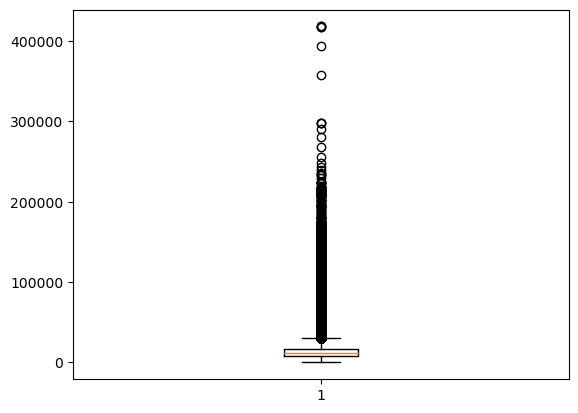

In [267]:
plt.boxplot(df_prev_application_data.AMT_ANNUITY)

In [268]:
# Lets create functions to do univariate analysis ina better way since otherwise we have to repeat many times

In [269]:
def box_dist(Variable):
    plt.subplot(1,2,1)
    plt.boxplot(df_prev_application_data[Variable])

    # plt.subplot(2,2,2)
    # plt.boxplot(df_prob[Variable])
    # plt.show()
    
    plt.subplot(1,2,2)
    sns.distplot(df_prev_application_data[Variable])

    # plt.subplot(2,2,4)
    # sns.distplot(df_prob[Variable])
    plt.show()

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\276377946.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_prev_application_data[Variable])


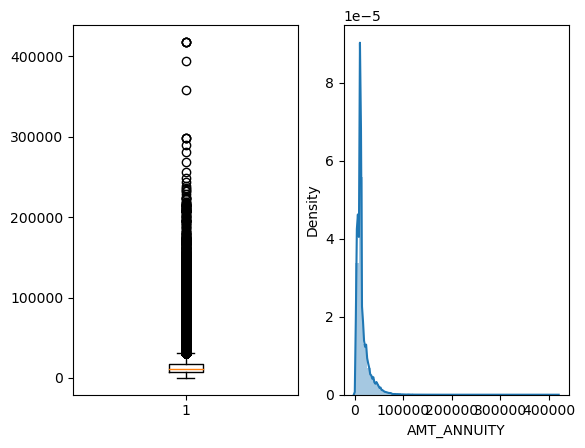

In [270]:
box_dist("AMT_ANNUITY")

In [271]:
# We see a right skewed graph indicating very high annuity amounts are increasingly rare and mostly outliers.

In [272]:
def descriptive(Variable):
    print(df_prev_application_data[Variable].describe())
    # print(df_prob[Variable].describe())

In [273]:
descriptive('AMT_ANNUITY')

count    1.048575e+06
mean     1.485991e+04
std      1.314679e+04
min      0.000000e+00
25%      7.506765e+03
50%      1.125000e+04
75%      1.673721e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


In [274]:
def outlier_detect(data,Variable):
    q1=np.quantile(data[Variable],0.25)
    q3=np.quantile(data[Variable],0.75)
    iqr=q3-q1
    print((q1-(1.5*iqr)),(q3+(1.5*iqr)))

In [275]:
outlier_detect(df_prev_application_data,"AMT_CREDIT")

-262165.5 501682.5


In [276]:
# Credited Amounts are outliers above 501682

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\276377946.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_prev_application_data[Variable])


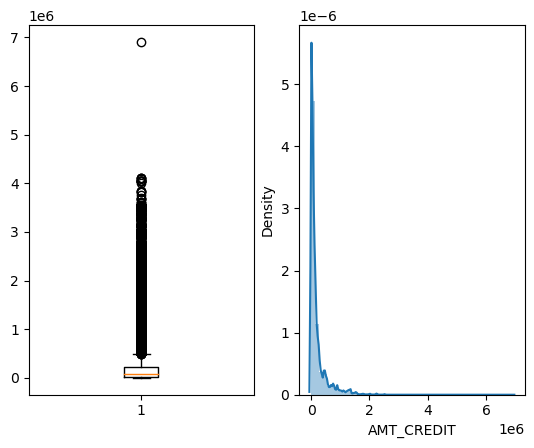

None
count    1.048575e+06
mean     1.950000e+05
std      3.169407e+05
min      0.000000e+00
25%      2.427750e+04
50%      8.025300e+04
75%      2.152395e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64
None
-262165.5 501682.5
None


In [277]:
print(box_dist("AMT_CREDIT"))
print(descriptive("AMT_CREDIT"))
print(outlier_detect(df_prev_application_data,"AMT_CREDIT"))

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\276377946.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_prev_application_data[Variable])


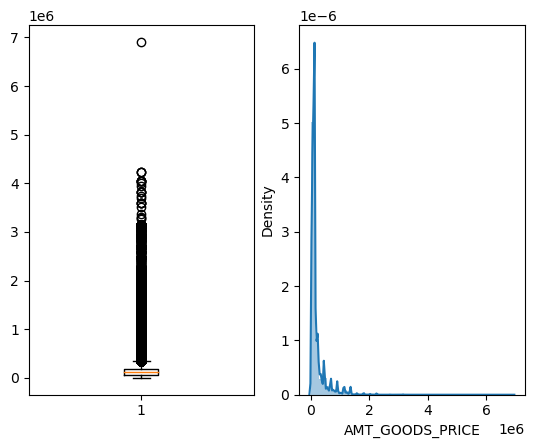

None
count    1.048575e+06
mean     1.999131e+05
std      2.792916e+05
min      0.000000e+00
25%      6.745500e+04
50%      1.115116e+05
75%      1.800000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64
None
-101362.5 348817.5
None


In [278]:
print(box_dist("AMT_GOODS_PRICE"))
print(descriptive("AMT_GOODS_PRICE"))
print(outlier_detect(df_prev_application_data,"AMT_GOODS_PRICE"))

In [279]:
# Goods Price for wich the client asked loan for are outlier above 348817

In [280]:
def outlier_check(Variable):
    print(box_dist(Variable))
    print(descriptive(Variable))
    print(outlier_detect(df_prev_application_data,Variable))

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\276377946.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_prev_application_data[Variable])


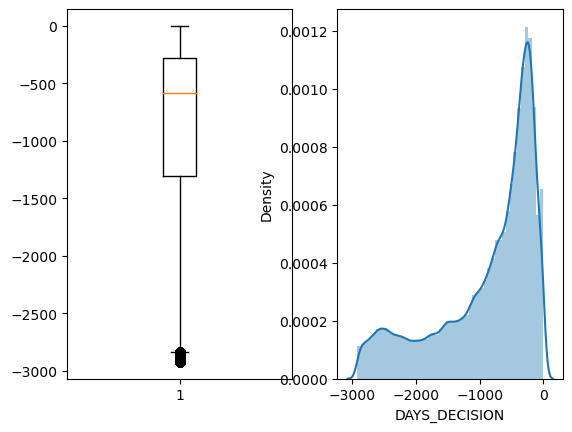

None
count    1.048575e+06
mean    -8.820381e+02
std      7.792649e+02
min     -2.922000e+03
25%     -1.303000e+03
50%     -5.830000e+02
75%     -2.810000e+02
max     -2.000000e+00
Name: DAYS_DECISION, dtype: float64
None
-2836.0 1252.0
None


In [281]:
outlier_check("DAYS_DECISION")

C:\Users\antar\AppData\Local\Temp\ipykernel_6448\276377946.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_prev_application_data[Variable])


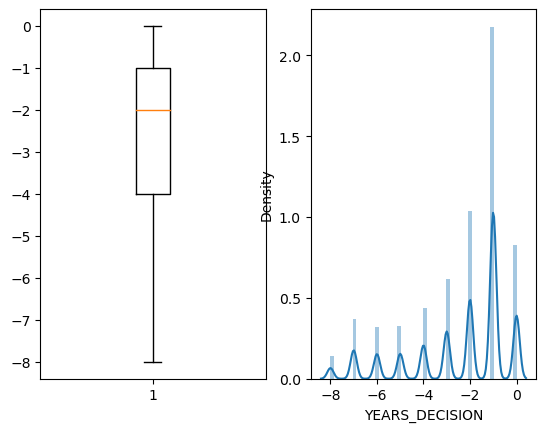

None
count    1.048575e+06
mean    -2.419789e+00
std      2.158692e+00
min     -8.000000e+00
25%     -4.000000e+00
50%     -2.000000e+00
75%     -1.000000e+00
max      0.000000e+00
Name: YEARS_DECISION, dtype: float64
None
-8.5 3.5
None


In [282]:
outlier_check("YEARS_DECISION")

In [283]:
# Differences in Years between Applications are around 2 years mostly with more than 8.5 years old being outliers

# Categorical Variables Check

In [284]:
df_prev_application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         44.428009
Consumer loans     43.969101
Revolving loans    11.581527
XNA                 0.021362
Name: NAME_CONTRACT_TYPE, dtype: float64

<Axes: >

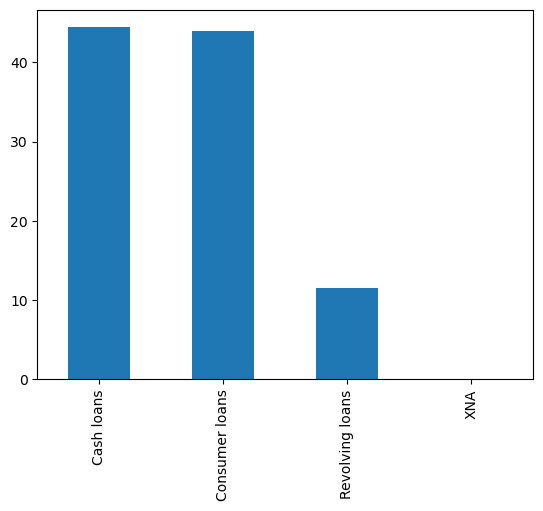

In [285]:
(df_prev_application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.bar()

<Axes: ylabel='NAME_CONTRACT_TYPE'>

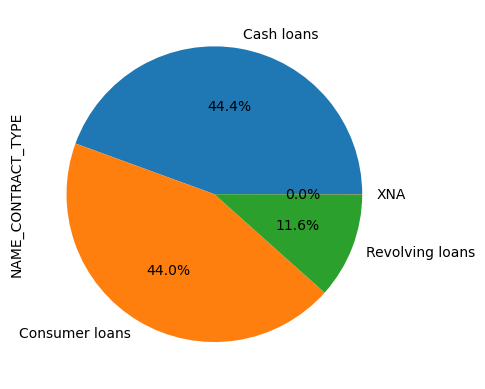

In [286]:
(df_prev_application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [287]:
# We see how Cash Loans and Consumer Loans are dominating

In [289]:
df_prev_application_data.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [290]:
df_prev_application_data.select_dtypes(["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'YEARS_DECISION'],
      dtype='object')

In [291]:
df_prev_application_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100

XAP                                 55.571991
XNA                                 40.294400
Repairs                              1.408292
Other                                0.921632
Urgent needs                         0.506306
Buying a used car                    0.170136
Building a house or an annex         0.160408
Everyday expenses                    0.141812
Medicine                             0.133705
Payments on other loans              0.115395
Education                            0.092983
Journey                              0.071049
Purchase of electronic equipment     0.061417
Buying a new car                     0.060749
Wedding / gift / holiday             0.056648
Buying a home                        0.052071
Car repairs                          0.047016
Furniture                            0.045300
Buying a holiday home / land         0.031853
Business development                 0.024223
Gasification / water supply          0.019360
Buying a garage                   

<Axes: ylabel='NAME_CASH_LOAN_PURPOSE'>

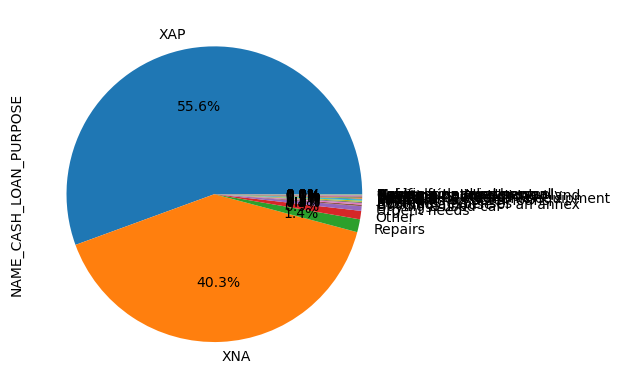

In [292]:
(df_prev_application_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [293]:
# Purpose of cashloans are mostly XAP and XNA and thus mostly not applicable or unknown

Approved        62.225973
Canceled        18.809432
Refused         17.364805
Unused offer     1.599790
Name: NAME_CONTRACT_STATUS, dtype: float64


<Axes: ylabel='NAME_CONTRACT_STATUS'>

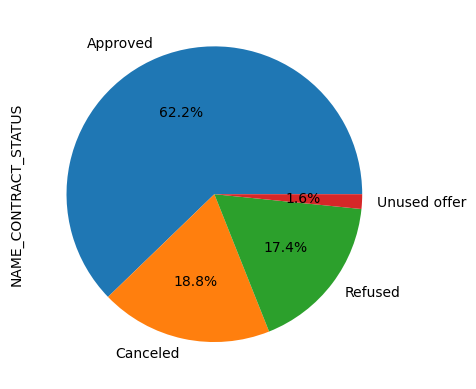

In [294]:
print(df_prev_application_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100)
(df_prev_application_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [295]:
# We see that most previous loan applications were approved previously.

Cash through the bank                        62.046492
XNA                                          37.389886
Non-cash from your account                    0.499058
Cashless from the account of the employer     0.064564
Name: NAME_PAYMENT_TYPE, dtype: float64


<Axes: ylabel='NAME_PAYMENT_TYPE'>

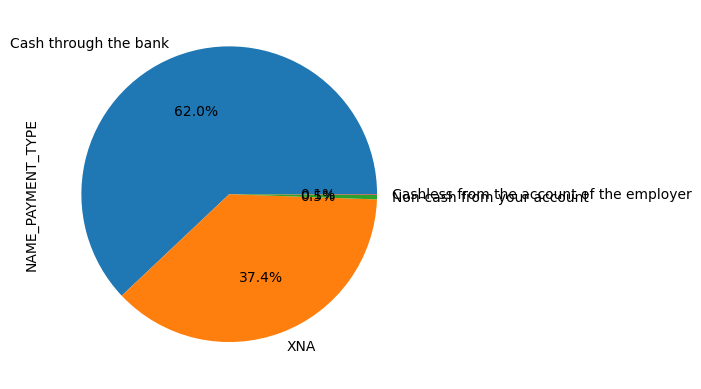

In [296]:
print(df_prev_application_data['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100)
(df_prev_application_data['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [297]:
# For many cases payment mode not known. Cash through bank is most common payment type

XAP       81.034928
HC        10.437117
LIMIT      3.361514
SCO        2.238466
CLIENT     1.599790
SCOFR      0.759888
XNA        0.314904
VERIF      0.209046
SYSTEM     0.044346
Name: CODE_REJECT_REASON, dtype: float64


<Axes: ylabel='CODE_REJECT_REASON'>

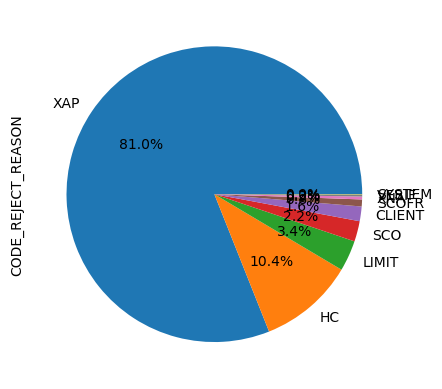

In [298]:
print(df_prev_application_data['CODE_REJECT_REASON'].value_counts(normalize=True)*100)
(df_prev_application_data['CODE_REJECT_REASON'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [299]:
# We previosuly saw around 18 percent loan applications got rejected by bank.Among them the major reasons are HC,Limit etc.Not XAp as that means thrir loans not rejected by bank.So not
# considering XAP

Repeater     73.619627
New          18.118876
Refreshed     8.145435
XNA           0.116062
Name: NAME_CLIENT_TYPE, dtype: float64


<Axes: ylabel='NAME_CLIENT_TYPE'>

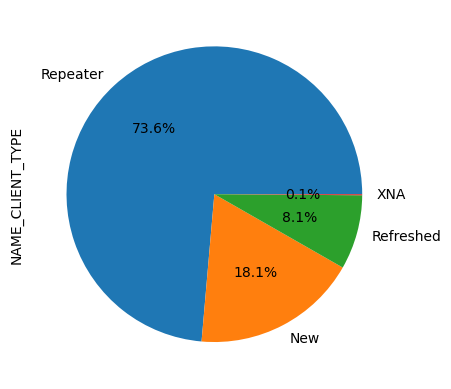

In [300]:
print(df_prev_application_data['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100)
(df_prev_application_data['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [301]:
# We see how repeat customers for a major chunk of customers 

XNA                         56.618744
Mobile                      13.517107
Consumer Electronics         7.353504
Computers                    6.397444
Audio/Video                  5.999571
Furniture                    3.235915
Photo / Cinema Equipment     1.504804
Construction Materials       1.502420
Clothing and Accessories     1.408006
Auto Accessories             0.448800
Jewelry                      0.384522
Homewares                    0.300312
Medical Supplies             0.234699
Vehicles                     0.206185
Sport and Leisure            0.181770
Gardening                    0.160790
Other                        0.151634
Office Appliances            0.140858
Tourism                      0.097275
Medicine                     0.093937
Direct Sales                 0.026226
Fitness                      0.012302
Additional Service           0.008488
Education                    0.006771
Weapon                       0.004387
Insurance                    0.003338
Animals     

<Axes: ylabel='NAME_GOODS_CATEGORY'>

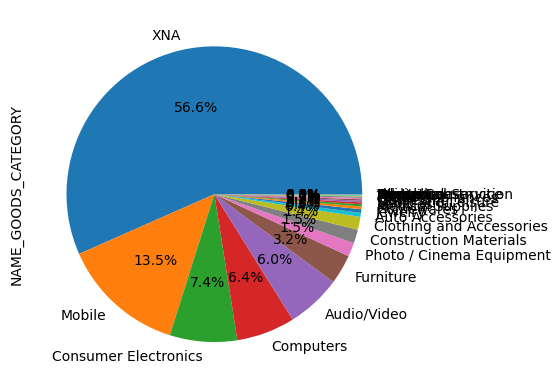

In [302]:
print(df_prev_application_data['NAME_GOODS_CATEGORY'].value_counts(normalize=True)*100)
(df_prev_application_data['NAME_GOODS_CATEGORY'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [303]:
# Goods Loans are mostly taken when purchasing goods like Mobile,Electronics,Computers etc

POS      41.660921
Cash     27.419021
XNA      22.221205
Cards     8.672246
Cars      0.026608
Name: NAME_PORTFOLIO, dtype: float64


<Axes: ylabel='NAME_PORTFOLIO'>

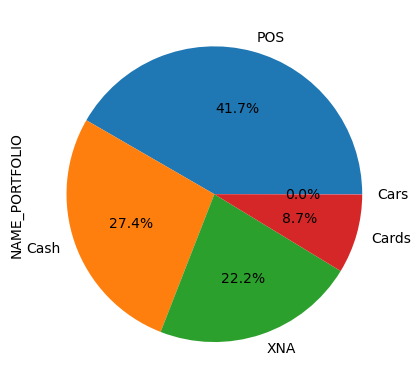

In [304]:
print(df_prev_application_data['NAME_PORTFOLIO'].value_counts(normalize=True)*100)
(df_prev_application_data['NAME_PORTFOLIO'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [305]:
# POS Loans are the highest in number

Credit and cash offices       43.015235
Country-wide                  29.820471
Stone                         12.797940
Regional / Local               6.544215
Contact center                 4.001812
AP+ (Cash loan)                3.414730
Channel of corporate sales     0.377465
Car dealer                     0.028133
Name: CHANNEL_TYPE, dtype: float64


<Axes: ylabel='CHANNEL_TYPE'>

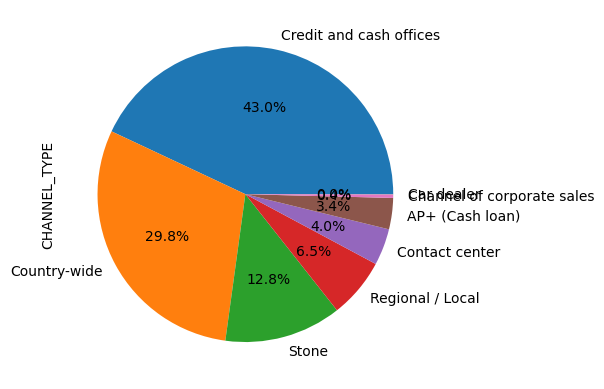

In [307]:
print(df_prev_application_data['CHANNEL_TYPE'].value_counts(normalize=True)*100)
(df_prev_application_data['CHANNEL_TYPE'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [308]:
# Credit and Cash Offices were the most preferred channels for loans

XNA                     50.890494
Consumer electronics    24.065804
Connectivity            16.599003
Furniture                3.483108
Construction             1.787473
Clothing                 1.433851
Industry                 1.170732
Auto technology          0.304032
Jewelry                  0.165558
MLM partners             0.070763
Tourism                  0.029182
Name: NAME_SELLER_INDUSTRY, dtype: float64


<Axes: ylabel='NAME_SELLER_INDUSTRY'>

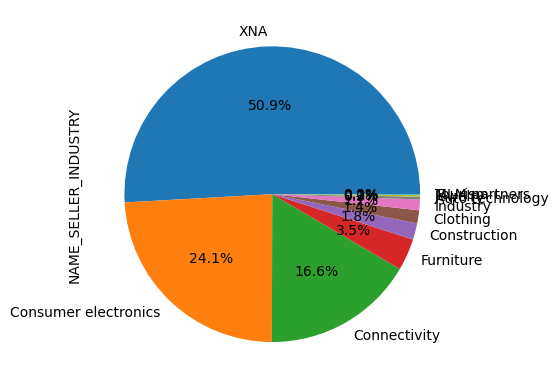

In [309]:
print(df_prev_application_data['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)*100)
(df_prev_application_data['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [310]:
# Electronics and Connectivity form the largest chunk of sellers for whom loans are applied

Cash                              17.008988
POS household with interest       15.913883
POS mobile with interest          13.272870
Cash X-Sell: middle                8.564576
Cash X-Sell: low                   7.712658
Card Street                        6.766421
POS industry with interest         5.959707
POS household without interest     5.030351
Card X-Sell                        4.815106
Cash Street: high                  3.551010
Cash X-Sell: high                  3.510765
Cash Street: middle                2.061464
Cash Street: low                   2.018549
POS mobile without interest        1.447774
POS other with interest            1.437379
POS industry without interest      0.749207
POS others without interest        0.157929
Missing                            0.021362
Name: PRODUCT_COMBINATION, dtype: float64


<Axes: ylabel='PRODUCT_COMBINATION'>

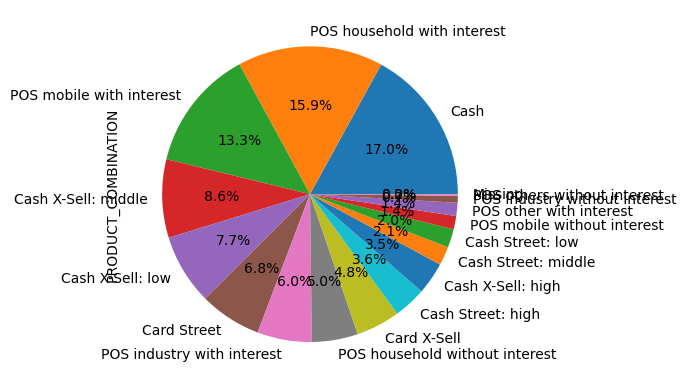

In [312]:
print(df_prev_application_data['PRODUCT_COMBINATION'].value_counts(normalize=True)*100)
(df_prev_application_data['PRODUCT_COMBINATION'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')

In [314]:
# Cash,POS household with interest,POS mobile with interest are the largest product combinations for loans

# Bivariate Analysis

In [315]:
# Let us a plota  correlation matrix of the numerical variables

In [316]:
df_prev_application_data.select_dtypes(include=["int64","float64"]).corr()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  \
SK_ID_PREV                 1.000000    0.000282     0.004467         0.002319   
SK_ID_CURR                 0.000282    1.000000     0.001300         0.002248   
AMT_ANNUITY                0.004467    0.001300     1.000000         0.805164   
AMT_APPLICATION            0.002319    0.002248     0.805164         1.000000   
AMT_CREDIT                 0.002710    0.002347     0.810979         0.975777   
AMT_GOODS_PRICE            0.007180    0.002233     0.816069         0.987220   
HOUR_APPR_PROCESS_START   -0.002973    0.002559    -0.024191        -0.015063   
NFLAG_LAST_APPL_IN_DAY    -0.003193    0.000085     0.015665         0.004064   
DAYS_DECISION              0.016653   -0.000299     0.190372         0.133063   
SELLERPLACE_AREA          -0.000547    0.001095    -0.010881        -0.006703   
CNT_PAYMENT                0.007812    0.001265     0.404987         0.680667   
YEARS_DECISION             0.016345   -0.000511     0.188915         0.131563   

                         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_PREV                 0.002710         0.007180                -0.002973   
SK_ID_CURR                 0.002347         0.002233                 0.002559   
AMT_ANNUITY                0.810979         0.816069                -0.024191   
AMT_APPLICATION            0.975777         0.987220                -0.015063   
AMT_CREDIT                 1.000000         0.971171                -0.021828   
AMT_GOODS_PRICE            0.971171         1.000000                -0.027646   
HOUR_APPR_PROCESS_START   -0.021828        -0.027646                 1.000000   
NFLAG_LAST_APPL_IN_DAY    -0.025635        -0.003630                 0.006192   
DAYS_DECISION              0.133297         0.193875                -0.039973   
SELLERPLACE_AREA          -0.008462        -0.010366                 0.015419   
CNT_PAYMENT                0.673861         0.675789                -0.042683   
YEARS_DECISION             0.131883         0.191558                -0.039295   

                         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
SK_ID_PREV                            -0.003193       0.016653   
SK_ID_CURR                             0.000085      -0.000299   
AMT_ANNUITY                            0.015665       0.190372   
AMT_APPLICATION                        0.004064       0.133063   
AMT_CREDIT                            -0.025635       0.133297   
AMT_GOODS_PRICE                       -0.003630       0.193875   
HOUR_APPR_PROCESS_START                0.006192      -0.039973   
NFLAG_LAST_APPL_IN_DAY                 1.000000       0.016887   
DAYS_DECISION                          0.016887       1.000000   
SELLERPLACE_AREA                       0.000855      -0.016515   
CNT_PAYMENT                            0.059133       0.168275   
YEARS_DECISION                         0.017185       0.990917   

                         SELLERPLACE_AREA  CNT_PAYMENT  YEARS_DECISION  
SK_ID_PREV                      -0.000547     0.007812        0.016345  
SK_ID_CURR                       0.001095     0.001265       -0.000511  
AMT_ANNUITY                     -0.010881     0.404987        0.188915  
AMT_APPLICATION                 -0.006703     0.680667        0.131563  
AMT_CREDIT                      -0.008462     0.673861        0.131883  
AMT_GOODS_PRICE                 -0.010366     0.675789        0.191558  
HOUR_APPR_PROCESS_START          0.015419    -0.042683       -0.039295  
NFLAG_LAST_APPL_IN_DAY           0.000855     0.059133        0.017185  
DAYS_DECISION                   -0.016515     0.168275        0.990917  
SELLERPLACE_AREA                 1.000000    -0.006050       -0.016155  
CNT_PAYMENT                     -0.006050     1.000000        0.167032  
YEARS_DECISION                  -0.016155     0.167032        1.000000

In [317]:
df_corr=df_prev_application_data.select_dtypes(include=["int64","float64"]).corr()

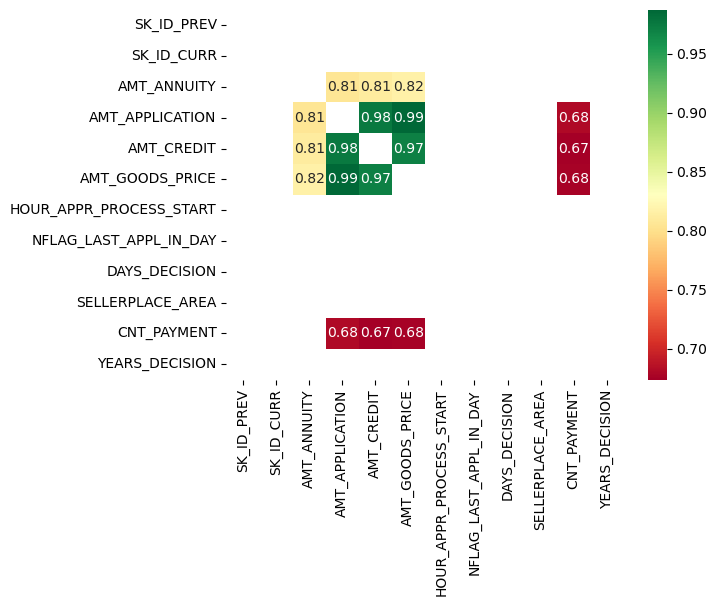

In [319]:
# Lets plot it
# plt.figure(figsize=(18,18))
sns.heatmap(df_corr[(df_corr>0.6) & (df_corr<0.99)],annot=True,cmap = "RdYlGn", cbar = True,)
plt.show()

In [320]:
df_corr[(df_corr>0.6) & (df_corr<=0.99)].unstack().sort_values(ascending=False).head(20)

AMT_APPLICATION  AMT_GOODS_PRICE    0.987220
AMT_GOODS_PRICE  AMT_APPLICATION    0.987220
AMT_APPLICATION  AMT_CREDIT         0.975777
AMT_CREDIT       AMT_APPLICATION    0.975777
                 AMT_GOODS_PRICE    0.971171
AMT_GOODS_PRICE  AMT_CREDIT         0.971171
                 AMT_ANNUITY        0.816069
AMT_ANNUITY      AMT_GOODS_PRICE    0.816069
AMT_CREDIT       AMT_ANNUITY        0.810979
AMT_ANNUITY      AMT_CREDIT         0.810979
                 AMT_APPLICATION    0.805164
AMT_APPLICATION  AMT_ANNUITY        0.805164
                 CNT_PAYMENT        0.680667
CNT_PAYMENT      AMT_APPLICATION    0.680667
AMT_GOODS_PRICE  CNT_PAYMENT        0.675789
CNT_PAYMENT      AMT_GOODS_PRICE    0.675789
AMT_CREDIT       CNT_PAYMENT        0.673861
CNT_PAYMENT      AMT_CREDIT         0.673861
SK_ID_PREV       SK_ID_PREV              NaN
                 SK_ID_CURR              NaN
dtype: float64

In [322]:
# We see how the amounts applied for,amouns sanctioned ,amounts annuity and credit amounts show good correlation to each other

# Continous vs Continous Analysis

<Axes: xlabel='AMT_APPLICATION', ylabel='AMT_CREDIT'>

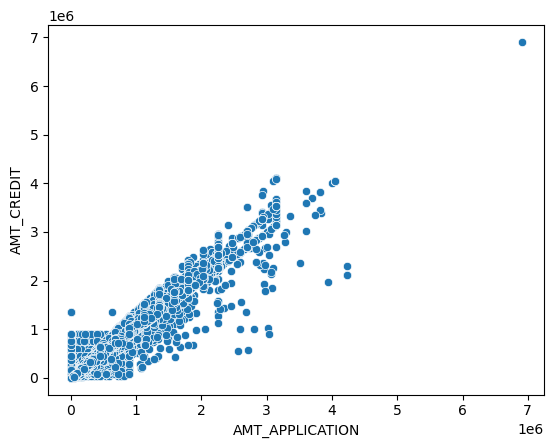

In [323]:
sns.scatterplot(df_prev_application_data,x="AMT_APPLICATION",y="AMT_CREDIT")

In [324]:
# We see a strong linear relationship between applied and sanctioned loan amounts

<Axes: xlabel='AMT_APPLICATION', ylabel='AMT_CREDIT'>

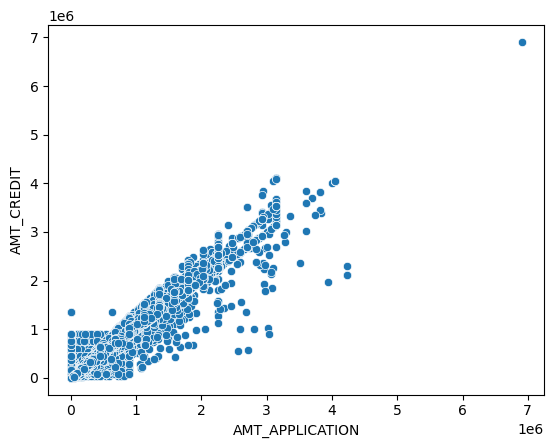

In [335]:
sns.scatterplot(df_prev_application_data,x="AMT_APPLICATION",y="AMT_CREDIT")

# Lets combine the 2 dataframes for better Analysis

In [378]:
# Combining Dataframes also gives an idea about behaviour of repaet lan applicants rather than only analysing 1  current or a previous instance of loan application

In [337]:
df_merge = df_application_data.merge(df_prev_application_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [338]:
df_merge

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0           100002       1           Cash loans           M            N   
1           100003       0           Cash loans           F            N   
2           100003       0           Cash loans           F            N   
3           100004       0      Revolving loans           M            Y   
4           100006       0           Cash loans           F            N   
...            ...     ...                  ...         ...          ...   
887342      456255       0           Cash loans           F            N   
887343      456255       0           Cash loans           F            N   
887344      456255       0           Cash loans           F            N   
887345      456255       0           Cash loans           F            N   
887346      456255       0           Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                    Y             0          202500.0      406597.5   
1                    N             0          270000.0     1293502.5   
2                    N             0          270000.0     1293502.5   
3                    Y             0           67500.0      135000.0   
4                    Y             0          135000.0      312682.5   
...                ...           ...               ...           ...   
887342               N             0          157500.0      675000.0   
887343               N             0          157500.0      675000.0   
887344               N             0          157500.0      675000.0   
887345               N             0          157500.0      675000.0   
887346               N             0          157500.0      675000.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
0             24700.5           351000.0   Unaccompanied   
1             35698.5          1129500.0          Family   
2             35698.5          1129500.0          Family   
3              6750.0           135000.0   Unaccompanied   
4             29686.5           297000.0   Unaccompanied   
...               ...                ...             ...   
887342        49117.5           675000.0   Unaccompanied   
887343        49117.5           675000.0   Unaccompanied   
887344        49117.5           675000.0   Unaccompanied   
887345        49117.5           675000.0   Unaccompanied   
887346        49117.5           675000.0   Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2              State servant               Higher education   
3                    Working  Secondary / secondary special   
4                    Working  Secondary / secondary special   
...                      ...                            ...   
887342  Commercial associate               Higher education   
887343  Commercial associate               Higher education   
887344  Commercial associate               Higher education   
887345  Commercial associate               Higher education   
887346  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                    0.018801   
1                    Married  House / apartment                    0.003541   
2                    Married  House / apartment                    0.003541   
3       Single / not married  House / apartment                    0.010032   
4             Civil marriage  House / apartment                    0.008019   
...                      ...                ...                         ...   
887342               Married  House / apartment                    0.046220   
887343               Married  House / apartment                    0.046220   
887344               Married  House / apa

In [339]:
df_merge.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887347 entries, 0 to 887346
Data columns (total 103 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE_x          object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT_x                  float64
 9    AMT_ANNUITY_x                 float64
 10   AMT_GOODS_PRICE_x             float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [353]:
# After merging wee see that the columns which had common column names are named like this the application dataframe which was left has x attached to the column names while y is attached to columns
# from right i.e previous application dataframe

In [340]:
df_merge.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  887347.000000  887347.000000  887347.000000      8.873470e+05   
mean   278573.355245       0.086533       0.404863      1.735124e+05   
std    102862.966629       0.281150       0.716925      2.388415e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189427.000000       0.000000       0.000000      1.125000e+05   
50%    279118.000000       0.000000       0.000000      1.575000e+05   
75%    367786.000000       0.000000       1.000000      2.070000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  8.873470e+05  887347.000000       8.873470e+05   
mean   5.875341e+05   27014.790539       5.276227e+05   
std    3.851740e+05   13957.540726       3.532579e+05   
min    4.500000e+04    1615.500000       4.050000e+04   
25%    2.700000e+05   16807.500000       2.385000e+05   
50%    5.084955e+05   24907.500000       4.500000e+05   
75%    8.086500e+05   34537.500000       6.795000e+05   
max    3.956274e+06  220297.500000       3.825000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               887347.000000  887347.000000  887347.000000   
mean                     0.020758  -16316.688747   68738.257032   
std                      0.013363    4348.574147  145305.288953   
min                      0.000290  -25201.000000  -17912.000000   
25%                      0.010032  -19980.000000   -2827.000000   
50%                      0.018850  -16036.000000   -1280.000000   
75%                      0.028663  -12726.000000    -284.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count      887347.000000    887347.000000    887347.0   887347.000000   
mean        -5003.100439     -3034.758355         1.0        0.806343   
std          3550.314322      1507.730283         0.0        0.395163   
min        -23416.000000     -7197.000000         1.0        0.000000   
25%         -7512.000000     -4319.000000         1.0        1.000000   
50%         -4507.000000     -3331.000000         1.0        1.000000   
75%         -2002.000000     -1781.000000         1.0        1.000000   
max             0.000000         0.000000         1.0        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    887347.000000     887347.000000  887347.000000  887347.000000   
mean          0.182311          0.999256       0.283260       0.072348   
std           0.386101          0.027262       0.450582       0.259064   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    887347.000000         887347.000000                887347.000000   
mean          2.150632              2.060084                     2.037911   
std           0.900076              0.496573                     0.489433   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count              887347.000000               887347.000000   
mean                   11.982459                    0.012007   
std                     3.234360

In [341]:
df_merge.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [342]:
df_merge.select_dtypes(["int64","float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG

In [343]:
# We have already done univariate analysis of the individual datasets

# Now after mergings let us only look into multivariate relationhsips to find out predictors for loan defaults

In [344]:
df_merge.select_dtypes(include=["int64","float64"]).corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.001544     -0.001933   
TARGET                        -0.001544  1.000000      0.018773   
CNT_CHILDREN                  -0.001933  0.018773      1.000000   
AMT_INCOME_TOTAL              -0.000653  0.000380      0.010864   
AMT_CREDIT_x                  -0.000481 -0.022770      0.003212   
AMT_ANNUITY_x                 -0.001104 -0.006800      0.029869   
AMT_GOODS_PRICE_x              0.000044 -0.031737     -0.000462   
REGION_POPULATION_RELATIVE     0.000751 -0.034515     -0.022085   
DAYS_BIRTH                    -0.001980  0.074674      0.362317   
DAYS_EMPLOYED                 -0.000238 -0.046675     -0.247898   
DAYS_REGISTRATION             -0.002849  0.042618      0.186348   
DAYS_ID_PUBLISH                0.000634  0.051877     -0.013139   
FLAG_MOBIL                          NaN       NaN           NaN   
FLAG_EMP_PHONE                 0.000326  0.047614      0.248859   
FLAG_WORK_PHONE               -0.000549  0.028449      0.057589   
FLAG_CONT_MOBILE               0.005067  0.000605     -0.000622   
FLAG_PHONE                     0.002277 -0.021298     -0.028678   
FLAG_EMAIL                     0.000292  0.002301      0.026914   
CNT_FAM_MEMBERS               -0.003180  0.013728      0.879082   
REGION_RATING_CLIENT          -0.000452  0.056702      0.025618   
REGION_RATING_CLIENT_W_CITY   -0.000512  0.059524      0.024443   
HOUR_APPR_PROCESS_START_x      0.000970 -0.022748     -0.000872   
REG_REGION_NOT_LIVE_REGION     0.002024  0.004198     -0.007424   
REG_REGION_NOT_WORK_REGION     0.003892  0.007013      0.014595   
LIVE_REGION_NOT_WORK_REGION    0.003670  0.004025      0.017740   
REG_CITY_NOT_LIVE_CITY        -0.000657  0.042585      0.031881   
REG_CITY_NOT_WORK_CITY        -0.000006  0.050529      0.080936   
LIVE_CITY_NOT_WORK_CITY        0.001656  0.033526      0.074320   
EXT_SOURCE_2                   0.001488 -0.156685     -0.021719   
EXT_SOURCE_3                  -0.000221 -0.167295     -0.043493   
OBS_30_CNT_SOCIAL_CIRCLE      -0.000362  0.013814      0.017982   
DEF_30_CNT_SOCIAL_CIRCLE       0.000557  0.031030     -0.000060   
OBS_60_CNT_SOCIAL_CIRCLE      -0.000524  0.013713      0.017417   
DEF_60_CNT_SOCIAL_CIRCLE       0.000076  0.027982     -0.001304   
DAYS_LAST_PHONE_CHANGE        -0.002435  0.060465      0.010065   
FLAG_DOCUMENT_2                0.001080  0.008681     -0.000056   
FLAG_DOCUMENT_3               -0.004835  0.042155      0.058204   
FLAG_DOCUMENT_4               -0.005690 -0.002573     -0.003028   
FLAG_DOCUMENT_5               -0.001082 -0.001875     -0.016757   
FLAG_DOCUMENT_6                0.000750 -0.031823     -0.156562   
FLAG_DOCUMENT_7               -0.000880  0.002197      0.000112   
FLAG_DOCUMENT_8                0.003969 -0.007517      0.059727   
FLAG_DOCUMENT_9               -0.000472 -0.004398      0.000012   
FLAG_DOCUMENT_10               0.000291 -0.002310     -0.004239   
FLAG_DOCUMENT_11               0.001757 -0.000812     -0.003408   
FLAG_DOCUMENT_12              -0.001244 -0.000327     -0.000599   
FLAG_DOCUMENT_13               0.006058 -0.008031      0.007050   
FLAG_DOCUMENT_14               0.002900 -0.006311     -0.001532   
FLAG_DOCUMENT_15               0.001492 -0.004315      0.002397   
FLAG_DOCUMENT_16              -0.002129 -0.012187      0.007076   
FLAG_DOCUMENT_17               0.002475 -0.003768      0.004899   
FLAG_DOCUMENT_18              -0.001489 -0.007188      0.004388   
FLAG_DOCUMENT_19              -0.000714 -0.002163     -0.000370   
FLAG_DOCUMENT_20               0.001274  0.001441      0.000445   
FLAG_DOCUMENT_21              -0.001083  0.000092      0.001909   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001721 -0.000823     -0.000484   
AMT_REQ_CREDIT_BUREAU_DAY     -0.001831  0.003803     -0.002153   
AMT_REQ_CREDIT_BUREAU_WEEK     0.001518  0.000350      0.003261   
AMT_REQ_CREDIT_BUREAU_MON      0.001756 -0.015123     -0.009757   
AMT_REQ_C

In [345]:
df_corr=df_merge.select_dtypes(include=["int64","float64"]).corr()

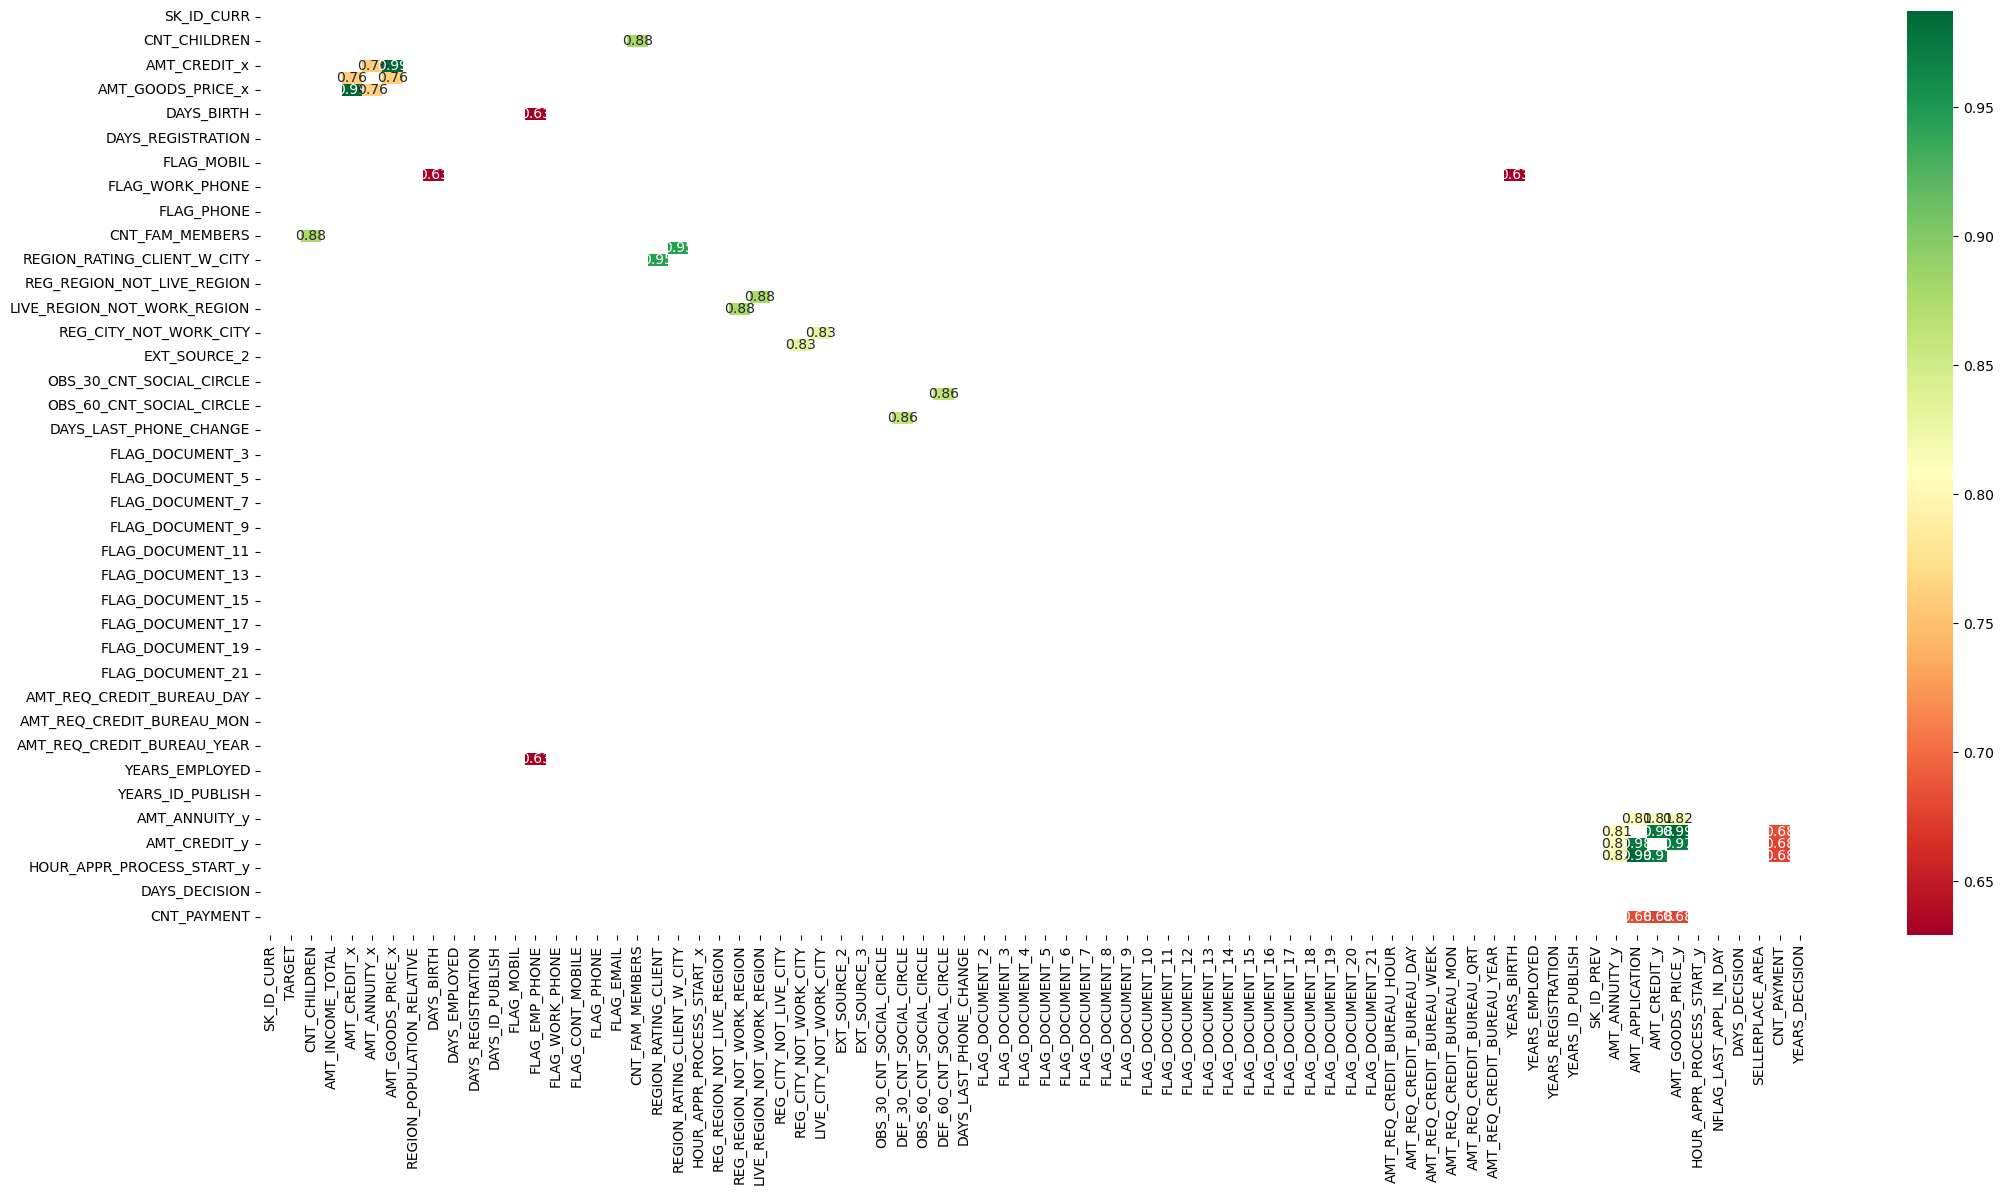

In [351]:
# Lets plot it
plt.figure(figsize=(25,12))
sns.heatmap(df_corr[(df_corr>0.6) & (df_corr<0.99)],annot=True,cmap = "RdYlGn", cbar = True,fmt='.2f')
plt.show()

In [352]:
df_corr[(df_corr>0.6) & (df_corr<=0.99)].unstack().sort_values(ascending=False).head(20)

AMT_GOODS_PRICE_y            AMT_APPLICATION                0.987458
AMT_APPLICATION              AMT_GOODS_PRICE_y              0.987458
AMT_CREDIT_x                 AMT_GOODS_PRICE_x              0.986091
AMT_GOODS_PRICE_x            AMT_CREDIT_x                   0.986091
AMT_CREDIT_y                 AMT_APPLICATION                0.975678
AMT_APPLICATION              AMT_CREDIT_y                   0.975678
AMT_CREDIT_y                 AMT_GOODS_PRICE_y              0.971525
AMT_GOODS_PRICE_y            AMT_CREDIT_y                   0.971525
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.945392
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.945392
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879082
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879082
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.875786
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.875786
DEF_30_CNT_SOCIAL_CIRCLE     DEF_6

In [354]:
# We can see the higghest correlations from above and can use the above information to decide steps

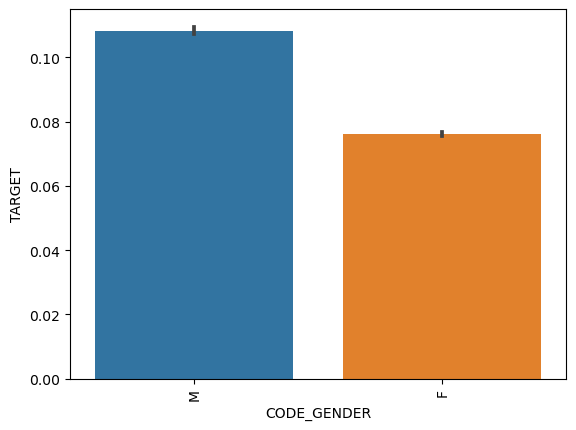

In [356]:
sns.barplot(df_merge,x="CODE_GENDER",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [358]:
df_merge.CODE_GENDER.value_counts(normalize=True)*100

F    67.588215
M    32.411785
Name: CODE_GENDER, dtype: float64

In [359]:
# Males overall have more chance to default theough males have less loan applications

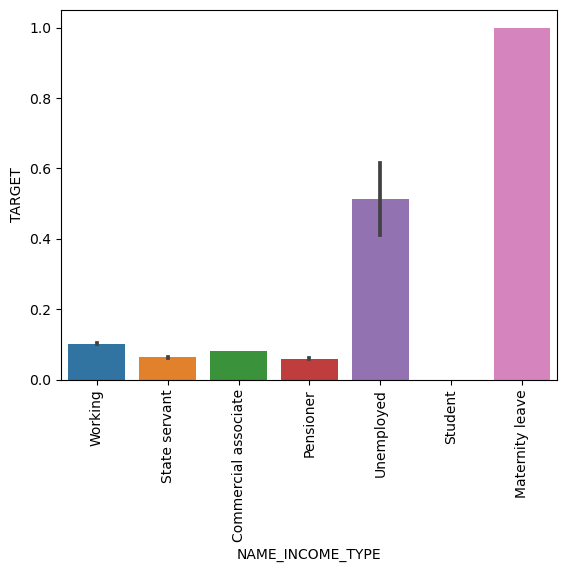

In [360]:
sns.barplot(df_merge,x="NAME_INCOME_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [361]:
# We see that Maternity LEave and Unemployed People have the highest chanc es of default

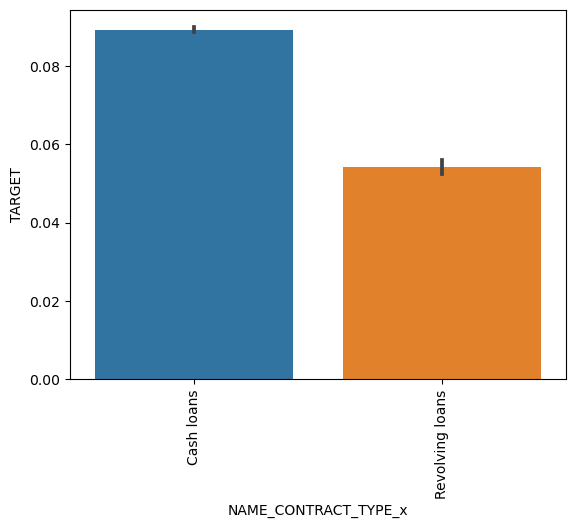

In [362]:
sns.barplot(df_merge,x="NAME_CONTRACT_TYPE_x",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [363]:
# Cash loans more chance to default than revolving loans

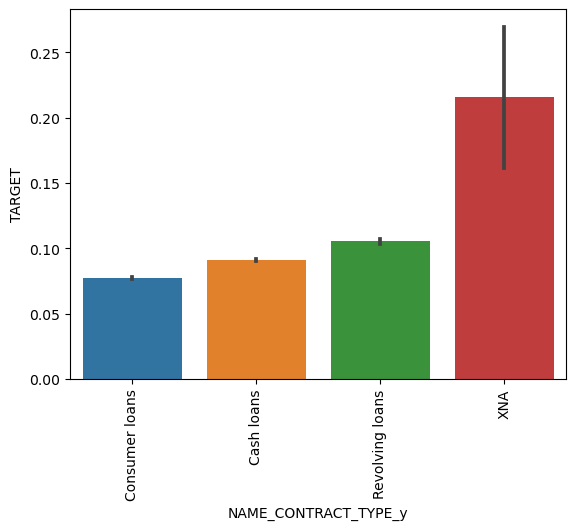

In [364]:
sns.barplot(df_merge,x="NAME_CONTRACT_TYPE_y",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [365]:
# We see here that based on previous application type Revolving Loans have higher chances to default

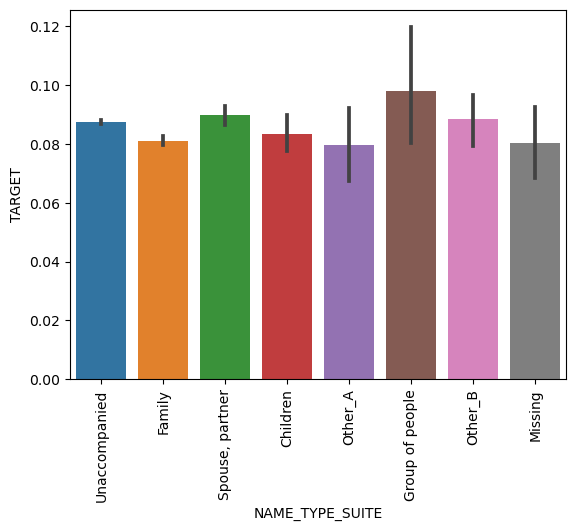

In [366]:
sns.barplot(df_merge,x="NAME_TYPE_SUITE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [367]:
# Group of people have more chance to default than Accompanied people.

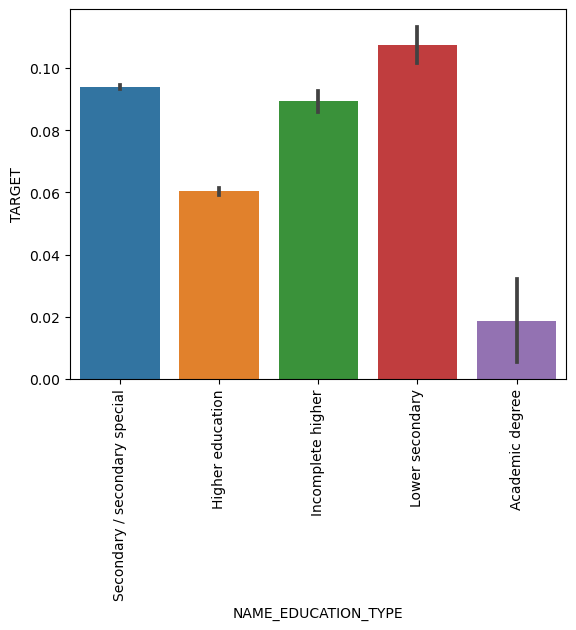

In [369]:
sns.barplot(df_merge,x="NAME_EDUCATION_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [370]:
# Academic degress have the loest chance of default while lower secondary have the highest chance to default 

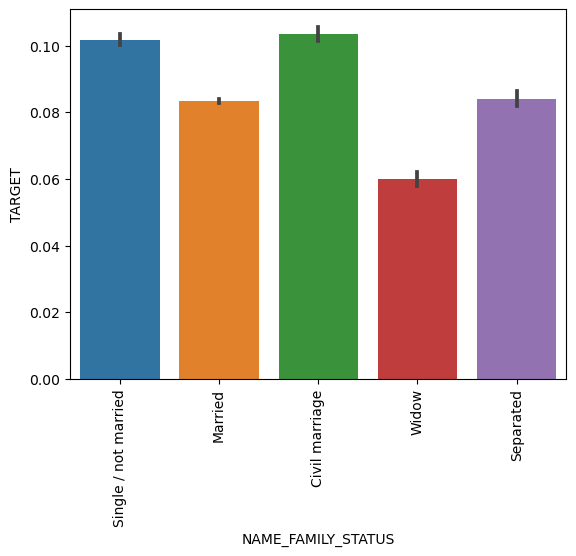

In [371]:
sns.barplot(df_merge,x="NAME_FAMILY_STATUS",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [373]:
# Widows have the lowest chance to default while Single and Civil marriage have the highest chance to default

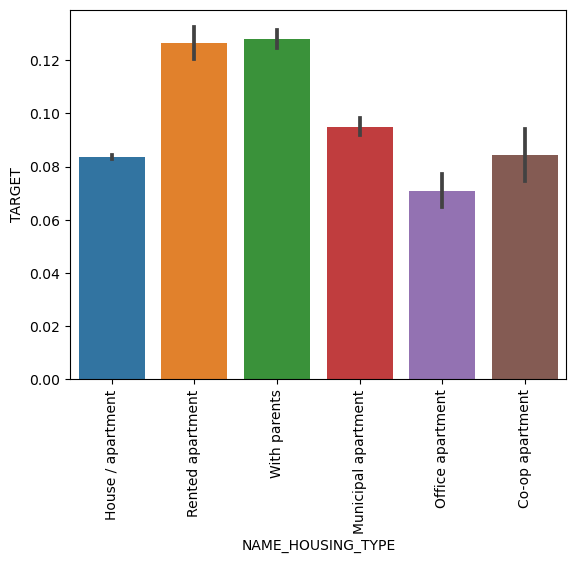

In [372]:
sns.barplot(df_merge,x="NAME_HOUSING_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [374]:
# People living in Rented Apartments and parents have the highest chance to default whereas Office Apartment has lowest chance

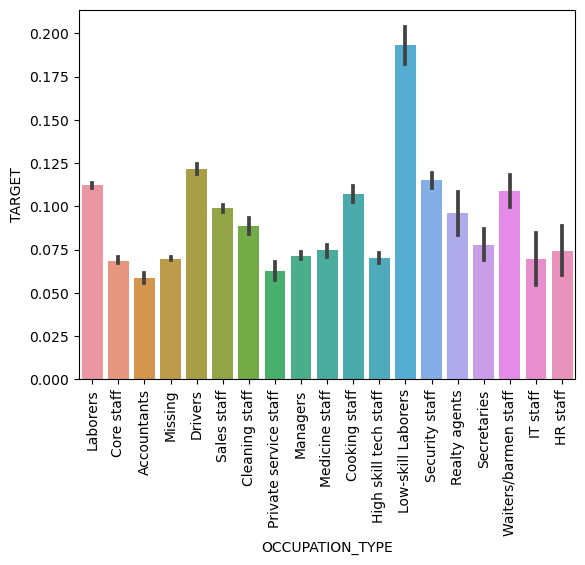

In [375]:
sns.barplot(df_merge,x="OCCUPATION_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Low Skilled Labourer have highest default chance while Accountants have lowest default chance

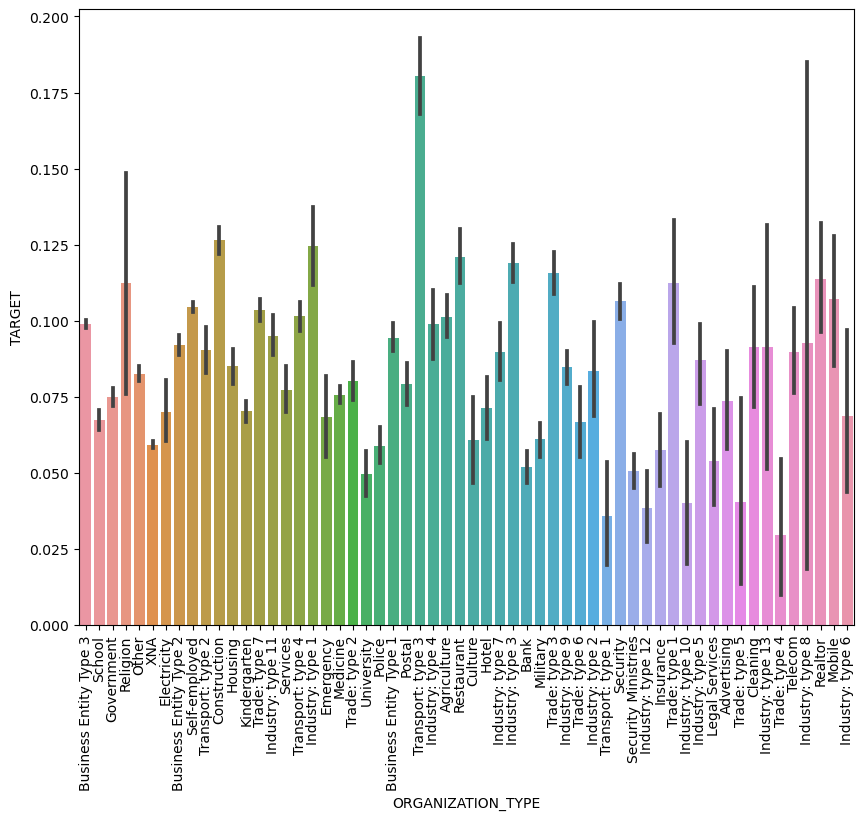

In [377]:
plt.figure(figsize=(10,8))
sns.barplot(df_merge,x="ORGANIZATION_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [379]:
# Transport Type 3 Organization type has the highest chance to default while Trade Type 4 have lowest chance to default

In [380]:
# Categorical vs Categorical

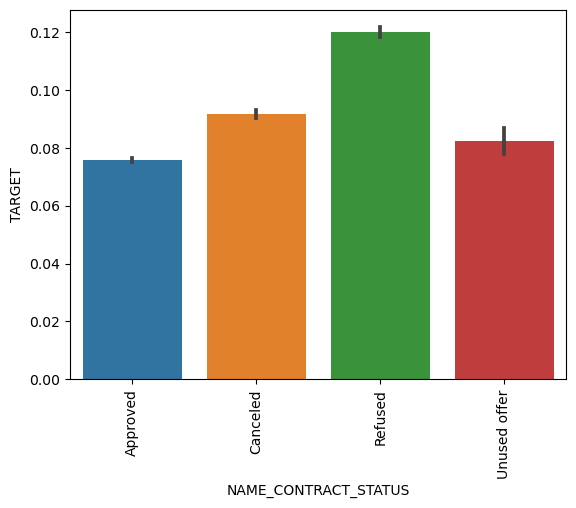

In [382]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="NAME_CONTRACT_STATUS",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [383]:
# Refused Loans in previous applications have high chances to dfeault

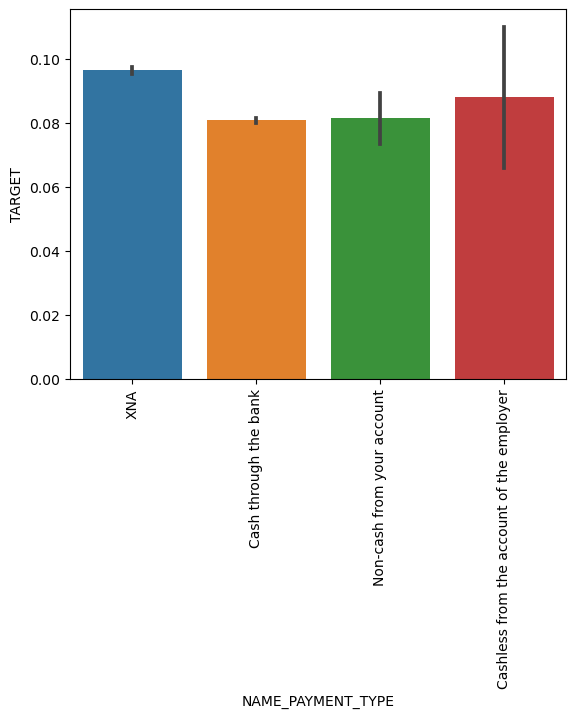

In [384]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="NAME_PAYMENT_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [386]:
# Payment type Cashless from the account of the employer in their previous application have the highest chances to default

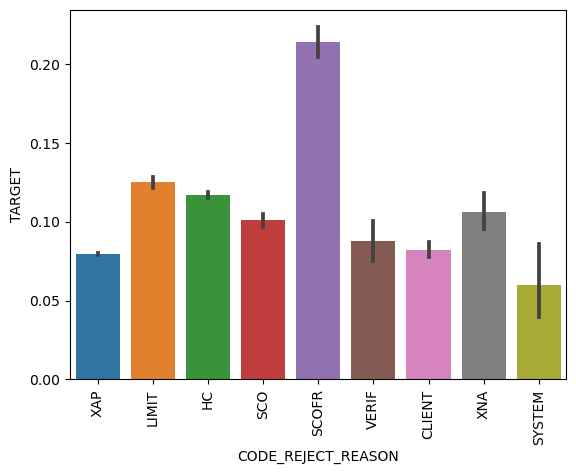

In [387]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="CODE_REJECT_REASON",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [389]:
# SCOFR Rejection reason for previous loan application have the highest chances to default and systems have lowest chances

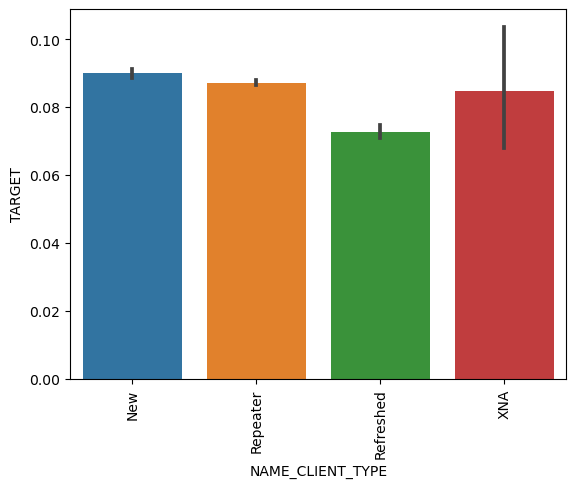

In [388]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="NAME_CLIENT_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [390]:
# New client have somewhat more chances to default

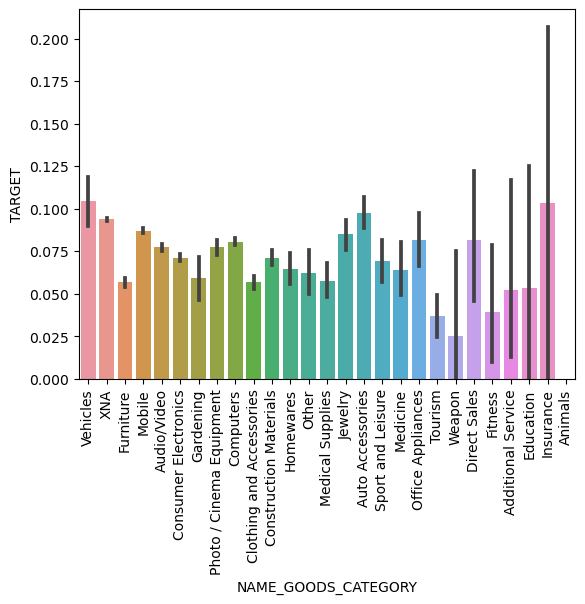

In [391]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="NAME_GOODS_CATEGORY",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [398]:
# Animal and Weapon Loans have the lowest chance to default while Vehicle and Insurance Loans have the highest chance to default

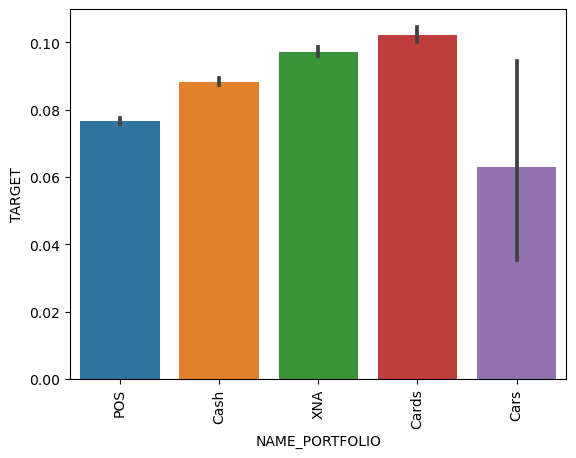

In [392]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="NAME_PORTFOLIO",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [399]:
# Cards portfolio have the highest chance to default while Car portfolio  have the lowest chance to default

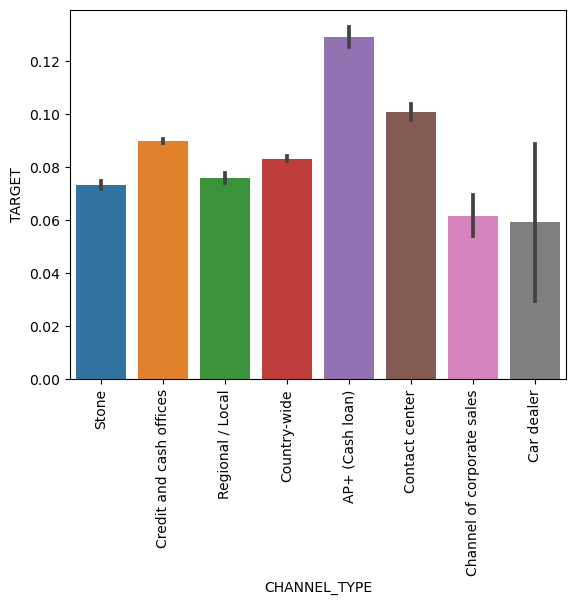

In [394]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="CHANNEL_TYPE",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [400]:
# AP + Cash Loan Channel have the highest chance to default while Car Dealer Channel has lowest chance

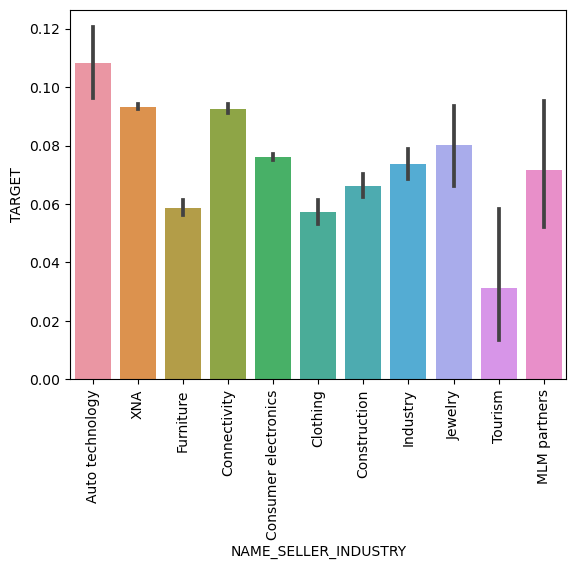

In [395]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="NAME_SELLER_INDUSTRY",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Loans given by Tourism Industry have the lowest chance to be defaulted while Auto Technology Loans have the highest chance to be defaulted

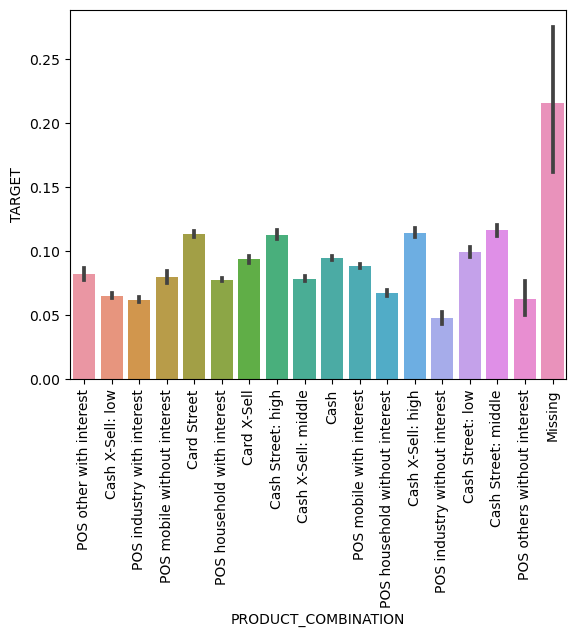

In [397]:
# plt.figure(figsize=(15,5))
sns.barplot(df_merge,x="PRODUCT_COMBINATION",y="TARGET")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Missing Product Combination have the highest chance to default while POS Industry without interset have the lowest chance to default

# Conclusion

In [402]:
# This Concludes our Exploratory Data Analysis of Credit Dataset for Current and Previous Loan Application.
# Lots of insights and actionable steps were identified
# Future Works maybe to build a Machine Learning or Statistical Model to identify Defaulters by feeding variables and using them to predict TARGET columns


# A comprehensive list of finding will be listed in the Presentation format.

                                                                                    # Thanks For Reading
                                                        

In [404]:
                                                                                               # Regards Antarlin